# PRIMARY ENERGY PRODUCTION FORECASTING

## Loading All the required Libraries

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Flatten
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, TimeDistributed
from statsmodels.tsa.arima.model import ARIMA
from keras.layers import Input
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

## Read the Dataset

In [6]:
# Laod and read the dataset
primary_new = pd.read_excel('prod_btu_re_te.xlsx',sheet_name='Total Primary Energy', header=1, index_col=0)

In [7]:
# Reset column names to the first row (State/Year) and skip the last row (US)
primary_new.columns = primary_new.iloc[0]
primary = primary_new[1:-1]
# Print the file 
print(primary)

State      1960      1961      1962      1963      1964      1965      1966  \
AK        21554     56144     82748     87933     90198     94316    117440   
AL       474228    474778    484723    469027    541262    532429    516640   
AR       289299    291209    282213    284502    281323    287541    303926   
AZ        36737     35506     35003     36668     36786     53947     62173   
CA      2631000   2619873   2692352   2844641   2832949   3009585   3166379   
CO       481892    478635    442430    429188    432566    445815    466768   
CT        17406     17076     15937     16253     16703     15500     16243   
DC          155       163       166       148       138       120       111   
DE         4982      5101      5134      5356      5510      5577      5852   
FL        37861     36625     38296     41351     42666     48551     53480   
GA        96116     94691     96771    103171    118296    108022    109456   
HI          292       258       214       446      1

## Load the state abbrevation and divide the years to 6 decades.

In [8]:
# state abbreviation dictionary
state_dict = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
    'US': 'United State'
}
# Select the columns for all time periods
primary_1960_1970 = primary.loc[:, '1960':'1970']
primary_1970_1980 = primary.loc[:, '1971':'1980']
primary_1980_1990 = primary.loc[:, '1981':'1990']
primary_1990_2000 = primary.loc[:, '1991':'2000']
primary_2000_2010 = primary.loc[:, '2001':'2010']
primary_2010_2020 = primary.loc[:, '2011':'2020']
# Calculate the average for each state over the specified years
average_1960_1970 = primary_1960_1970.mean(axis=1)
average_1970_1980 = primary_1970_1980.mean(axis=1)
average_1980_1990 = primary_1980_1990.mean(axis=1)
average_1990_2000 = primary_1990_2000.mean(axis=1)
average_2000_2010 = primary_2000_2010.mean(axis=1)
average_2010_2020 = primary_2010_2020.mean(axis=1)

## Print all states with its average for every 10 years

In [9]:
# Iterate through each time interval
time_intervals = [average_1960_1970, average_1970_1980, average_1980_1990, average_1990_2000, average_2000_2010, average_2010_2020]
for i, average_values in enumerate(time_intervals):
    states = []  # List to store full state names
    state_values = []  # List to store state values

    for state in average_values.index:
        # Check if the state abbreviation exists in the dictionary
        if state in state_dict:
            full_state_name = state_dict[state]
            state_value = average_values[state]
            states.append(full_state_name)
            state_values.append(state_value)
    # Year Range for 10 decade
    print(f"\nAverage of all states from {1960 + i * 10} to {1970 + i * 10}:")
    for j, state in enumerate(states):
        # Round the state value to a specific number of decimal places
        rounded_value = round(state_values[j], 2)
        print(f"State: {state} - Value: {rounded_value}")


Average of all states from 1960 to 1970:
State: Alaska - Value: 208413.64
State: Alabama - Value: 538281.27
State: Arkansas - Value: 305670.73
State: Arizona - Value: 56544.45
State: California - Value: 3027640.09
State: Colorado - Value: 446423.18
State: Connecticut - Value: 28233.64
State: District of Columbia - Value: 132.18
State: Delaware - Value: 5816.64
State: Florida - Value: 49174.09
State: Georgia - Value: 104218.45
State: Hawaii - Value: 1053.73
State: Iowa - Value: 35738.09
State: Idaho - Value: 78033.64
State: Illinois - Value: 1700986.91
State: Indiana - Value: 469533.82
State: Kansas - Value: 1460053.27
State: Kentucky - Value: 2345463.45
State: Louisiana - Value: 7104005.27
State: Massachusetts - Value: 68394.0
State: Maryland - Value: 72763.55
State: Maine - Value: 57598.45
State: Michigan - Value: 180189.82
State: Minnesota - Value: 34187.09
State: Missouri - Value: 108073.0
State: Mississippi - Value: 536980.45
State: Montana - Value: 340374.64
State: North Carolina

## Average the state into 5 clusters

### Average for 1960 to 1970 and dividing it into 5 clusters

In [10]:
# Combine the average values for 1960-1970
average_values = pd.concat([average_1960_1970], axis=--1)
average_values.columns = ['1960-1970']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1960-1970')

# Round off the values to 2 decimal places 
average_values['1960-1970'] = average_values['1960-1970'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1960-1970'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
print(f"All the states from 1960 to 1970 after clustering:")
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    # Sort states within the cluster
    cluster_states = cluster_states.sort_values(by='1960-1970')  
    cluster_min = cluster_states['1960-1970'].min()
    cluster_max = cluster_states['1960-1970'].max()
    for state, value in zip(cluster_states.index, cluster_states['1960-1970']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('primary_1960_1970.csv', index=True)

All the states from 1960 to 1970 after clustering:

States in Cluster 0:
State: DC - Value: 132.18
State: HI - Value: 1053.73
State: RI - Value: 3754.45
State: DE - Value: 5816.64
State: VT - Value: 15174.27
State: NV - Value: 20527.36
State: NH - Value: 24634.09
State: NJ - Value: 26891.0
State: CT - Value: 28233.64
State: MN - Value: 34187.09
State: IA - Value: 35738.09
State: SD - Value: 42568.64
State: FL - Value: 49174.09
State: AZ - Value: 56544.45
State: ME - Value: 57598.45
State: WI - Value: 60875.73
State: MA - Value: 68394.0
State: MD - Value: 72763.55
State: SC - Value: 73671.45
State: ID - Value: 78033.64
State: GA - Value: 104218.45
State: MO - Value: 108073.0
State: NC - Value: 120802.09
State: NE - Value: 129616.27
State: MI - Value: 180189.82
State: AK - Value: 208413.64
State: OR - Value: 244687.27
State: ND - Value: 252235.82
State: NY - Value: 302757.27
State: TN - Value: 305147.64
State: AR - Value: 305670.73
State: UT - Value: 339473.45
State: MT - Value: 340374.6

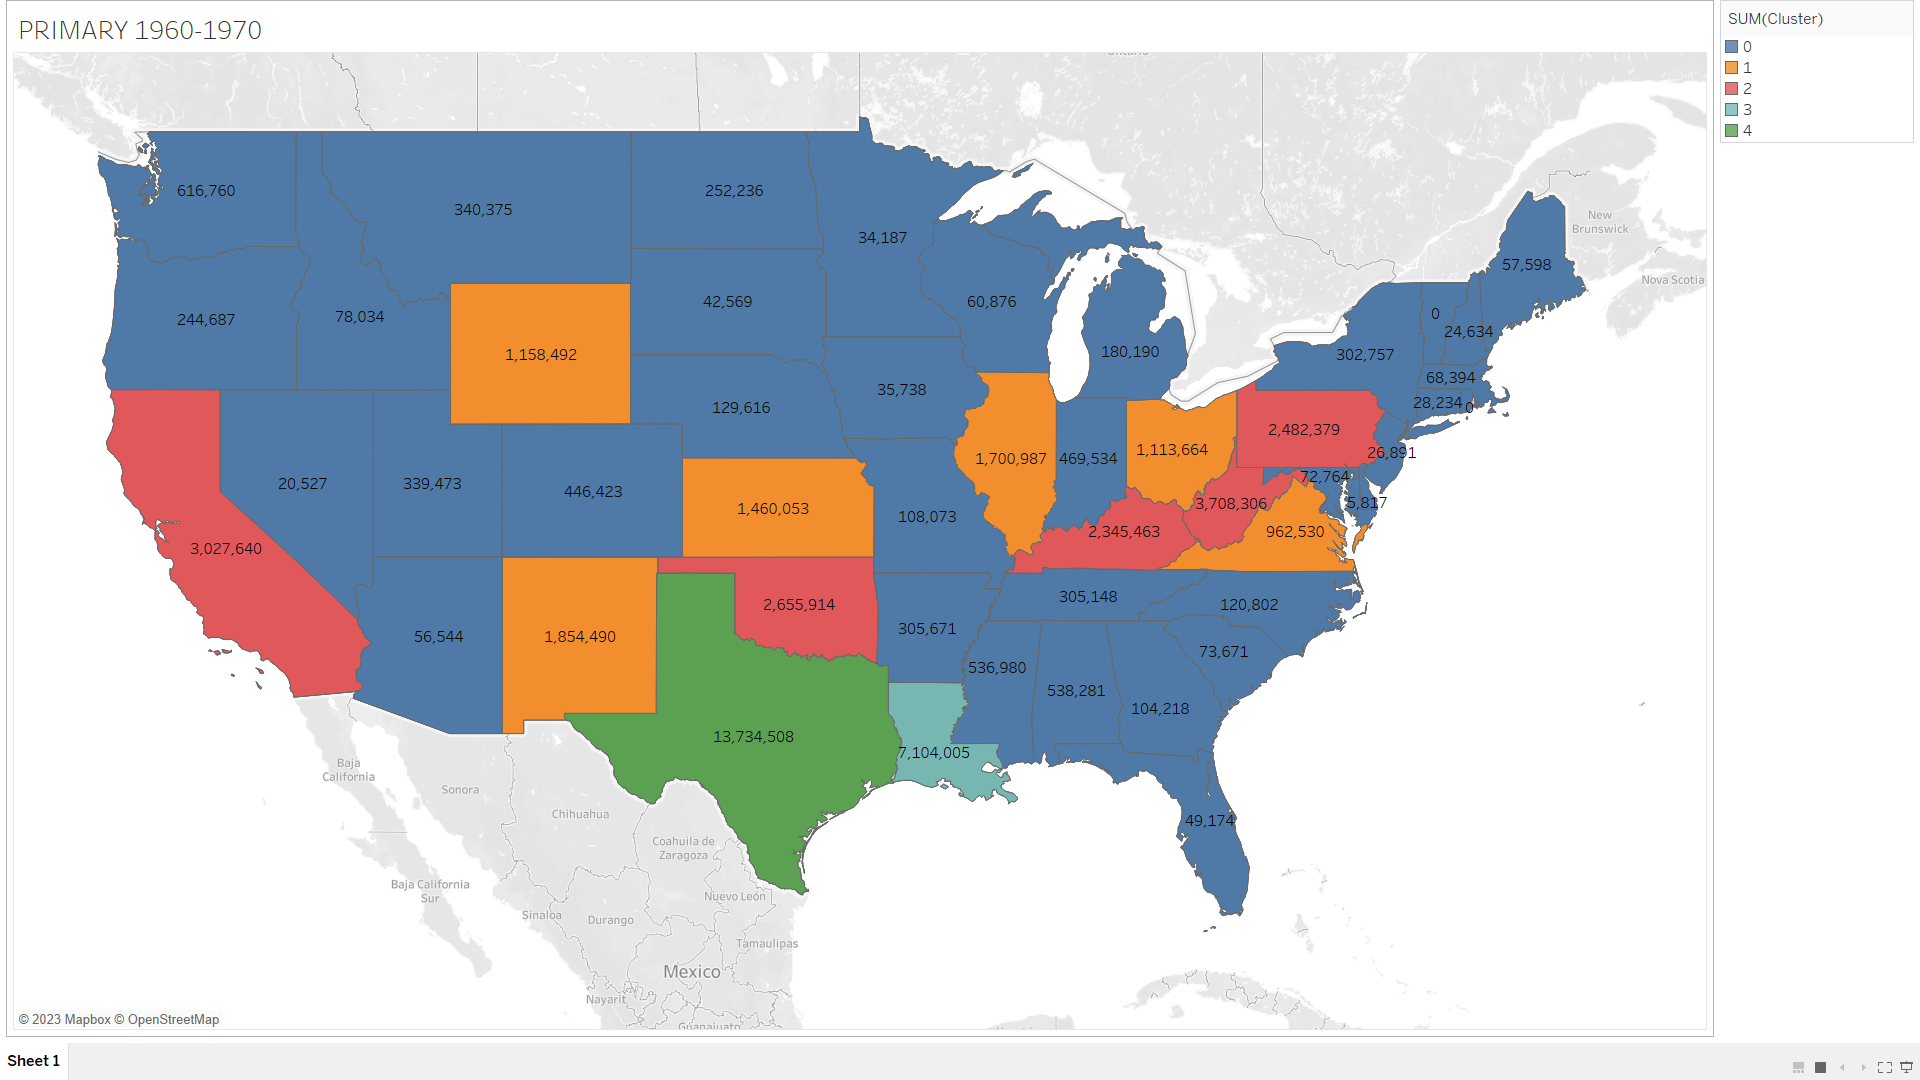

### Average for 1970 to 1980 and dividing it into 5 clusters

In [11]:
# Combine the average values for 1970-1980
average_values = pd.concat([average_1970_1980], axis=1)
average_values.columns = ['1970-1980']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1970-1980')

# Round off the values to 2 decimal places 
average_values['1970-1980'] = average_values['1970-1980'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1970-1980'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
print(f"All the states from 1970 to 1980 after clustering:")
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    # Sort states within the cluster
    cluster_states = cluster_states.sort_values(by='1970-1980')  
    cluster_min = cluster_states['1970-1980'].min()
    cluster_max = cluster_states['1970-1980'].max()
    for state, value in zip(cluster_states.index, cluster_states['1970-1980']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('primary_1970-1980.csv', index=True)


All the states from 1970 to 1980 after clustering:

States in Cluster 0:
State: DC - Value: 416.4
State: HI - Value: 2557.7
State: RI - Value: 5495.3
State: DE - Value: 8234.9
State: NV - Value: 21974.0
State: NH - Value: 29533.7
State: VT - Value: 45037.8
State: IA - Value: 50879.8
State: SD - Value: 72571.1
State: NJ - Value: 92246.7
State: MA - Value: 102941.5
State: ID - Value: 106273.8
State: NE - Value: 110502.6
State: ME - Value: 112337.4
State: MN - Value: 124636.4
State: CT - Value: 134764.3
State: MO - Value: 146368.4
State: GA - Value: 162713.3
State: MD - Value: 171811.1
State: WI - Value: 177134.2
State: NC - Value: 180618.2
State: SC - Value: 228502.0
State: AZ - Value: 250223.9
State: ND - Value: 346096.7
State: AR - Value: 350286.7
State: TN - Value: 397553.5
State: MI - Value: 401469.3
State: OR - Value: 423376.1
State: MS - Value: 423949.5
State: FL - Value: 426771.4
State: UT - Value: 441848.9
State: NY - Value: 524885.8
State: CO - Value: 626269.5
State: IN - Value:

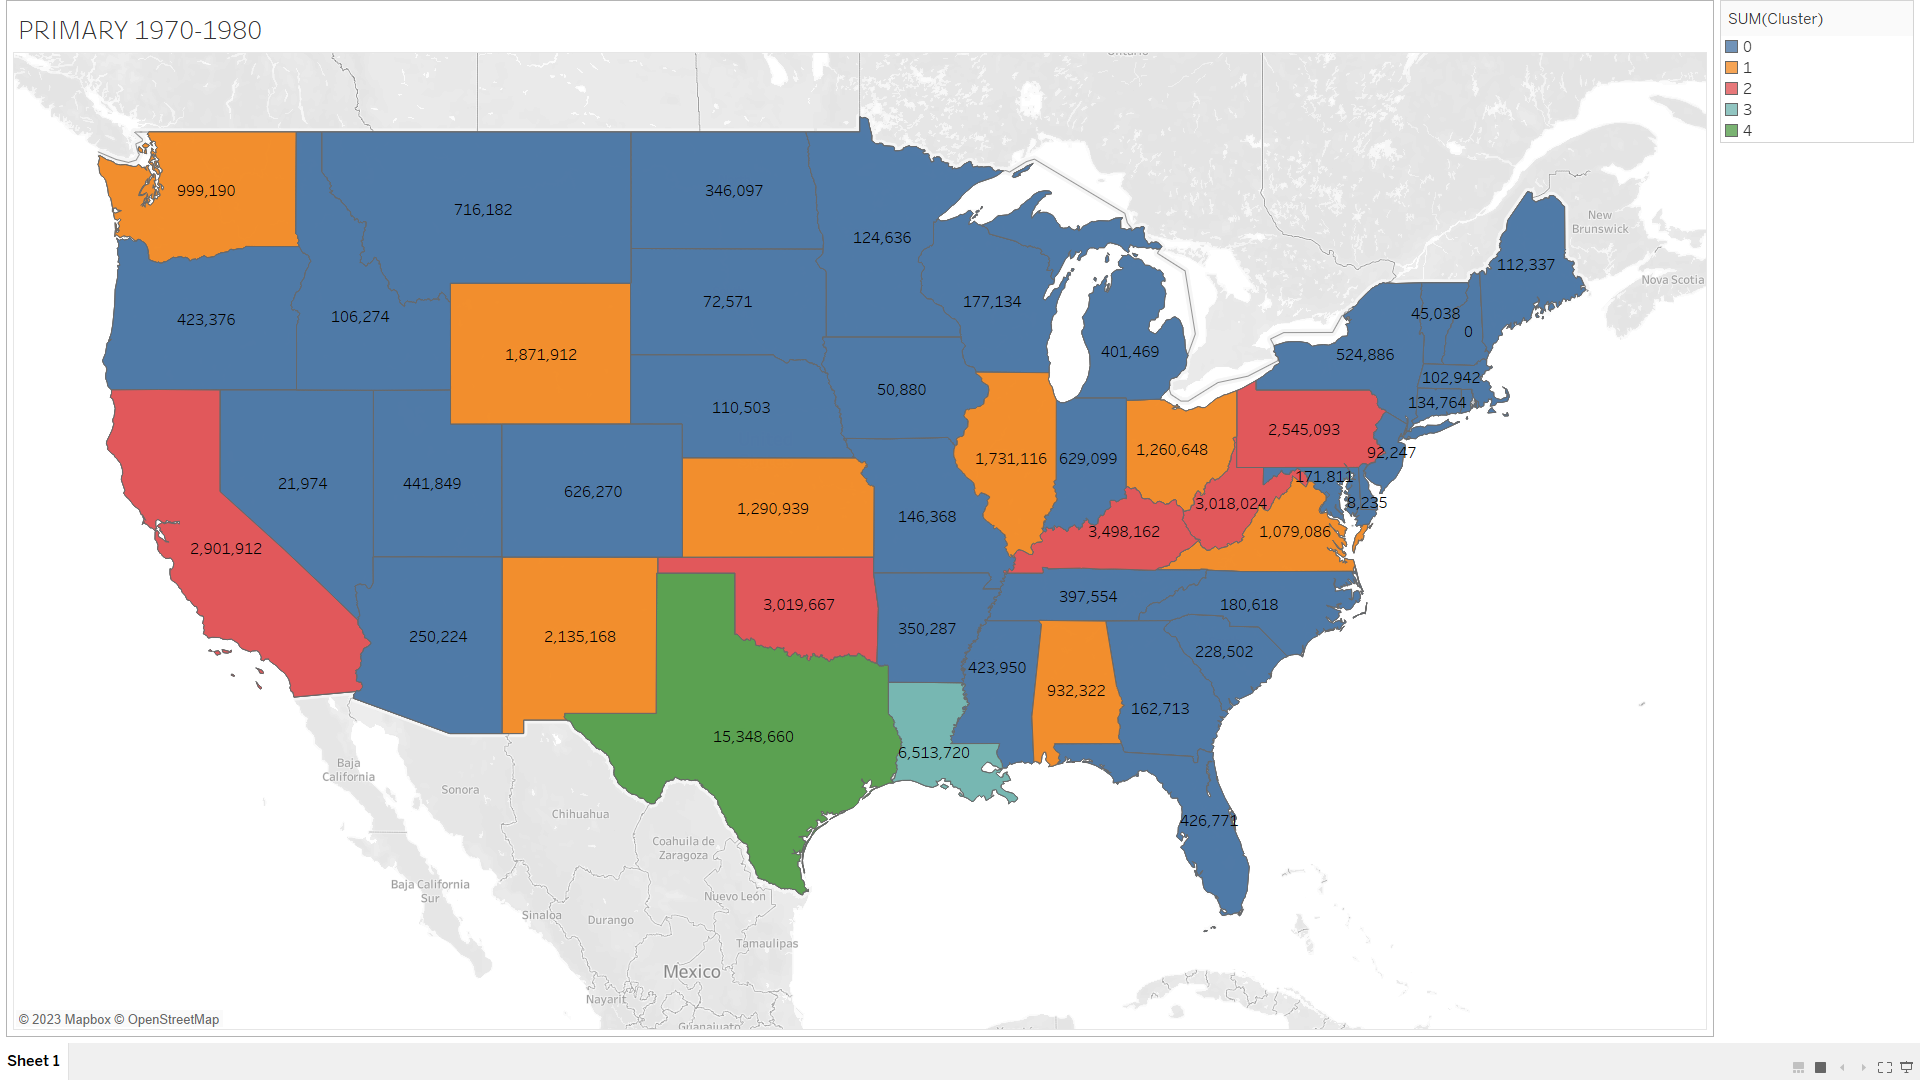

### Average for 1980 to 1990 and dividing it into 5 clusters

In [12]:
# Combine the average values for 1980-1990
average_values = pd.concat([average_1980_1990], axis=1)
average_values.columns = ['1980-1990']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1980-1990')

# Round off the values to 2 decimal places 
average_values['1980-1990'] = average_values['1980-1990'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1980-1990'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
print(f"All the states from 1980 to 1990 after clustering:")
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1980-1990')  
    cluster_min = cluster_states['1980-1990'].min()
    cluster_max = cluster_states['1980-1990'].max()
    for state, value in zip(cluster_states.index, cluster_states['1980-1990']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('primary_1980-1990.csv', index=True)

All the states from 1980 to 1990 after clustering:

States in Cluster 0:
State: DE - Value: 2475.2
State: DC - Value: 2652.6
State: RI - Value: 4991.3
State: HI - Value: 18593.7
State: NH - Value: 41769.4
State: NV - Value: 50171.6
State: VT - Value: 59884.7
State: SD - Value: 69237.3
State: MA - Value: 104405.0
State: IA - Value: 126840.2
State: ID - Value: 127406.2
State: NE - Value: 134814.6
State: MN - Value: 179562.4
State: ME - Value: 190438.5
State: MO - Value: 191561.1
State: CT - Value: 215661.8
State: NJ - Value: 219006.7
State: MD - Value: 243411.5
State: WI - Value: 288806.4
State: GA - Value: 293132.7
State: NC - Value: 353316.3
State: SC - Value: 412483.4
State: MS - Value: 417283.8
State: AR - Value: 436279.5
State: TN - Value: 451075.4
State: FL - Value: 455428.6
State: AZ - Value: 467627.7
Cluster 0 Range: 2475.20 - 467627.70

States in Cluster 1:
State: OR - Value: 575575.5
State: MI - Value: 612628.9
State: NY - Value: 655550.3
State: ND - Value: 680289.1
State: UT -

### Mapping using Tablaue

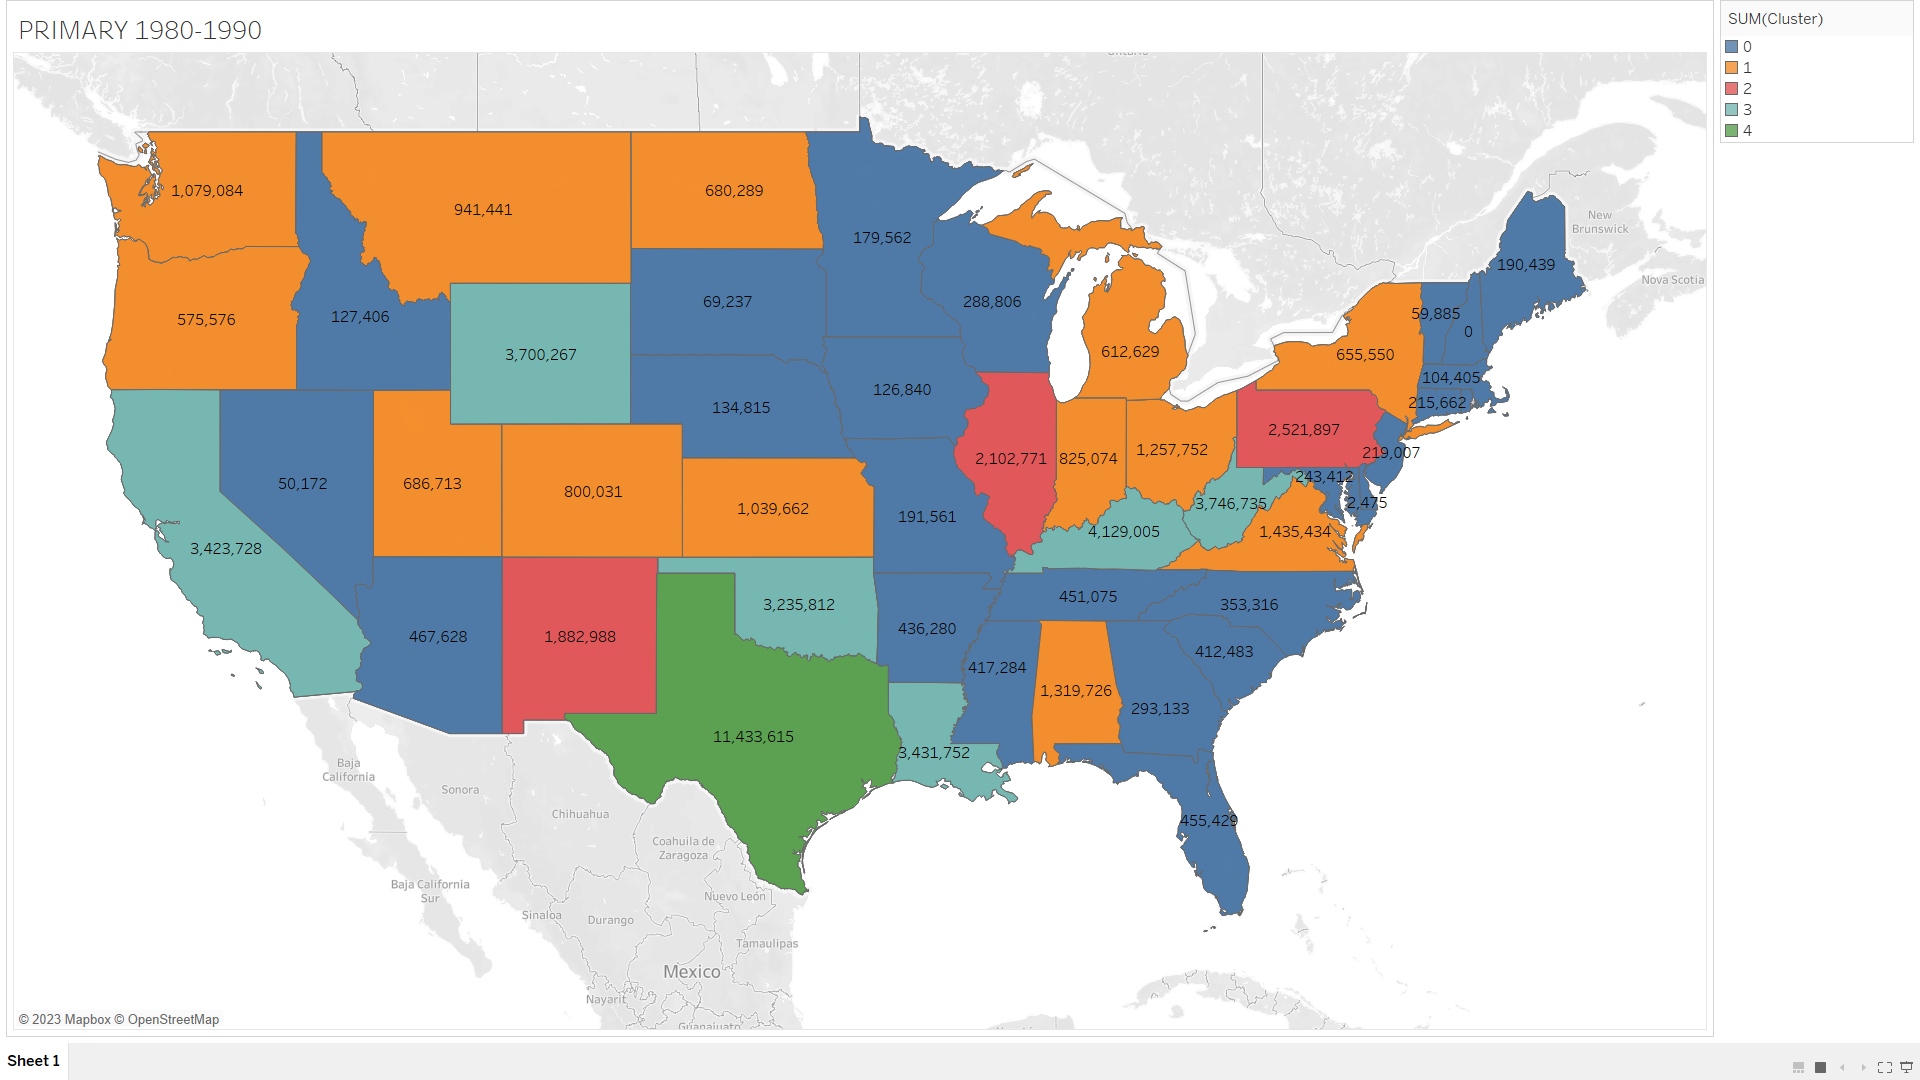

### Average for 1990 to 2000 and dividing it into 5 clusters

In [44]:
# Combine the average values for 1990-2000
average_values = pd.concat([average_1990_2000], axis=1)
average_values.columns = ['1990-2000']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1990-2000')

# Round off the values to 2 decimal places
average_values['1990-2000'] = average_values['1990-2000'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1990-2000'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
print(f"All the states from 1990 to 2000 after clustering:")
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1990-2000') 
    cluster_min = cluster_states['1990-2000'].min()
    cluster_max = cluster_states['1990-2000'].max()
    for state, value in zip(cluster_states.index, cluster_states['1990-2000']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('primary_1990-2000.csv', index=True)


All the states from 1990 to 2000 after clustering:

States in Cluster 0:
State: DC - Value: 1553.7
State: DE - Value: 2197.8
State: RI - Value: 4778.0
State: HI - Value: 24255.5
State: NV - Value: 52825.6
State: VT - Value: 60708.4
State: SD - Value: 71229.2
State: MA - Value: 119721.2
State: NH - Value: 126329.0
State: ID - Value: 139695.8
State: MO - Value: 149265.9
State: IA - Value: 150776.5
State: NE - Value: 157056.4
State: CT - Value: 179724.2
State: ME - Value: 190119.7
State: MN - Value: 206763.5
State: WI - Value: 219763.3
State: NJ - Value: 269909.0
State: MD - Value: 275969.8
State: MS - Value: 407177.8
State: TN - Value: 448533.6
State: OR - Value: 464150.6
State: AR - Value: 498698.6
State: NC - Value: 500429.6
State: FL - Value: 542206.0
State: GA - Value: 552729.9
Cluster 0 Range: 1553.70 - 552729.90

States in Cluster 1:
State: SC - Value: 604860.2
State: MI - Value: 655408.9
State: AZ - Value: 658032.6
State: ND - Value: 686928.4
State: NY - Value: 758753.3
State: IN 

### Mapping using Tablaue

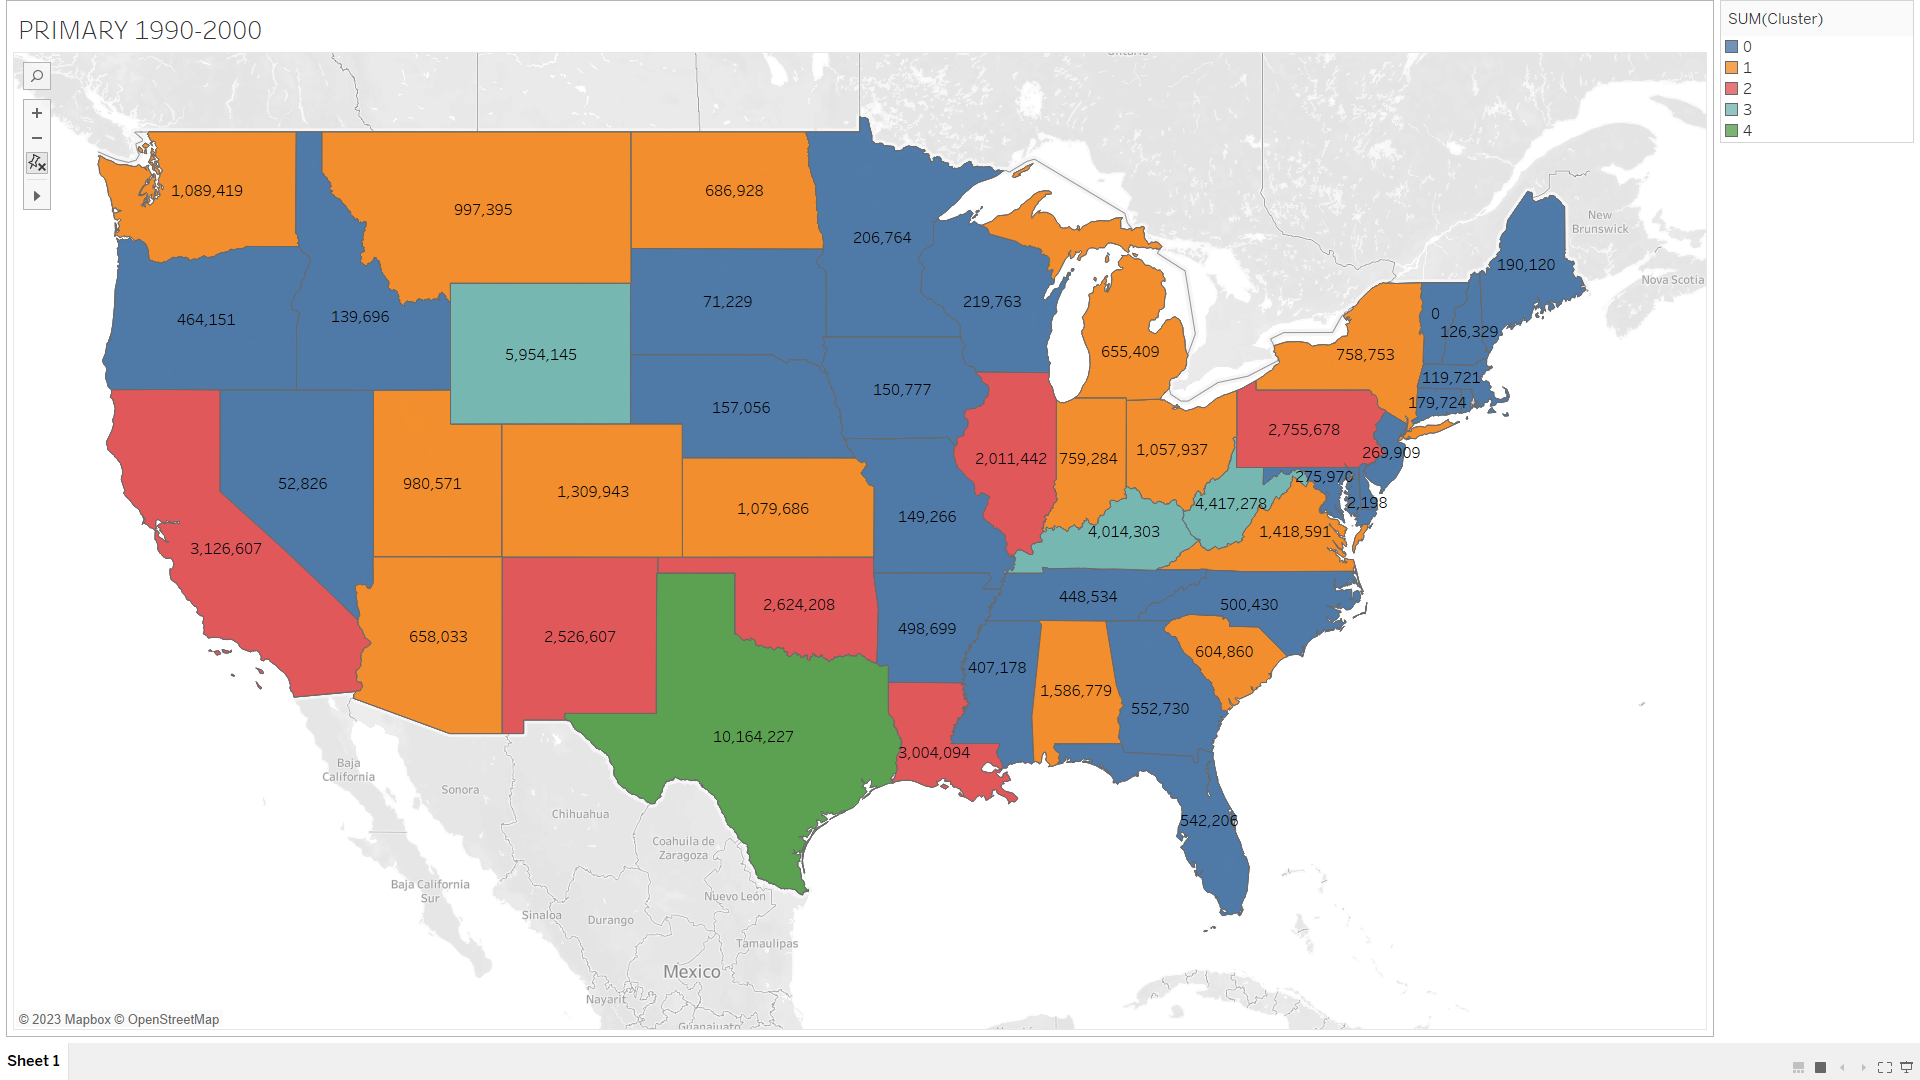

### Average for 2000 to 2010 and dividing it into 5 clusters

In [45]:
# Combine the average values for 2000-2010
average_values = pd.concat([average_2000_2010], axis=1)
average_values.columns = ['2000-2010']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='2000-2010')

# Round off the values to 2 decimal places 
average_values['2000-2010'] = average_values['2000-2010'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['2000-2010'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
print(f"All the states from 2000 to 2010 after clustering:")
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='2000-2010')  
    cluster_min = cluster_states['2000-2010'].min()
    cluster_max = cluster_states['2000-2010'].max()
    for state, value in zip(cluster_states.index, cluster_states['2000-2010']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('primary_2000-2010.csv', index=True)


All the states from 2000 to 2010 after clustering:

States in Cluster 0:
State: DC - Value: 398.5
State: DE - Value: 1918.5
State: RI - Value: 3177.0
State: HI - Value: 13880.0
State: NV - Value: 42186.6
State: VT - Value: 72155.5
State: MA - Value: 104244.9
State: SD - Value: 120285.0
State: ID - Value: 123589.8
State: NH - Value: 136771.4
State: ME - Value: 151305.7
State: MO - Value: 163660.3
State: CT - Value: 195611.5
State: NE - Value: 243473.2
State: WI - Value: 270826.9
State: MD - Value: 288700.6
State: MN - Value: 308052.2
State: IA - Value: 341722.7
State: NJ - Value: 354242.1
State: OR - Value: 395027.1
State: MS - Value: 424231.6
Cluster 0 Range: 398.50 - 424231.60

States in Cluster 1:
State: TN - Value: 515117.5
State: FL - Value: 525423.0
State: GA - Value: 553261.9
State: NC - Value: 559512.3
State: AZ - Value: 605368.9
State: SC - Value: 638026.2
State: AR - Value: 659467.5
State: MI - Value: 698830.9
State: ND - Value: 800453.0
State: KS - Value: 808198.2
State: NY -

### Mapping using Tablaue

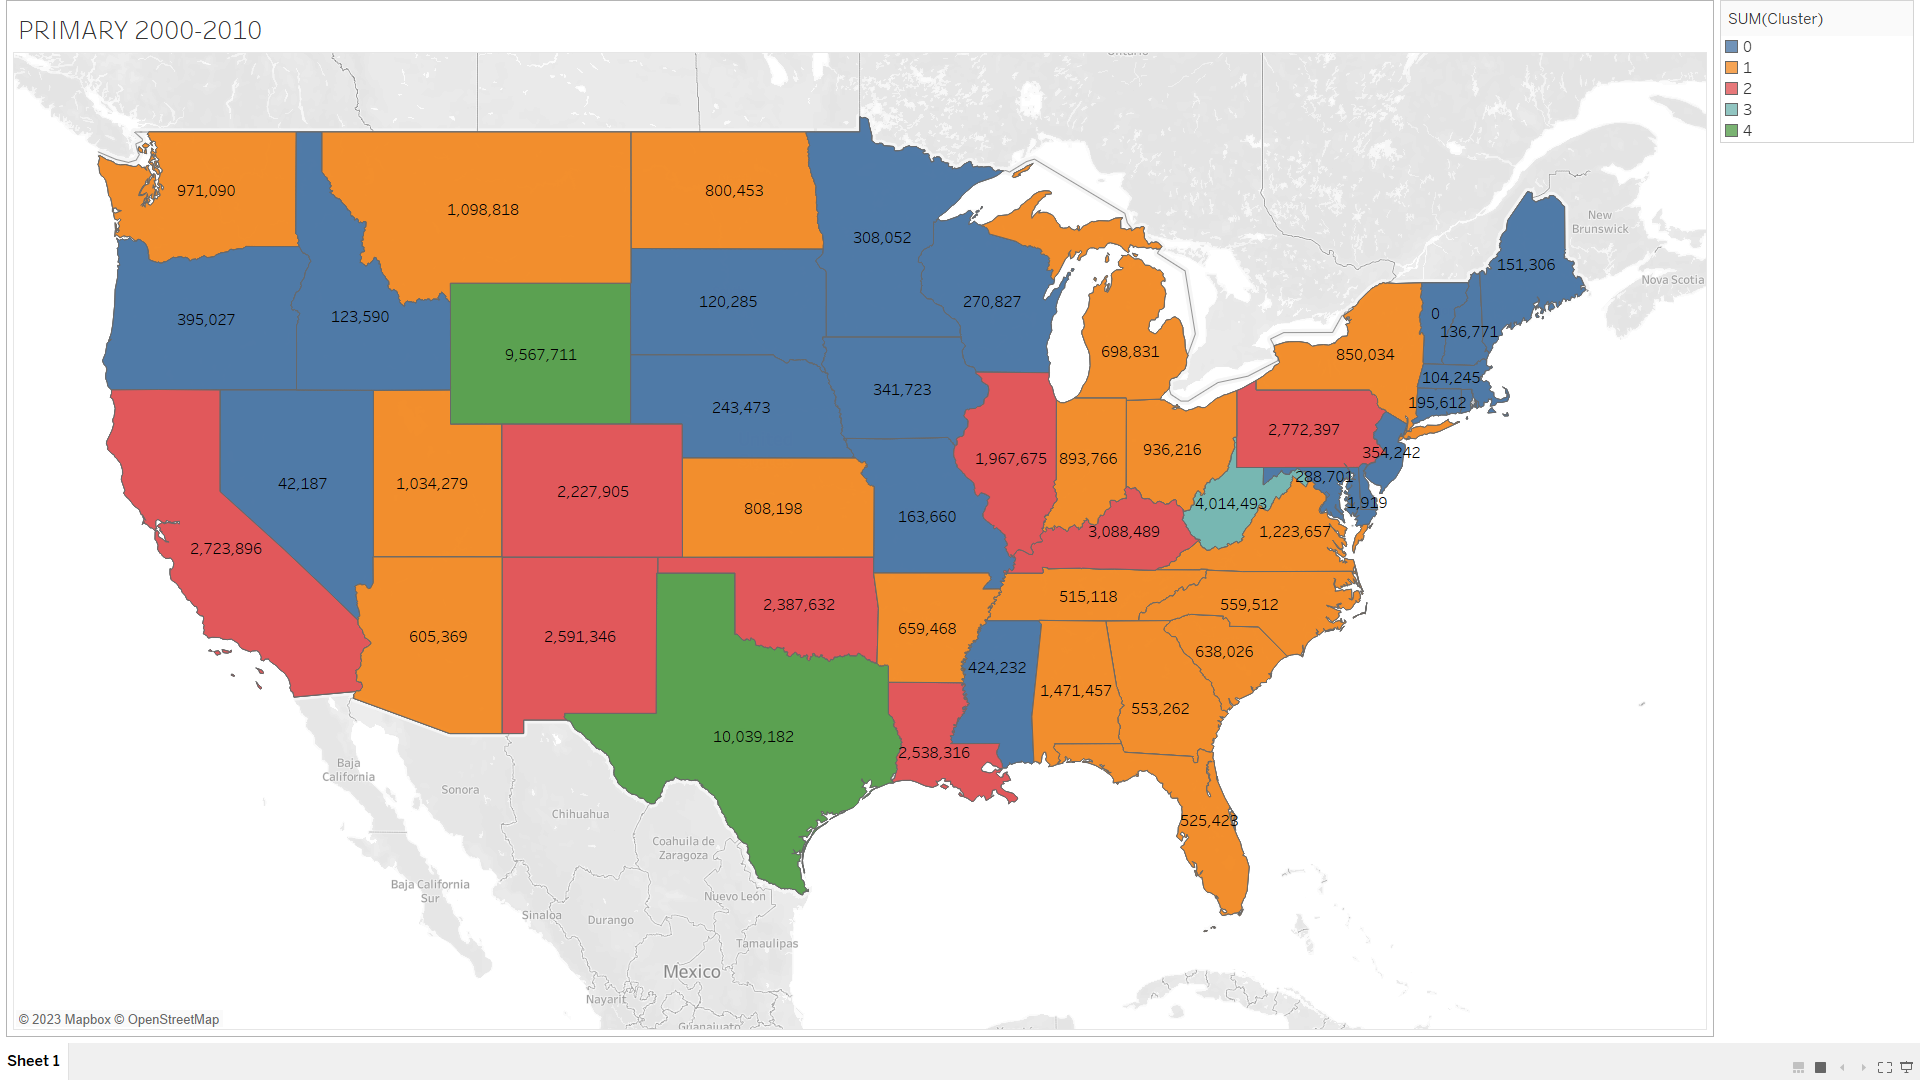

### Average for 2010 to 2020 and dividing it into 5 clusters

### Plot all the cluters into map using Tablaue

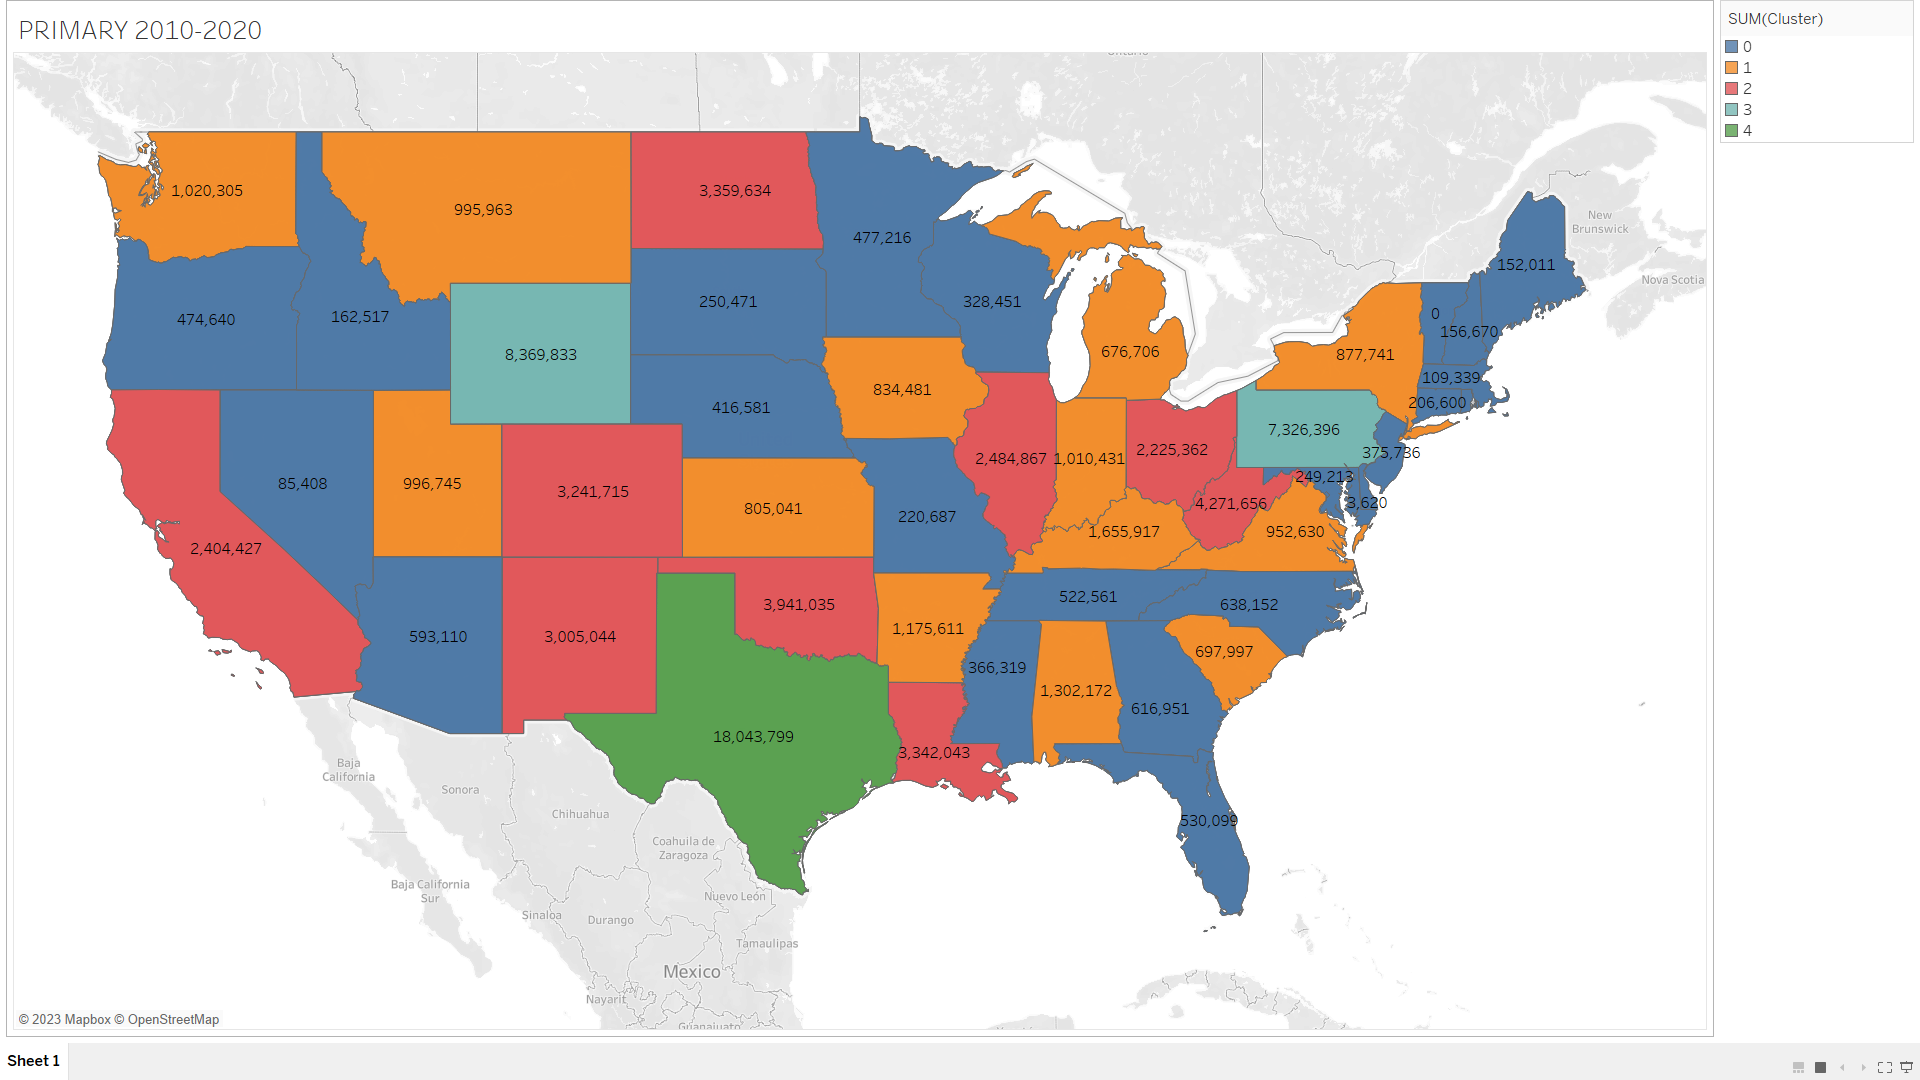

## Knowing the progess of the top 3 states.

### Progress of the states from 1960 to 1970

In [53]:
# Load the CSV file and read it
file_path = 'primary_1960_1970.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['TX','IA','CA','WA','PA','WY','US']

# Find the Cluster corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1960-1970 interval
print("Information for states in the 1960-1970 interval:")
print(state_info)

Information for states in the 1960-1970 interval:
      1960-1970  Cluster State Full Name
MN     34187.09        0       Minnesota
IA     35738.09        0            Iowa
NE    129616.27        0        Nebraska
OR    244687.27        0          Oregon
NY    302757.27        0        New York
WA    616759.91        0      Washington
WY   1158492.45        1         Wyoming
IL   1700986.91        1        Illinois
PA   2482379.18        2    Pennsylvania
CA   3027640.09        2      California
TX  13734507.91        4           Texas


### Progress of the states from 1960 to 1970

In [54]:
# Load the CSV file and read it
file_path = 'primary_1960_1970.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['TX','IA','CA','WA','PA','WY','US']

# Find the Cluster  corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1960-1970 interval
print("Information for states in the 1960-1970 interval:")
print(state_info)

Information for states in the 1960-1970 interval:
      1960-1970  Cluster State Full Name
MN     34187.09        0       Minnesota
IA     35738.09        0            Iowa
NE    129616.27        0        Nebraska
OR    244687.27        0          Oregon
NY    302757.27        0        New York
WA    616759.91        0      Washington
WY   1158492.45        1         Wyoming
IL   1700986.91        1        Illinois
PA   2482379.18        2    Pennsylvania
CA   3027640.09        2      California
TX  13734507.91        4           Texas


### Progress of the states from 1980 to 1990

In [55]:
# Load the CSV file and read it
file_path = 'primary_1980-1990.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['TX','IA','CA','WA','PA','WY','US']

# Find the Cluster corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1980-1990 interval
print("Information for states in the 1980-1990 interval:")
print(state_info)

Information for states in the 1980-1990 interval:
     1980-1990  Cluster State Full Name
IA    126840.2        0            Iowa
NE    134814.6        0        Nebraska
MN    179562.4        0       Minnesota
OR    575575.5        1          Oregon
NY    655550.3        1        New York
WA   1079083.7        1      Washington
IL   2102771.4        2        Illinois
PA   2521896.6        2    Pennsylvania
CA   3423727.9        3      California
WY   3700267.3        3         Wyoming
TX  11433614.6        4           Texas


### Progress of the states from 1990 to 2000

In [56]:
# Load the CSV file and read it
file_path = 'primary_1990-2000.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['TX','IA','CA','WA','PA','WY','US']

# Find the Cluster corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1990-2000 interval
print("Information for states in the 1990-2000 interval:")
print(state_info)

Information for states in the 1990-2000 interval:
     1990-2000  Cluster State Full Name
IA    150776.5        0            Iowa
NE    157056.4        0        Nebraska
MN    206763.5        0       Minnesota
OR    464150.6        0          Oregon
NY    758753.3        1        New York
WA   1089418.9        1      Washington
IL   2011442.4        2        Illinois
PA   2755677.8        2    Pennsylvania
CA   3126606.9        2      California
WY   5954144.8        3         Wyoming
TX  10164227.3        4           Texas


### Progress of the states from 2000 to 2010

In [57]:
# Load the CSV file and read it
file_path = 'primary_2000-2010.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['TX','IA','CA','WA','PA','WY','US']

# Find the Cluster corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 2000-2010 interval
print("Information for states in the 2000-2010 interval:")
print(state_info)


Information for states in the 2000-2010 interval:
     2000-2010  Cluster State Full Name
NE    243473.2        0        Nebraska
MN    308052.2        0       Minnesota
IA    341722.7        0            Iowa
OR    395027.1        0          Oregon
NY    850033.8        1        New York
WA    971089.5        1      Washington
IL   1967674.8        2        Illinois
CA   2723895.6        2      California
PA   2772396.9        2    Pennsylvania
WY   9567711.4        4         Wyoming
TX  10039182.4        4           Texas


### Progress of the states from 2010 to 2020

In [58]:
# Load the CSV file and read it
file_path = 'primary_2010-2020.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['TX','IA','CA','WA','PA','WY','US']

# Find the Cluster corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 2010-2020 interval
print("Information for states in the 2010-2020 interval:")
print(state_info)


Information for states in the 2010-2020 interval:
     2010-2020  Cluster State Full Name
NE    416580.7        0        Nebraska
OR    474640.3        0          Oregon
MN    477216.2        0       Minnesota
IA    834480.8        1            Iowa
NY    877741.4        1        New York
WA   1020305.0        1      Washington
CA   2404427.4        2      California
IL   2484866.6        2        Illinois
PA   7326396.1        3    Pennsylvania
WY   8369833.1        3         Wyoming
TX  18043798.9        4           Texas


### Plot the selected states

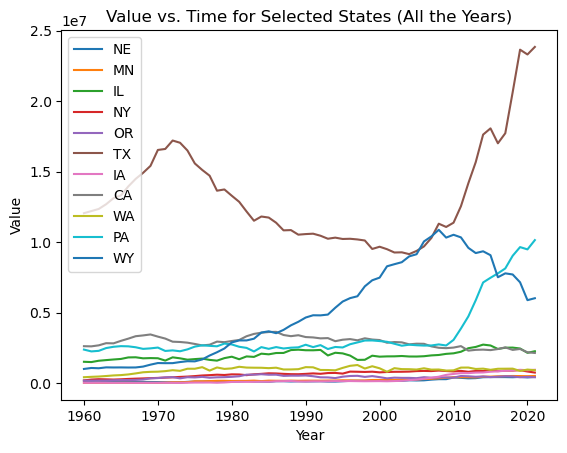

In [59]:
# Transpose the data to have years as rows and states as columns
primary_T = primary.transpose()

# Define the list of state abbreviations to plot
state_abbreviations = ['TX','IA','CA','WA','PA','WY','US']
# Plot data for the selected states with the correct legend label
for state in state_abbreviations:
    plt.plot(primary_T.index, primary_T[state], label=state)

# Add X-labels
plt.xlabel('Year')
# Add Y-labels
plt.ylabel('Value')
# Add title
plt.title('Value vs. Time for Selected States (All the Years)')
plt.legend(loc='best')

# Show the plot
plt.show()

### FORECASTING USING DEEP LEARNING MODELS

In [4]:
# Reset column names to the first row (State/Year)
primary_new.columns = primary_new.iloc[0]
primary_USA = primary_new[1:]
primary_USA_T = primary_USA.transpose()

### LSTM

In [16]:
# Define the sequence length and other parameters
sequence_length_lstm = 55
accuracy_threshold_lstm = 0.01 

# Loop through each selected state
state_mse_lstm = {}
state_rmse_lstm = {}
state_forecasts_lstm = {}
state_predictions_lstm = {}  

for state in ['TX','IA','CA','WA','PA','WY','US']:
    # Extract the data for the selected state
    data = primary_USA.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for LSTM
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_lstm):
        seq = scaled_data[i:i + sequence_length_lstm]
        target = scaled_data[i + sequence_length_lstm]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train an LSTM model
    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_lstm, 1)))
    model_lstm.add(Dense(units=1))
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts
    forecasts_lstm = []
    # Lists to store actual values
    actual_values_lstm = []
    # Lists to store predictions
    predictions_lstm = []

    # Iterate through the forecast years
    current_sequence_lstm = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
        actual_value_lstm = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_lstm.reshape(1, sequence_length_lstm, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_lstm)
        mse_lstm = mean_squared_error([actual_value_lstm], [forecast_lstm[0]])
        model_lstm.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_lstm[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_lstm > accuracy_threshold_lstm:
            continue
        else:
            forecasts_lstm.append(forecast_lstm[0])
            actual_values_lstm.append(actual_value_lstm)
            # Store the prediction for the current year
            prediction_lstm = scaler.inverse_transform(forecast_lstm.reshape(-1, 1))[0][0]
            predictions_lstm.append(prediction_lstm)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_lstm = scaler.inverse_transform(np.array(forecasts_lstm).reshape(-1, 1))
    actual_values_lstm = scaler.inverse_transform(np.array(actual_values_lstm).reshape(-1, 1))

    # Calculate the MSE
    mse_lstm = mean_squared_error(actual_values_lstm, forecasts_lstm)

    # Calculate the RMSE
    rmse_lstm = np.sqrt(mse_lstm)
    state_mse_lstm[state] = mse_lstm
    state_rmse_lstm[state] = rmse_lstm

    # Forecast for 2023
    forecast_2022_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2022_lstm[0])
    # Forecast for 2023
    forecast_2023_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_lstm = scaler.inverse_transform(forecast_2022_lstm.reshape(-1, 1))[0][0]
    forecast_2023_lstm = scaler.inverse_transform(forecast_2023_lstm.reshape(-1, 1))[0][0]
    state_forecasts_lstm[state] = {'2022': forecast_2022_lstm, '2023': forecast_2023_lstm}

    # Forecast and Store predictions for 2019
    forecast_2019_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2019_lstm[0])
    # Forecast and Store predictions for 2020
    forecast_2020_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2020_lstm[0])
    # Forecast and Store predictions for 2021
    forecast_2021_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2021_lstm[0])

    # Inverse transform the predictions for 2019
    prediction_2019_lstm = scaler.inverse_transform(forecast_2019_lstm.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2020
    prediction_2020_lstm = scaler.inverse_transform(forecast_2020_lstm.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2021
    prediction_2021_lstm = scaler.inverse_transform(forecast_2021_lstm.reshape(-1, 1))[0][0]
    state_predictions_lstm[state] = {'2019': prediction_2019_lstm, '2020': prediction_2020_lstm, '2021': prediction_2021_lstm}

# Print MSE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_lstm.items():
    print(f"MSE for {state} (LSTM): {mse_value:.2f}")    
# Print RMSE for selected states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_lstm.items():
    print(f"RMSE for {state} (LSTM): {rmse_value:.2f}")

# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_lstm.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_lstm.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year
state_accuracies_lstm = {}
for state in state_predictions_lstm:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = primary_USA.loc[state].loc[int(year)]
        predicted_value = state_predictions_lstm[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_lstm[state] = accuracies_state

# Print accuracies for each state and year
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States:")
for state, accuracies_state in state_accuracies_lstm.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 220ms/step
Epoch 1/20
8/8 [==============================] - 2s 13ms/step - loss: 0.4585
Epoch 2/20
8/8 [==============================] - 0s 13ms/step - loss: 0.3823
Epoch 3/20
8/8 [==============================] - 0s 12ms/step - loss: 0.2991
Epoch 4/20
8/8 [==============================] - 0s 11ms/step - loss: 0.1962
Epoch 5/20
8/8 [==============================] - 0s 11ms/step - loss: 0.0854
Epoch 6/20
8/8 [==============================] - 0s 21ms/step - loss: 0.0947
Epoch 7/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0521
Epoch 8/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0608
Epoch 9/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0571
Epoch 10/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0534
Epoch 11/20
8/8 [==============================] - 0s 11ms/step - loss: 0.0519
Epoch 12/20
8/8 [==============================] - 0s 11ms/step - loss: 0.0520
Epoch 13

1/1 [==============================] - 0s 16ms/step
Epoch 1/20
18/18 [==============================] - 0s 10ms/step - loss: 0.0234
Epoch 2/20
18/18 [==============================] - 0s 8ms/step - loss: 0.0233
Epoch 3/20
18/18 [==============================] - 0s 8ms/step - loss: 0.0228
Epoch 4/20
18/18 [==============================] - 0s 8ms/step - loss: 0.0223
Epoch 5/20
18/18 [==============================] - 0s 8ms/step - loss: 0.0223
Epoch 6/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0214
Epoch 7/20
18/18 [==============================] - 0s 8ms/step - loss: 0.0229
Epoch 8/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0237
Epoch 9/20
18/18 [==============================] - 0s 10ms/step - loss: 0.0213
Epoch 10/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0230
Epoch 11/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0218
Epoch 12/20
18/18 [==============================] - 0s 8ms/step - loss: 0.

27/27 [==============================] - 0s 12ms/step - loss: 0.0155
Epoch 19/20
27/27 [==============================] - 0s 10ms/step - loss: 0.0165
Epoch 20/20
1/1 [==============================] - 0s 27ms/step
Epoch 1/20
28/28 [==============================] - 0s 12ms/step - loss: 0.0179
Epoch 2/20
28/28 [==============================] - 1s 18ms/step - loss: 0.0167
Epoch 3/20
28/28 [==============================] - 0s 13ms/step - loss: 0.0154
Epoch 4/20
28/28 [==============================] - 0s 10ms/step - loss: 0.0153
Epoch 5/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0170
Epoch 6/20
28/28 [==============================] - 0s 8ms/step - loss: 0.0196
Epoch 7/20
28/28 [==============================] - 0s 10ms/step - loss: 0.0151
Epoch 8/20
28/28 [==============================] - 0s 10ms/step - loss: 0.0188
Epoch 9/20
28/28 [==============================] - 0s 16ms/step - loss: 0.0159
Epoch 10/20
28/28 [==============================] - 1s 19ms/step - 

37/37 [==============================] - 0s 8ms/step - loss: 0.0097
Epoch 17/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0090
Epoch 18/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 19/20
37/37 [==============================] - 0s 8ms/step - loss: 0.0105
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 2/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 3/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 4/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0078
Epoch 5/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 6/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0113
Epoch 7/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0108
Epoch 8/20
38/38 [==============================] - 0s 8ms/step - loss: 0.0

47/47 [==============================] - 1s 12ms/step - loss: 0.0057
Epoch 15/20
47/47 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 16/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 17/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 18/20
47/47 [==============================] - 0s 10ms/step - loss: 0.0061
Epoch 19/20
47/47 [==============================] - 1s 14ms/step - loss: 0.0057
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
48/48 [==============================] - 1s 13ms/step - loss: 0.0056
Epoch 2/20
48/48 [==============================] - 1s 12ms/step - loss: 0.0057
Epoch 3/20
48/48 [==============================] - 1s 11ms/step - loss: 0.0063
Epoch 4/20
48/48 [==============================] - 0s 8ms/step - loss: 0.0058
Epoch 5/20
48/48 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 6/20
48/48 [==============================] - 0s 9ms/step - 

57/57 [==============================] - 0s 9ms/step - loss: 0.0044
Epoch 13/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0046
Epoch 14/20
57/57 [==============================] - 1s 10ms/step - loss: 0.0059
Epoch 15/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0048
Epoch 16/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0044
Epoch 17/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0049
Epoch 18/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0043
Epoch 19/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0044
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
58/58 [==============================] - 1s 9ms/step - loss: 0.0052
Epoch 2/20
58/58 [==============================] - 1s 9ms/step - loss: 0.0053
Epoch 3/20
58/58 [==============================] - 1s 10ms/step - loss: 0.0049
Epoch 4/20
58/58 [==============================] - 1s 10ms/step - lo

12/12 [==============================] - 0s 11ms/step - loss: 0.1974
Epoch 8/20
12/12 [==============================] - 0s 12ms/step - loss: 0.1976
Epoch 9/20
12/12 [==============================] - 0s 18ms/step - loss: 0.1976
Epoch 10/20
12/12 [==============================] - 0s 18ms/step - loss: 0.1981
Epoch 11/20
12/12 [==============================] - 0s 17ms/step - loss: 0.1970
Epoch 12/20
12/12 [==============================] - 0s 9ms/step - loss: 0.1970
Epoch 13/20
12/12 [==============================] - 0s 10ms/step - loss: 0.1972
Epoch 14/20
12/12 [==============================] - 0s 9ms/step - loss: 0.1968
Epoch 15/20
12/12 [==============================] - 0s 13ms/step - loss: 0.1971
Epoch 16/20
12/12 [==============================] - 0s 12ms/step - loss: 0.1966
Epoch 17/20
12/12 [==============================] - 0s 16ms/step - loss: 0.1966
Epoch 18/20
12/12 [==============================] - 0s 9ms/step - loss: 0.1968
Epoch 19/20
12/12 [==========================

22/22 [==============================] - 0s 8ms/step - loss: 0.0381
Epoch 6/20
22/22 [==============================] - 0s 8ms/step - loss: 0.0361
Epoch 7/20
22/22 [==============================] - 0s 8ms/step - loss: 0.0373
Epoch 8/20
22/22 [==============================] - 0s 8ms/step - loss: 0.0366
Epoch 9/20
22/22 [==============================] - 0s 8ms/step - loss: 0.0334
Epoch 10/20
22/22 [==============================] - 0s 8ms/step - loss: 0.0330
Epoch 11/20
22/22 [==============================] - 0s 8ms/step - loss: 0.0386
Epoch 12/20
22/22 [==============================] - 0s 8ms/step - loss: 0.0348
Epoch 13/20
22/22 [==============================] - 0s 9ms/step - loss: 0.0349
Epoch 14/20
22/22 [==============================] - 0s 8ms/step - loss: 0.0363
Epoch 15/20
22/22 [==============================] - 0s 9ms/step - loss: 0.0406
Epoch 16/20
22/22 [==============================] - 0s 8ms/step - loss: 0.0416
Epoch 17/20
22/22 [==============================] - 0s 

32/32 [==============================] - 0s 10ms/step - loss: 0.0249
Epoch 3/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0239
Epoch 4/20
32/32 [==============================] - 0s 10ms/step - loss: 0.0234
Epoch 5/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0249
Epoch 6/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 7/20
32/32 [==============================] - 0s 10ms/step - loss: 0.0256
Epoch 8/20
32/32 [==============================] - 0s 11ms/step - loss: 0.0256
Epoch 9/20
32/32 [==============================] - 1s 19ms/step - loss: 0.0239
Epoch 10/20
32/32 [==============================] - 1s 19ms/step - loss: 0.0208
Epoch 11/20
32/32 [==============================] - 1s 16ms/step - loss: 0.0242
Epoch 12/20
32/32 [==============================] - 1s 19ms/step - loss: 0.0252
Epoch 13/20
32/32 [==============================] - 0s 12ms/step - loss: 0.0244
Epoch 14/20
32/32 [==============================]

41/41 [==============================] - 1s 20ms/step - loss: 0.0171
Epoch 20/20
1/1 [==============================] - 0s 50ms/step
Epoch 1/20
42/42 [==============================] - 1s 23ms/step - loss: 0.0163
Epoch 2/20
42/42 [==============================] - 1s 22ms/step - loss: 0.0182
Epoch 3/20
42/42 [==============================] - 1s 22ms/step - loss: 0.0198
Epoch 4/20
42/42 [==============================] - 1s 21ms/step - loss: 0.0152
Epoch 5/20
42/42 [==============================] - 1s 18ms/step - loss: 0.0157
Epoch 6/20
42/42 [==============================] - 1s 22ms/step - loss: 0.0196
Epoch 7/20
42/42 [==============================] - 1s 21ms/step - loss: 0.0170
Epoch 8/20
42/42 [==============================] - 1s 19ms/step - loss: 0.0169
Epoch 9/20
42/42 [==============================] - 1s 20ms/step - loss: 0.0184
Epoch 10/20
42/42 [==============================] - 1s 18ms/step - loss: 0.0149
Epoch 11/20
42/42 [==============================] - 1s 21ms/step 

51/51 [==============================] - 1s 15ms/step - loss: 0.0151
Epoch 16/20
51/51 [==============================] - 1s 15ms/step - loss: 0.0123
Epoch 17/20
51/51 [==============================] - 1s 15ms/step - loss: 0.0138
Epoch 18/20
51/51 [==============================] - 1s 15ms/step - loss: 0.0131
Epoch 19/20
51/51 [==============================] - 1s 15ms/step - loss: 0.0132
Epoch 20/20
1/1 [==============================] - 0s 35ms/step
Epoch 1/20
52/52 [==============================] - 1s 15ms/step - loss: 0.0133
Epoch 2/20
52/52 [==============================] - 1s 15ms/step - loss: 0.0147
Epoch 3/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0146
Epoch 4/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0131
Epoch 5/20
52/52 [==============================] - 1s 22ms/step - loss: 0.0175
Epoch 6/20
52/52 [==============================] - 1s 18ms/step - loss: 0.0152
Epoch 7/20
52/52 [==============================] - 1s 17ms/ste

61/61 [==============================] - 1s 18ms/step - loss: 0.0115
Epoch 12/20
61/61 [==============================] - 1s 19ms/step - loss: 0.0113
Epoch 13/20
61/61 [==============================] - 1s 19ms/step - loss: 0.0134
Epoch 14/20
61/61 [==============================] - 1s 21ms/step - loss: 0.0127
Epoch 15/20
61/61 [==============================] - 1s 19ms/step - loss: 0.0116
Epoch 16/20
61/61 [==============================] - 1s 19ms/step - loss: 0.0118
Epoch 17/20
61/61 [==============================] - 1s 19ms/step - loss: 0.0124
Epoch 18/20
61/61 [==============================] - 1s 21ms/step - loss: 0.0135
Epoch 19/20
61/61 [==============================] - 1s 22ms/step - loss: 0.0117
Epoch 20/20
1/1 [==============================] - 0s 48ms/step
Epoch 1/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0168
Epoch 2/20
62/62 [==============================] - 1s 16ms/step - loss: 0.0189
Epoch 3/20
62/62 [==============================] - 1s 18ms

16/16 [==============================] - 0s 20ms/step - loss: 0.0429
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.0400
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.0417
Epoch 8/20
16/16 [==============================] - 0s 16ms/step - loss: 0.0456
Epoch 9/20
16/16 [==============================] - 0s 15ms/step - loss: 0.0523
Epoch 10/20
16/16 [==============================] - 0s 15ms/step - loss: 0.0451
Epoch 11/20
16/16 [==============================] - 0s 15ms/step - loss: 0.0442
Epoch 12/20
16/16 [==============================] - 0s 14ms/step - loss: 0.0433
Epoch 13/20
16/16 [==============================] - 0s 14ms/step - loss: 0.0418
Epoch 14/20
16/16 [==============================] - 0s 15ms/step - loss: 0.0445
Epoch 15/20
16/16 [==============================] - 0s 15ms/step - loss: 0.0379
Epoch 16/20
16/16 [==============================] - 0s 15ms/step - loss: 0.0415
Epoch 17/20
16/16 [=========================

26/26 [==============================] - 0s 13ms/step - loss: 0.0267
Epoch 2/20
26/26 [==============================] - 0s 13ms/step - loss: 0.0267
Epoch 3/20
26/26 [==============================] - 0s 13ms/step - loss: 0.0374
Epoch 4/20
26/26 [==============================] - 0s 13ms/step - loss: 0.0402
Epoch 5/20
26/26 [==============================] - 0s 13ms/step - loss: 0.0317
Epoch 6/20
26/26 [==============================] - 0s 13ms/step - loss: 0.0307
Epoch 7/20
26/26 [==============================] - 0s 14ms/step - loss: 0.0295
Epoch 8/20
26/26 [==============================] - 0s 13ms/step - loss: 0.0302
Epoch 9/20
26/26 [==============================] - 0s 15ms/step - loss: 0.0273
Epoch 10/20
26/26 [==============================] - 0s 15ms/step - loss: 0.0261
Epoch 11/20
26/26 [==============================] - 0s 16ms/step - loss: 0.0286
Epoch 12/20
26/26 [==============================] - 0s 14ms/step - loss: 0.0291
Epoch 13/20
26/26 [=============================

Epoch 19/20
35/35 [==============================] - 0s 9ms/step - loss: 0.0201
Epoch 20/20
1/1 [==============================] - 0s 15ms/step
Epoch 1/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0230
Epoch 2/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0206
Epoch 3/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0164
Epoch 4/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0141
Epoch 5/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0142
Epoch 6/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 7/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 8/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0151
Epoch 9/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 10/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 11/20
36/36 [==============================] - 0s 9ms/step 

45/45 [==============================] - 0s 9ms/step - loss: 0.0119
Epoch 18/20
45/45 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 19/20
45/45 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 20/20
1/1 [==============================] - 0s 29ms/step
Epoch 1/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 2/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0109
Epoch 3/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0114
Epoch 4/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 5/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 6/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 7/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0110
Epoch 8/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 9/20
46/46 [==============================] - 0s 9ms/step - loss: 0.01

55/55 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 16/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 17/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 18/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 19/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0087
Epoch 20/20
1/1 [==============================] - 0s 20ms/step
Epoch 1/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0084
Epoch 2/20
56/56 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 3/20
56/56 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 4/20
56/56 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 5/20
56/56 [==============================] - 0s 9ms/step - loss: 0.0087
Epoch 6/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0081
Epoch 7/20
56/56 [==============================] - 0s 9ms/step - loss: 0.

10/10 [==============================] - 0s 8ms/step - loss: 0.0117
Epoch 12/20
10/10 [==============================] - 0s 8ms/step - loss: 0.0121
Epoch 13/20
10/10 [==============================] - 0s 9ms/step - loss: 0.0134
Epoch 14/20
10/10 [==============================] - 0s 9ms/step - loss: 0.0122
Epoch 15/20
10/10 [==============================] - 0s 9ms/step - loss: 0.0129
Epoch 16/20
10/10 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 17/20
10/10 [==============================] - 0s 9ms/step - loss: 0.0118
Epoch 18/20
10/10 [==============================] - 0s 9ms/step - loss: 0.0113
Epoch 19/20
10/10 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 20/20
1/1 [==============================] - 0s 30ms/step
Epoch 1/20
11/11 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 2/20
11/11 [==============================] - 0s 10ms/step - loss: 0.0098
Epoch 3/20
11/11 [==============================] - 0s 9ms/step - los

20/20 [==============================] - 0s 8ms/step - loss: 0.0128
Epoch 10/20
20/20 [==============================] - 0s 9ms/step - loss: 0.0144
Epoch 11/20
20/20 [==============================] - 0s 8ms/step - loss: 0.0157
Epoch 12/20
20/20 [==============================] - 0s 9ms/step - loss: 0.0145
Epoch 13/20
20/20 [==============================] - 0s 9ms/step - loss: 0.0131
Epoch 14/20
20/20 [==============================] - 0s 9ms/step - loss: 0.0121
Epoch 15/20
20/20 [==============================] - 0s 9ms/step - loss: 0.0120
Epoch 16/20
20/20 [==============================] - 0s 8ms/step - loss: 0.0119
Epoch 17/20
20/20 [==============================] - 0s 9ms/step - loss: 0.0121
Epoch 18/20
20/20 [==============================] - 0s 9ms/step - loss: 0.0132
Epoch 19/20
20/20 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 20/20
1/1 [==============================] - 0s 20ms/step
Epoch 1/20
21/21 [==============================] - 0s 9ms/step - lo

30/30 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 8/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 9/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0060
Epoch 10/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 11/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0068
Epoch 12/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 13/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 14/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0061
Epoch 15/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0064
Epoch 16/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0065
Epoch 17/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 18/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 19/20
30/30 [==============================] - 0

40/40 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 6/20
40/40 [==============================] - 0s 11ms/step - loss: 0.0132
Epoch 7/20
40/40 [==============================] - 0s 9ms/step - loss: 0.0130
Epoch 8/20
40/40 [==============================] - 0s 10ms/step - loss: 0.0139
Epoch 9/20
40/40 [==============================] - 0s 10ms/step - loss: 0.0136
Epoch 10/20
40/40 [==============================] - 0s 10ms/step - loss: 0.0124
Epoch 11/20
40/40 [==============================] - 0s 11ms/step - loss: 0.0119
Epoch 12/20
40/40 [==============================] - 0s 11ms/step - loss: 0.0120
Epoch 13/20
40/40 [==============================] - 0s 10ms/step - loss: 0.0127
Epoch 14/20
40/40 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 15/20
40/40 [==============================] - 0s 10ms/step - loss: 0.0126
Epoch 16/20
40/40 [==============================] - 0s 10ms/step - loss: 0.0123
Epoch 17/20
40/40 [============================

50/50 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 4/20
50/50 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 5/20
50/50 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 6/20
50/50 [==============================] - 0s 9ms/step - loss: 0.0068
Epoch 7/20
50/50 [==============================] - 0s 9ms/step - loss: 0.0067
Epoch 8/20
50/50 [==============================] - 0s 9ms/step - loss: 0.0062
Epoch 9/20
50/50 [==============================] - 0s 9ms/step - loss: 0.0065
Epoch 10/20
50/50 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 11/20
50/50 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 12/20
50/50 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 13/20
50/50 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 14/20
50/50 [==============================] - 0s 9ms/step - loss: 0.0065
Epoch 15/20
50/50 [==============================] - 0s 9m

60/60 [==============================] - 1s 9ms/step - loss: 0.0161
Epoch 2/20
60/60 [==============================] - 1s 9ms/step - loss: 0.0159
Epoch 3/20
60/60 [==============================] - 1s 9ms/step - loss: 0.0160
Epoch 4/20
60/60 [==============================] - 1s 9ms/step - loss: 0.0158
Epoch 5/20
60/60 [==============================] - 1s 9ms/step - loss: 0.0158
Epoch 6/20
60/60 [==============================] - 1s 9ms/step - loss: 0.0154
Epoch 7/20
60/60 [==============================] - 1s 9ms/step - loss: 0.0155
Epoch 8/20
60/60 [==============================] - 1s 9ms/step - loss: 0.0157
Epoch 9/20
60/60 [==============================] - 1s 11ms/step - loss: 0.0152
Epoch 10/20
60/60 [==============================] - 1s 9ms/step - loss: 0.0151
Epoch 11/20
60/60 [==============================] - 1s 18ms/step - loss: 0.0151
Epoch 12/20
60/60 [==============================] - 1s 10ms/step - loss: 0.0151
Epoch 13/20
60/60 [==============================] - 1s 1

14/14 [==============================] - 0s 10ms/step - loss: 0.0421
Epoch 18/20
14/14 [==============================] - 0s 9ms/step - loss: 0.0442
Epoch 19/20
14/14 [==============================] - 0s 9ms/step - loss: 0.0453
Epoch 20/20
1/1 [==============================] - 0s 30ms/step
Epoch 1/20
15/15 [==============================] - 0s 10ms/step - loss: 0.0396
Epoch 2/20
15/15 [==============================] - 0s 11ms/step - loss: 0.0385
Epoch 3/20
15/15 [==============================] - 0s 11ms/step - loss: 0.0426
Epoch 4/20
15/15 [==============================] - 0s 11ms/step - loss: 0.0415
Epoch 5/20
15/15 [==============================] - 0s 10ms/step - loss: 0.0442
Epoch 6/20
15/15 [==============================] - 0s 10ms/step - loss: 0.0408
Epoch 7/20
15/15 [==============================] - 0s 9ms/step - loss: 0.0458
Epoch 8/20
15/15 [==============================] - 0s 10ms/step - loss: 0.0410
Epoch 9/20
15/15 [==============================] - 0s 13ms/step - l

24/24 [==============================] - 0s 16ms/step - loss: 0.0236
Epoch 14/20
24/24 [==============================] - 0s 15ms/step - loss: 0.0246
Epoch 15/20
24/24 [==============================] - 0s 15ms/step - loss: 0.0224
Epoch 16/20
24/24 [==============================] - 0s 18ms/step - loss: 0.0283
Epoch 17/20
24/24 [==============================] - 0s 16ms/step - loss: 0.0261
Epoch 18/20
24/24 [==============================] - 0s 15ms/step - loss: 0.0257
Epoch 19/20
24/24 [==============================] - 0s 15ms/step - loss: 0.0247
Epoch 20/20
1/1 [==============================] - 0s 39ms/step
Epoch 1/20
25/25 [==============================] - 0s 15ms/step - loss: 0.0223
Epoch 2/20
25/25 [==============================] - 0s 15ms/step - loss: 0.0231
Epoch 3/20
25/25 [==============================] - 0s 15ms/step - loss: 0.0254
Epoch 4/20
25/25 [==============================] - 0s 16ms/step - loss: 0.0217
Epoch 5/20
25/25 [==============================] - 0s 17ms/s

34/34 [==============================] - 0s 10ms/step - loss: 0.0167
Epoch 10/20
34/34 [==============================] - 0s 10ms/step - loss: 0.0184
Epoch 11/20
34/34 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 12/20
34/34 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 13/20
34/34 [==============================] - 0s 10ms/step - loss: 0.0179
Epoch 14/20
34/34 [==============================] - 0s 10ms/step - loss: 0.0155
Epoch 15/20
34/34 [==============================] - 0s 10ms/step - loss: 0.0153
Epoch 16/20
34/34 [==============================] - 0s 10ms/step - loss: 0.0163
Epoch 17/20
34/34 [==============================] - 0s 11ms/step - loss: 0.0157
Epoch 18/20
34/34 [==============================] - 0s 10ms/step - loss: 0.0176
Epoch 19/20
34/34 [==============================] - 0s 10ms/step - loss: 0.0161
Epoch 20/20
1/1 [==============================] - 0s 30ms/step
Epoch 1/20
35/35 [==============================] - 0s 10

Epoch 8/20
39/39 [==============================] - 0s 11ms/step - loss: 0.0139
Epoch 9/20
39/39 [==============================] - 0s 9ms/step - loss: 0.0146
Epoch 10/20
39/39 [==============================] - 0s 9ms/step - loss: 0.0146
Epoch 11/20
39/39 [==============================] - 0s 10ms/step - loss: 0.0135
Epoch 12/20
39/39 [==============================] - 0s 10ms/step - loss: 0.0154
Epoch 13/20
39/39 [==============================] - 0s 10ms/step - loss: 0.0134
Epoch 14/20
39/39 [==============================] - 0s 9ms/step - loss: 0.0166
Epoch 15/20
39/39 [==============================] - 0s 10ms/step - loss: 0.0187
Epoch 16/20
39/39 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 17/20
39/39 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 18/20
39/39 [==============================] - 0s 10ms/step - loss: 0.0162
Epoch 19/20
39/39 [==============================] - 0s 9ms/step - loss: 0.0145
Epoch 20/20
1/1 [=================

49/49 [==============================] - 0s 10ms/step - loss: 0.0125
Epoch 5/20
49/49 [==============================] - 1s 10ms/step - loss: 0.0128
Epoch 6/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0176
Epoch 7/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0195
Epoch 8/20
49/49 [==============================] - 0s 10ms/step - loss: 0.0180
Epoch 9/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0157
Epoch 10/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 11/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 12/20
49/49 [==============================] - 0s 10ms/step - loss: 0.0113
Epoch 13/20
49/49 [==============================] - 0s 10ms/step - loss: 0.0113
Epoch 14/20
49/49 [==============================] - 0s 10ms/step - loss: 0.0128
Epoch 15/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 16/20
49/49 [==============================] 

59/59 [==============================] - 1s 9ms/step - loss: 0.0092
Epoch 2/20
59/59 [==============================] - 1s 9ms/step - loss: 0.0097
Epoch 3/20
59/59 [==============================] - 1s 9ms/step - loss: 0.0099
Epoch 4/20
59/59 [==============================] - 1s 9ms/step - loss: 0.0097
Epoch 5/20
59/59 [==============================] - 1s 9ms/step - loss: 0.0096
Epoch 6/20
59/59 [==============================] - 1s 9ms/step - loss: 0.0100
Epoch 7/20
59/59 [==============================] - 1s 9ms/step - loss: 0.0104
Epoch 8/20
59/59 [==============================] - 1s 9ms/step - loss: 0.0103
Epoch 9/20
59/59 [==============================] - 1s 9ms/step - loss: 0.0107
Epoch 10/20
59/59 [==============================] - 0s 8ms/step - loss: 0.0106
Epoch 11/20
59/59 [==============================] - 0s 8ms/step - loss: 0.0112
Epoch 12/20
59/59 [==============================] - 1s 8ms/step - loss: 0.0116
Epoch 13/20
59/59 [==============================] - 0s 8ms/

13/13 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 19/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0180
Epoch 20/20
1/1 [==============================] - 0s 30ms/step
Epoch 1/20
14/14 [==============================] - 0s 9ms/step - loss: 0.0204
Epoch 2/20
14/14 [==============================] - 0s 10ms/step - loss: 0.0156
Epoch 3/20
14/14 [==============================] - 0s 9ms/step - loss: 0.0171
Epoch 4/20
14/14 [==============================] - 0s 8ms/step - loss: 0.0167
Epoch 5/20
14/14 [==============================] - 0s 10ms/step - loss: 0.0181
Epoch 6/20
14/14 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 7/20
14/14 [==============================] - 0s 9ms/step - loss: 0.0144
Epoch 8/20
14/14 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 9/20
14/14 [==============================] - 0s 9ms/step - loss: 0.0176
Epoch 10/20
14/14 [==============================] - 0s 9ms/step - loss: 0.

18/18 [==============================] - 0s 12ms/step - loss: 0.0193
Epoch 18/20
18/18 [==============================] - 0s 11ms/step - loss: 0.0158
Epoch 19/20
18/18 [==============================] - 0s 11ms/step - loss: 0.0130
Epoch 20/20
1/1 [==============================] - 0s 28ms/step
Epoch 1/20
19/19 [==============================] - 0s 14ms/step - loss: 0.0135
Epoch 2/20
19/19 [==============================] - 0s 14ms/step - loss: 0.0096
Epoch 3/20
19/19 [==============================] - 0s 12ms/step - loss: 0.0108
Epoch 4/20
19/19 [==============================] - 0s 11ms/step - loss: 0.0101
Epoch 5/20
19/19 [==============================] - 0s 12ms/step - loss: 0.0105
Epoch 6/20
19/19 [==============================] - 0s 11ms/step - loss: 0.0104
Epoch 7/20
19/19 [==============================] - 0s 13ms/step - loss: 0.0108
Epoch 8/20
19/19 [==============================] - 0s 11ms/step - loss: 0.0118
Epoch 9/20
19/19 [==============================] - 0s 12ms/step 

28/28 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 15/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 16/20
28/28 [==============================] - 0s 10ms/step - loss: 0.0067
Epoch 17/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 18/20
28/28 [==============================] - 0s 11ms/step - loss: 0.0064
Epoch 19/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0066
Epoch 20/20
1/1 [==============================] - 0s 17ms/step
Epoch 1/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0079
Epoch 2/20
29/29 [==============================] - 0s 9ms/step - loss: 0.0071
Epoch 3/20
29/29 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 4/20
29/29 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 5/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0080
Epoch 6/20
29/29 [==============================] - 0s 9ms/step - los

38/38 [==============================] - 0s 9ms/step - loss: 0.0047
Epoch 13/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0047
Epoch 14/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 15/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0042
Epoch 16/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0051
Epoch 17/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0056
Epoch 18/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 19/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 20/20
1/1 [==============================] - 0s 30ms/step
Epoch 1/20
39/39 [==============================] - 0s 10ms/step - loss: 0.0048
Epoch 2/20
39/39 [==============================] - 0s 10ms/step - loss: 0.0052
Epoch 3/20
39/39 [==============================] - 0s 10ms/step - loss: 0.0052
Epoch 4/20
39/39 [==============================] - 0s 10ms/step -

48/48 [==============================] - 0s 10ms/step - loss: 0.0046
Epoch 10/20
48/48 [==============================] - 1s 11ms/step - loss: 0.0042
Epoch 11/20
48/48 [==============================] - 0s 10ms/step - loss: 0.0042
Epoch 12/20
48/48 [==============================] - 0s 10ms/step - loss: 0.0039
Epoch 13/20
48/48 [==============================] - 0s 10ms/step - loss: 0.0036
Epoch 14/20
48/48 [==============================] - 1s 11ms/step - loss: 0.0040
Epoch 15/20
48/48 [==============================] - 1s 11ms/step - loss: 0.0040
Epoch 16/20
48/48 [==============================] - 0s 10ms/step - loss: 0.0042
Epoch 17/20
48/48 [==============================] - 0s 10ms/step - loss: 0.0040
Epoch 18/20
48/48 [==============================] - 0s 10ms/step - loss: 0.0039
Epoch 19/20
48/48 [==============================] - 0s 10ms/step - loss: 0.0042
Epoch 20/20
1/1 [==============================] - 0s 30ms/step
Epoch 1/20
49/49 [==============================] - 0s 10

58/58 [==============================] - 1s 10ms/step - loss: 0.0032
Epoch 7/20
58/58 [==============================] - 1s 10ms/step - loss: 0.0038
Epoch 8/20
58/58 [==============================] - 1s 9ms/step - loss: 0.0035
Epoch 9/20
58/58 [==============================] - 1s 9ms/step - loss: 0.0033
Epoch 10/20
58/58 [==============================] - 1s 9ms/step - loss: 0.0034
Epoch 11/20
58/58 [==============================] - 1s 9ms/step - loss: 0.0036
Epoch 12/20
58/58 [==============================] - 1s 9ms/step - loss: 0.0037
Epoch 13/20
58/58 [==============================] - 1s 10ms/step - loss: 0.0037
Epoch 14/20
58/58 [==============================] - 1s 11ms/step - loss: 0.0033
Epoch 15/20
58/58 [==============================] - 1s 10ms/step - loss: 0.0038
Epoch 16/20
58/58 [==============================] - 1s 10ms/step - loss: 0.0038
Epoch 17/20
58/58 [==============================] - 1s 10ms/step - loss: 0.0037
Epoch 18/20
58/58 [=============================

Epoch 1/20
13/13 [==============================] - 0s 9ms/step - loss: 0.0400
Epoch 2/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0364
Epoch 3/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0378
Epoch 4/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0352
Epoch 5/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0369
Epoch 6/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0355
Epoch 7/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0344
Epoch 8/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0341
Epoch 9/20
13/13 [==============================] - 0s 9ms/step - loss: 0.0383
Epoch 10/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0387
Epoch 11/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0369
Epoch 12/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0359
Epoch 13/20
13/13 [====================

22/22 [==============================] - 0s 9ms/step - loss: 0.0226
Epoch 20/20
1/1 [==============================] - 0s 25ms/step
Epoch 1/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0184
Epoch 2/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0192
Epoch 3/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0185
Epoch 4/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0180
Epoch 5/20
23/23 [==============================] - 0s 12ms/step - loss: 0.0185
Epoch 6/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0207
Epoch 7/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0204
Epoch 8/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0186
Epoch 9/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0216
Epoch 10/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0202
Epoch 11/20
23/23 [==============================] - 0s 9ms/step - los

Epoch 18/20
27/27 [==============================] - 0s 10ms/step - loss: 0.0167
Epoch 19/20
27/27 [==============================] - 0s 10ms/step - loss: 0.0160
Epoch 20/20
1/1 [==============================] - 0s 22ms/step
Epoch 1/20
28/28 [==============================] - 0s 10ms/step - loss: 0.0148
Epoch 2/20
28/28 [==============================] - 0s 10ms/step - loss: 0.0153
Epoch 3/20
28/28 [==============================] - 0s 10ms/step - loss: 0.0183
Epoch 4/20
28/28 [==============================] - 0s 10ms/step - loss: 0.0157
Epoch 5/20
28/28 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 6/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0166
Epoch 7/20
28/28 [==============================] - 0s 10ms/step - loss: 0.0199
Epoch 8/20
28/28 [==============================] - 0s 10ms/step - loss: 0.0201
Epoch 9/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0179
Epoch 10/20
28/28 [==============================] - 0s 

37/37 [==============================] - 0s 10ms/step - loss: 0.0116
Epoch 15/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0119
Epoch 16/20
37/37 [==============================] - 0s 10ms/step - loss: 0.0113
Epoch 17/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 18/20
37/37 [==============================] - 0s 10ms/step - loss: 0.0105
Epoch 19/20
37/37 [==============================] - 0s 10ms/step - loss: 0.0114
Epoch 20/20
1/1 [==============================] - 0s 25ms/step
Epoch 1/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0091
Epoch 2/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0114
Epoch 3/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 4/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0102
Epoch 5/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0111
Epoch 6/20
38/38 [==============================] - 0s 9ms/step -

42/42 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 14/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0086
Epoch 15/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0093
Epoch 16/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0097
Epoch 17/20
42/42 [==============================] - 1s 12ms/step - loss: 0.0095
Epoch 18/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0086
Epoch 19/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0092
Epoch 20/20
1/1 [==============================] - 0s 20ms/step
Epoch 1/20
43/43 [==============================] - 0s 11ms/step - loss: 0.0085
Epoch 2/20
43/43 [==============================] - 0s 10ms/step - loss: 0.0095
Epoch 3/20
43/43 [==============================] - 0s 10ms/step - loss: 0.0089
Epoch 4/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 5/20
43/43 [==============================] - 0s 10ms/st

52/52 [==============================] - 1s 11ms/step - loss: 0.0060
Epoch 10/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0067
Epoch 11/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0064
Epoch 12/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0065
Epoch 13/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0061
Epoch 14/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0066
Epoch 15/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0068
Epoch 16/20
52/52 [==============================] - 1s 12ms/step - loss: 0.0070
Epoch 17/20
52/52 [==============================] - 1s 13ms/step - loss: 0.0083
Epoch 18/20
52/52 [==============================] - 1s 14ms/step - loss: 0.0073
Epoch 19/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0073
Epoch 20/20
1/1 [==============================] - 0s 20ms/step
Epoch 1/20
53/53 [==============================] - 1s 11

62/62 [==============================] - 1s 9ms/step - loss: 0.0061
Epoch 7/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0066
Epoch 8/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0064
Epoch 9/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0065
Epoch 10/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0060
Epoch 11/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0056
Epoch 12/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0062
Epoch 13/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0067
Epoch 14/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0060
Epoch 15/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0057
Epoch 16/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0066
Epoch 17/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0086
Epoch 18/20
62/62 [==============================] - 1s

In [5]:
# Define the sequence length and other parameters
sequence_length_lstm = 40
accuracy_threshold_lstm = 0.01 

# Loop through each selected state
state_mse_lstm = {}
state_rmse_lstm = {}
state_forecasts_lstm = {}
state_predictions_lstm = {} 

for state in ['TX','IA','CA','WA','PA','WY','US']:
    # Extract the data for the selected state
    data = primary_USA.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences for LSTM
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_lstm):
        seq = scaled_data[i:i + sequence_length_lstm]
        target = scaled_data[i + sequence_length_lstm]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)

    # Include data for training.
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]

    # Create and train an LSTM model
    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_lstm, 1)))
    model_lstm.add(Dense(units=1))
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts, actual values, and predictions
    forecasts_lstm = []
    actual_values_lstm = []
    predictions_lstm = []

    # Iterate through the forecast years
    current_sequence_lstm = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
        actual_value_lstm = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_lstm.reshape(1, sequence_length_lstm, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_lstm)
        mse_lstm = mean_squared_error([actual_value_lstm], [forecast_lstm[0]])
        model_lstm.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_lstm[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_lstm > accuracy_threshold_lstm:
            continue
        else:
            forecasts_lstm.append(forecast_lstm[0])
            actual_values_lstm.append(actual_value_lstm)

            # Store the prediction for the current year
            prediction_lstm = scaler.inverse_transform(forecast_lstm.reshape(-1, 1))[0][0]
            predictions_lstm.append(prediction_lstm)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_lstm = scaler.inverse_transform(np.array(forecasts_lstm).reshape(-1, 1))
    actual_values_lstm = scaler.inverse_transform(np.array(actual_values_lstm).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    mse_lstm = mean_squared_error(actual_values_lstm, forecasts_lstm)

    # Calculate the root mean squared error (RMSE)
    rmse_lstm = np.sqrt(mse_lstm)

    state_mse_lstm[state] = mse_lstm
    state_rmse_lstm[state] = rmse_lstm

    # Forecast for 2022 and 2023
    forecast_2022_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2022_lstm[0])
    forecast_2023_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_lstm = scaler.inverse_transform(forecast_2022_lstm.reshape(-1, 1))[0][0]
    forecast_2023_lstm = scaler.inverse_transform(forecast_2023_lstm.reshape(-1, 1))[0][0]
    state_forecasts_lstm[state] = {'2022': forecast_2022_lstm, '2023': forecast_2023_lstm}

    # Store predictions for 2019, 2020, and 2021
    forecast_2019_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2019_lstm[0])
    forecast_2020_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2020_lstm[0])
    forecast_2021_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2021_lstm[0])

    # Inverse transform the predictions to the original scale
    prediction_2019_lstm = scaler.inverse_transform(forecast_2019_lstm.reshape(-1, 1))[0][0]
    prediction_2020_lstm = scaler.inverse_transform(forecast_2020_lstm.reshape(-1, 1))[0][0]
    prediction_2021_lstm = scaler.inverse_transform(forecast_2021_lstm.reshape(-1, 1))[0][0]
    state_predictions_lstm[state] = {'2019': prediction_2019_lstm, '2020': prediction_2020_lstm, '2021': prediction_2021_lstm}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_lstm.items():
    print(f"MSE for {state} (LSTM): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_lstm.items():
    print(f"RMSE for {state} (LSTM): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_lstm.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_lstm.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year
state_accuracies_lstm = {}

for state in state_predictions_lstm:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = primary_USA.loc[state].loc[int(year)]
        predicted_value = state_predictions_lstm[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_lstm[state] = accuracies_state

# Print accuracies for each state and year
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States:")
for state, accuracies_state in state_accuracies_lstm.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 1s 684ms/step
Epoch 1/20
23/23 [==============================] - 1s 7ms/step - loss: 0.1589
Epoch 2/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0953
Epoch 3/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0712
Epoch 4/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0632
Epoch 5/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0642
Epoch 6/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0562
Epoch 7/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0543
Epoch 8/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0495
Epoch 9/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0546
Epoch 10/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0480
Epoch 11/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0588
Epoch 12/20
23/23 [==============================] - 0s 9ms/step - loss: 0

32/32 [==============================] - 0s 10ms/step - loss: 0.0166
Epoch 20/20
1/1 [==============================] - 0s 27ms/step
Epoch 1/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 2/20
33/33 [==============================] - 0s 10ms/step - loss: 0.0141
Epoch 3/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0136
Epoch 4/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0156
Epoch 5/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0151
Epoch 6/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0184
Epoch 7/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0144
Epoch 8/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0158
Epoch 9/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0155
Epoch 10/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0135
Epoch 11/20
33/33 [==============================] - 0s 8ms/step - loss: 0.

42/42 [==============================] - 0s 10ms/step - loss: 0.0101
Epoch 18/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 19/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0101
Epoch 20/20
1/1 [==============================] - 0s 21ms/step
Epoch 1/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0107
Epoch 2/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 3/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 4/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 5/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0104
Epoch 6/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0104
Epoch 7/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0089
Epoch 8/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0104
Epoch 9/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0

52/52 [==============================] - 0s 8ms/step - loss: 0.0087
Epoch 16/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0097
Epoch 17/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0083
Epoch 18/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0074
Epoch 19/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0076
Epoch 20/20
1/1 [==============================] - 0s 22ms/step
Epoch 1/20
53/53 [==============================] - 1s 9ms/step - loss: 0.0102
Epoch 2/20
53/53 [==============================] - 0s 8ms/step - loss: 0.0074
Epoch 3/20
53/53 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 4/20
53/53 [==============================] - 0s 8ms/step - loss: 0.0068
Epoch 5/20
53/53 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 6/20
53/53 [==============================] - 0s 8ms/step - loss: 0.0077
Epoch 7/20
53/53 [==============================] - 0s 8ms/step - loss: 0.

62/62 [==============================] - 0s 8ms/step - loss: 0.0072
Epoch 14/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0071
Epoch 15/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0067
Epoch 16/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0068
Epoch 17/20
62/62 [==============================] - 0s 8ms/step - loss: 0.0067
Epoch 18/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0080
Epoch 19/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0072
Epoch 20/20
1/1 [==============================] - 0s 304ms/step
Epoch 1/20
23/23 [==============================] - 2s 8ms/step - loss: 0.4311
Epoch 2/20
23/23 [==============================] - 0s 8ms/step - loss: 0.2684
Epoch 3/20
23/23 [==============================] - 0s 7ms/step - loss: 0.1358
Epoch 4/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0992
Epoch 5/20
23/23 [==============================] - 0s 8ms/step - loss:

32/32 [==============================] - 0s 8ms/step - loss: 0.0200
Epoch 9/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0212
Epoch 10/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0200
Epoch 11/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0208
Epoch 12/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0215
Epoch 13/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0201
Epoch 14/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0212
Epoch 15/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0235
Epoch 16/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0214
Epoch 17/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0189
Epoch 18/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0213
Epoch 19/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0193
Epoch 20/20
1/1 [==============================] - 0s

42/42 [==============================] - 0s 8ms/step - loss: 0.0146
Epoch 7/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0148
Epoch 8/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0142
Epoch 9/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0146
Epoch 10/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0144
Epoch 11/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0155
Epoch 12/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0164
Epoch 13/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0148
Epoch 14/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0142
Epoch 15/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0168
Epoch 16/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 17/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 18/20
42/42 [==============================] - 1s

52/52 [==============================] - 0s 8ms/step - loss: 0.0124
Epoch 5/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0106
Epoch 6/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0109
Epoch 7/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0100
Epoch 8/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0121
Epoch 9/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0118
Epoch 10/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0120
Epoch 11/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0116
Epoch 12/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0113
Epoch 13/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0108
Epoch 14/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0132
Epoch 15/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0119
Epoch 16/20
52/52 [==============================] - 0s 8

62/62 [==============================] - 1s 9ms/step - loss: 0.0152
Epoch 3/20
62/62 [==============================] - 0s 8ms/step - loss: 0.0146
Epoch 4/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0148
Epoch 5/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0124
Epoch 6/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0119
Epoch 7/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0124
Epoch 8/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0108
Epoch 9/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0149
Epoch 10/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0123
Epoch 11/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0114
Epoch 12/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0105
Epoch 13/20
62/62 [==============================] - 0s 8ms/step - loss: 0.0128
Epoch 14/20
62/62 [==============================] - 1s 9ms

31/31 [==============================] - 0s 8ms/step - loss: 0.0282
Epoch 19/20
31/31 [==============================] - 0s 8ms/step - loss: 0.0238
Epoch 20/20
1/1 [==============================] - 0s 33ms/step
Epoch 1/20
32/32 [==============================] - 0s 10ms/step - loss: 0.0213
Epoch 2/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0328
Epoch 3/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0235
Epoch 4/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0188
Epoch 5/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0222
Epoch 6/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0207
Epoch 7/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0204
Epoch 8/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0187
Epoch 9/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0177
Epoch 10/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0

41/41 [==============================] - 0s 8ms/step - loss: 0.0138
Epoch 17/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0137
Epoch 18/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0135
Epoch 19/20
41/41 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 20/20
1/1 [==============================] - 0s 29ms/step
Epoch 1/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0134
Epoch 2/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 3/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0137
Epoch 4/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0139
Epoch 5/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0136
Epoch 6/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0129
Epoch 7/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0140
Epoch 8/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0

51/51 [==============================] - 0s 8ms/step - loss: 0.0097
Epoch 15/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0105
Epoch 16/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0092
Epoch 17/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0090
Epoch 18/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 19/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0090
Epoch 20/20
1/1 [==============================] - 0s 34ms/step
Epoch 1/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0101
Epoch 2/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0092
Epoch 3/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0091
Epoch 4/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 5/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0096
Epoch 6/20
52/52 [==============================] - 0s 8ms/step - loss: 0

61/61 [==============================] - 0s 8ms/step - loss: 0.0080
Epoch 13/20
61/61 [==============================] - 1s 8ms/step - loss: 0.0074
Epoch 14/20
61/61 [==============================] - 0s 8ms/step - loss: 0.0078
Epoch 15/20
61/61 [==============================] - 0s 8ms/step - loss: 0.0079
Epoch 16/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0078
Epoch 17/20
61/61 [==============================] - 0s 8ms/step - loss: 0.0080
Epoch 18/20
61/61 [==============================] - 0s 8ms/step - loss: 0.0075
Epoch 19/20
61/61 [==============================] - 1s 8ms/step - loss: 0.0079
Epoch 20/20
1/1 [==============================] - 0s 25ms/step
Epoch 1/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0079
Epoch 2/20
62/62 [==============================] - 0s 8ms/step - loss: 0.0080
Epoch 3/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0081
Epoch 4/20
62/62 [==============================] - 0s 8ms/step - loss:

31/31 [==============================] - 0s 8ms/step - loss: 0.0081
Epoch 8/20
31/31 [==============================] - 0s 8ms/step - loss: 0.0089
Epoch 9/20
31/31 [==============================] - 0s 10ms/step - loss: 0.0092
Epoch 10/20
31/31 [==============================] - 0s 8ms/step - loss: 0.0077
Epoch 11/20
31/31 [==============================] - 0s 9ms/step - loss: 0.0071
Epoch 12/20
31/31 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 13/20
31/31 [==============================] - 0s 8ms/step - loss: 0.0076
Epoch 14/20
31/31 [==============================] - 0s 8ms/step - loss: 0.0075
Epoch 15/20
31/31 [==============================] - 0s 9ms/step - loss: 0.0084
Epoch 16/20
31/31 [==============================] - 0s 8ms/step - loss: 0.0078
Epoch 17/20
31/31 [==============================] - 0s 9ms/step - loss: 0.0070
Epoch 18/20
31/31 [==============================] - 0s 8ms/step - loss: 0.0076
Epoch 19/20
31/31 [==============================] - 

36/36 [==============================] - 0s 10ms/step - loss: 0.0069
Epoch 7/20
36/36 [==============================] - 0s 10ms/step - loss: 0.0078
Epoch 8/20
36/36 [==============================] - 0s 10ms/step - loss: 0.0073
Epoch 9/20
36/36 [==============================] - 0s 10ms/step - loss: 0.0071
Epoch 10/20
36/36 [==============================] - 0s 10ms/step - loss: 0.0066
Epoch 11/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0065
Epoch 12/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 13/20
36/36 [==============================] - 0s 10ms/step - loss: 0.0085
Epoch 14/20
36/36 [==============================] - 0s 10ms/step - loss: 0.0085
Epoch 15/20
36/36 [==============================] - 0s 10ms/step - loss: 0.0067
Epoch 16/20
36/36 [==============================] - 0s 10ms/step - loss: 0.0112
Epoch 17/20
36/36 [==============================] - 0s 10ms/step - loss: 0.0097
Epoch 18/20
36/36 [==========================

46/46 [==============================] - 1s 19ms/step - loss: 0.0100
Epoch 5/20
46/46 [==============================] - 1s 19ms/step - loss: 0.0101
Epoch 6/20
46/46 [==============================] - 1s 19ms/step - loss: 0.0108
Epoch 7/20
46/46 [==============================] - 1s 20ms/step - loss: 0.0098
Epoch 8/20
46/46 [==============================] - 1s 19ms/step - loss: 0.0099
Epoch 9/20
46/46 [==============================] - 1s 18ms/step - loss: 0.0096
Epoch 10/20
46/46 [==============================] - 1s 19ms/step - loss: 0.0096
Epoch 11/20
46/46 [==============================] - 1s 19ms/step - loss: 0.0101
Epoch 12/20
46/46 [==============================] - 1s 18ms/step - loss: 0.0094
Epoch 13/20
46/46 [==============================] - 1s 20ms/step - loss: 0.0094
Epoch 14/20
46/46 [==============================] - 1s 17ms/step - loss: 0.0097
Epoch 15/20
46/46 [==============================] - 1s 19ms/step - loss: 0.0105
Epoch 16/20
46/46 [==========================

1/1 [==============================] - 0s 81ms/step
Epoch 1/20
56/56 [==============================] - 1s 20ms/step - loss: 0.0071
Epoch 2/20
56/56 [==============================] - 1s 16ms/step - loss: 0.0073
Epoch 3/20
56/56 [==============================] - 1s 17ms/step - loss: 0.0070
Epoch 4/20
56/56 [==============================] - 1s 17ms/step - loss: 0.0072
Epoch 5/20
56/56 [==============================] - 1s 19ms/step - loss: 0.0069
Epoch 6/20
56/56 [==============================] - 1s 17ms/step - loss: 0.0066
Epoch 7/20
56/56 [==============================] - 1s 17ms/step - loss: 0.0069
Epoch 8/20
56/56 [==============================] - 1s 20ms/step - loss: 0.0067
Epoch 9/20
56/56 [==============================] - 1s 18ms/step - loss: 0.0069
Epoch 10/20
56/56 [==============================] - 1s 21ms/step - loss: 0.0072
Epoch 11/20
56/56 [==============================] - 1s 19ms/step - loss: 0.0066
Epoch 12/20
56/56 [==============================] - 1s 20ms/step 

25/25 [==============================] - 0s 19ms/step - loss: 0.0341
Epoch 15/20
25/25 [==============================] - 1s 21ms/step - loss: 0.0318
Epoch 16/20
25/25 [==============================] - 1s 21ms/step - loss: 0.0336
Epoch 17/20
25/25 [==============================] - 1s 21ms/step - loss: 0.0309
Epoch 18/20
25/25 [==============================] - 0s 19ms/step - loss: 0.0294
Epoch 19/20
25/25 [==============================] - 0s 19ms/step - loss: 0.0360
Epoch 20/20
1/1 [==============================] - 0s 74ms/step
Epoch 1/20
26/26 [==============================] - 0s 19ms/step - loss: 0.0353
Epoch 2/20
26/26 [==============================] - 0s 19ms/step - loss: 0.0303
Epoch 3/20
26/26 [==============================] - 0s 18ms/step - loss: 0.0297
Epoch 4/20
26/26 [==============================] - 0s 19ms/step - loss: 0.0301
Epoch 5/20
26/26 [==============================] - 0s 19ms/step - loss: 0.0298
Epoch 6/20
26/26 [==============================] - 0s 18ms/st

35/35 [==============================] - 1s 18ms/step - loss: 0.0200
Epoch 11/20
35/35 [==============================] - 1s 19ms/step - loss: 0.0204
Epoch 12/20
35/35 [==============================] - 1s 18ms/step - loss: 0.0200
Epoch 13/20
35/35 [==============================] - 1s 19ms/step - loss: 0.0182
Epoch 14/20
35/35 [==============================] - 1s 19ms/step - loss: 0.0191
Epoch 15/20
35/35 [==============================] - 1s 19ms/step - loss: 0.0199
Epoch 16/20
35/35 [==============================] - 1s 19ms/step - loss: 0.0179
Epoch 17/20
35/35 [==============================] - 1s 19ms/step - loss: 0.0206
Epoch 18/20
35/35 [==============================] - 1s 19ms/step - loss: 0.0205
Epoch 19/20
35/35 [==============================] - 1s 20ms/step - loss: 0.0178
Epoch 20/20
1/1 [==============================] - 0s 68ms/step
Epoch 1/20
36/36 [==============================] - 1s 19ms/step - loss: 0.0179
Epoch 2/20
36/36 [==============================] - 1s 18m

45/45 [==============================] - 1s 19ms/step - loss: 0.0147
Epoch 7/20
45/45 [==============================] - 1s 20ms/step - loss: 0.0137
Epoch 8/20
45/45 [==============================] - 1s 20ms/step - loss: 0.0138
Epoch 9/20
45/45 [==============================] - 1s 19ms/step - loss: 0.0126
Epoch 10/20
45/45 [==============================] - 1s 20ms/step - loss: 0.0131
Epoch 11/20
45/45 [==============================] - 1s 19ms/step - loss: 0.0133
Epoch 12/20
45/45 [==============================] - 1s 19ms/step - loss: 0.0142
Epoch 13/20
45/45 [==============================] - 1s 20ms/step - loss: 0.0126
Epoch 14/20
45/45 [==============================] - 1s 19ms/step - loss: 0.0137
Epoch 15/20
45/45 [==============================] - 1s 20ms/step - loss: 0.0143
Epoch 16/20
45/45 [==============================] - 1s 19ms/step - loss: 0.0128
Epoch 17/20
45/45 [==============================] - 1s 19ms/step - loss: 0.0142
Epoch 18/20
45/45 [========================

55/55 [==============================] - 1s 19ms/step - loss: 0.0124
Epoch 3/20
55/55 [==============================] - 1s 19ms/step - loss: 0.0116
Epoch 4/20
55/55 [==============================] - 1s 20ms/step - loss: 0.0121
Epoch 5/20
55/55 [==============================] - 1s 19ms/step - loss: 0.0111
Epoch 6/20
55/55 [==============================] - 1s 18ms/step - loss: 0.0111
Epoch 7/20
55/55 [==============================] - 1s 19ms/step - loss: 0.0115
Epoch 8/20
55/55 [==============================] - 1s 21ms/step - loss: 0.0126
Epoch 9/20
55/55 [==============================] - 1s 19ms/step - loss: 0.0138
Epoch 10/20
55/55 [==============================] - 1s 18ms/step - loss: 0.0114
Epoch 11/20
55/55 [==============================] - 1s 20ms/step - loss: 0.0115
Epoch 12/20
55/55 [==============================] - 1s 20ms/step - loss: 0.0117
Epoch 13/20
55/55 [==============================] - 1s 20ms/step - loss: 0.0105
Epoch 14/20
55/55 [============================

24/24 [==============================] - 1s 22ms/step - loss: 0.0059
Epoch 17/20
24/24 [==============================] - 1s 22ms/step - loss: 0.0053
Epoch 18/20
24/24 [==============================] - 1s 22ms/step - loss: 0.0059
Epoch 19/20
24/24 [==============================] - 1s 21ms/step - loss: 0.0070
Epoch 20/20
1/1 [==============================] - 0s 84ms/step
Epoch 1/20
25/25 [==============================] - 1s 22ms/step - loss: 0.0055
Epoch 2/20
25/25 [==============================] - 1s 23ms/step - loss: 0.0042
Epoch 3/20
25/25 [==============================] - 1s 21ms/step - loss: 0.0054
Epoch 4/20
25/25 [==============================] - 1s 23ms/step - loss: 0.0052
Epoch 5/20
25/25 [==============================] - 1s 23ms/step - loss: 0.0052
Epoch 6/20
25/25 [==============================] - 1s 21ms/step - loss: 0.0053
Epoch 7/20
25/25 [==============================] - 1s 22ms/step - loss: 0.0064
Epoch 8/20
25/25 [==============================] - 1s 22ms/step

34/34 [==============================] - 1s 20ms/step - loss: 0.0035
Epoch 13/20
34/34 [==============================] - 1s 21ms/step - loss: 0.0048
Epoch 14/20
34/34 [==============================] - 1s 20ms/step - loss: 0.0044
Epoch 15/20
34/34 [==============================] - 1s 21ms/step - loss: 0.0042
Epoch 16/20
34/34 [==============================] - 1s 20ms/step - loss: 0.0041
Epoch 17/20
34/34 [==============================] - 1s 21ms/step - loss: 0.0044
Epoch 18/20
34/34 [==============================] - 1s 22ms/step - loss: 0.0046
Epoch 19/20
34/34 [==============================] - 1s 20ms/step - loss: 0.0043
Epoch 20/20
1/1 [==============================] - 0s 69ms/step
Epoch 1/20
35/35 [==============================] - 1s 21ms/step - loss: 0.0041
Epoch 2/20
35/35 [==============================] - 1s 20ms/step - loss: 0.0039
Epoch 3/20
35/35 [==============================] - 1s 21ms/step - loss: 0.0036
Epoch 4/20
35/35 [==============================] - 1s 20ms/

44/44 [==============================] - 1s 21ms/step - loss: 0.0024
Epoch 9/20
44/44 [==============================] - 1s 22ms/step - loss: 0.0025
Epoch 10/20
44/44 [==============================] - 1s 21ms/step - loss: 0.0025
Epoch 11/20
44/44 [==============================] - 1s 21ms/step - loss: 0.0024
Epoch 12/20
44/44 [==============================] - 1s 21ms/step - loss: 0.0031
Epoch 13/20
44/44 [==============================] - 1s 21ms/step - loss: 0.0025
Epoch 14/20
44/44 [==============================] - 1s 21ms/step - loss: 0.0025
Epoch 15/20
44/44 [==============================] - 1s 23ms/step - loss: 0.0025
Epoch 16/20
44/44 [==============================] - 1s 22ms/step - loss: 0.0025
Epoch 17/20
44/44 [==============================] - 1s 21ms/step - loss: 0.0029
Epoch 18/20
44/44 [==============================] - 1s 22ms/step - loss: 0.0026
Epoch 19/20
44/44 [==============================] - 1s 21ms/step - loss: 0.0023
Epoch 20/20
1/1 [========================

54/54 [==============================] - 1s 19ms/step - loss: 0.0023
Epoch 5/20
54/54 [==============================] - 1s 21ms/step - loss: 0.0026
Epoch 6/20
54/54 [==============================] - 1s 21ms/step - loss: 0.0028
Epoch 7/20
54/54 [==============================] - 1s 21ms/step - loss: 0.0026
Epoch 8/20
54/54 [==============================] - 1s 20ms/step - loss: 0.0023
Epoch 9/20
54/54 [==============================] - 1s 21ms/step - loss: 0.0025
Epoch 10/20
54/54 [==============================] - 1s 21ms/step - loss: 0.0022
Epoch 11/20
54/54 [==============================] - 1s 26ms/step - loss: 0.0024
Epoch 12/20
54/54 [==============================] - 1s 19ms/step - loss: 0.0026
Epoch 13/20
54/54 [==============================] - 1s 21ms/step - loss: 0.0021
Epoch 14/20
54/54 [==============================] - 1s 21ms/step - loss: 0.0025
Epoch 15/20
54/54 [==============================] - 1s 19ms/step - loss: 0.0024
Epoch 16/20
54/54 [==========================

23/23 [==============================] - 1s 22ms/step - loss: 0.0213
Epoch 19/20
23/23 [==============================] - 0s 21ms/step - loss: 0.0211
Epoch 20/20
1/1 [==============================] - 0s 87ms/step
Epoch 1/20
24/24 [==============================] - 1s 22ms/step - loss: 0.0243
Epoch 2/20
24/24 [==============================] - 1s 21ms/step - loss: 0.0233
Epoch 3/20
24/24 [==============================] - 1s 23ms/step - loss: 0.0237
Epoch 4/20
24/24 [==============================] - 1s 24ms/step - loss: 0.0204
Epoch 5/20
24/24 [==============================] - 1s 23ms/step - loss: 0.0240
Epoch 6/20
24/24 [==============================] - 1s 23ms/step - loss: 0.0217
Epoch 7/20
24/24 [==============================] - 1s 23ms/step - loss: 0.0232
Epoch 8/20
24/24 [==============================] - 1s 23ms/step - loss: 0.0235
Epoch 9/20
24/24 [==============================] - 1s 22ms/step - loss: 0.0228
Epoch 10/20
24/24 [==============================] - 1s 23ms/step 

33/33 [==============================] - 1s 21ms/step - loss: 0.0084
Epoch 15/20
33/33 [==============================] - 1s 22ms/step - loss: 0.0097
Epoch 16/20
33/33 [==============================] - 1s 20ms/step - loss: 0.0101
Epoch 17/20
33/33 [==============================] - 1s 22ms/step - loss: 0.0096
Epoch 18/20
33/33 [==============================] - 1s 21ms/step - loss: 0.0101
Epoch 19/20
33/33 [==============================] - 1s 21ms/step - loss: 0.0100
Epoch 20/20
1/1 [==============================] - 0s 75ms/step
Epoch 1/20
34/34 [==============================] - 1s 23ms/step - loss: 0.0101
Epoch 2/20
34/34 [==============================] - 1s 21ms/step - loss: 0.0103
Epoch 3/20
34/34 [==============================] - 1s 23ms/step - loss: 0.0097
Epoch 4/20
34/34 [==============================] - 1s 22ms/step - loss: 0.0094
Epoch 5/20
34/34 [==============================] - 1s 23ms/step - loss: 0.0093
Epoch 6/20
34/34 [==============================] - 1s 22ms/st

43/43 [==============================] - 1s 18ms/step - loss: 0.0056
Epoch 11/20
43/43 [==============================] - 1s 18ms/step - loss: 0.0056
Epoch 12/20
43/43 [==============================] - 1s 20ms/step - loss: 0.0056
Epoch 13/20
43/43 [==============================] - 1s 19ms/step - loss: 0.0061
Epoch 14/20
43/43 [==============================] - 1s 19ms/step - loss: 0.0055
Epoch 15/20
43/43 [==============================] - 1s 19ms/step - loss: 0.0055
Epoch 16/20
43/43 [==============================] - 1s 19ms/step - loss: 0.0064
Epoch 17/20
43/43 [==============================] - 1s 19ms/step - loss: 0.0059
Epoch 18/20
43/43 [==============================] - 1s 18ms/step - loss: 0.0064
Epoch 19/20
43/43 [==============================] - 1s 19ms/step - loss: 0.0061
Epoch 20/20
1/1 [==============================] - 0s 86ms/step
Epoch 1/20
44/44 [==============================] - 1s 20ms/step - loss: 0.0057
Epoch 2/20
44/44 [==============================] - 1s 19m

53/53 [==============================] - 1s 22ms/step - loss: 0.0079
Epoch 7/20
53/53 [==============================] - 1s 21ms/step - loss: 0.0080
Epoch 8/20
53/53 [==============================] - 1s 21ms/step - loss: 0.0074
Epoch 9/20
53/53 [==============================] - 1s 22ms/step - loss: 0.0076
Epoch 10/20
53/53 [==============================] - 1s 21ms/step - loss: 0.0073
Epoch 11/20
53/53 [==============================] - 1s 22ms/step - loss: 0.0076
Epoch 12/20
53/53 [==============================] - 1s 22ms/step - loss: 0.0085
Epoch 13/20
53/53 [==============================] - 1s 22ms/step - loss: 0.0073
Epoch 14/20
53/53 [==============================] - 1s 22ms/step - loss: 0.0071
Epoch 15/20
53/53 [==============================] - 1s 21ms/step - loss: 0.0069
Epoch 16/20
53/53 [==============================] - 1s 21ms/step - loss: 0.0079
Epoch 17/20
53/53 [==============================] - 1s 22ms/step - loss: 0.0077
Epoch 18/20
53/53 [========================

1/1 [==============================] - 0s 71ms/step

Mean Squared Error (MSE) for All States:
MSE for TX (LSTM): 223271465443.35
MSE for IA (LSTM): 724585393.42
MSE for CA (LSTM): 5787445382.84
MSE for WA (LSTM): 1604936704.44
MSE for PA (LSTM): 95476864806.11
MSE for WY (LSTM): 307335547459.59
MSE for US (LSTM): 9420945381825.85

Root Mean Squared Error (RMSE) for All States:
RMSE for TX (LSTM): 472516.10
RMSE for IA (LSTM): 26918.12
RMSE for CA (LSTM): 76075.26
RMSE for WA (LSTM): 40061.66
RMSE for PA (LSTM): 308993.31
RMSE for WY (LSTM): 554378.52
RMSE for US (LSTM): 3069355.86

Forecasts for All States:
Forecasts for TX - 2022: 17147472.00, 2023: 16504102.00
Forecasts for IA - 2022: 530639.31, 2023: 485697.59
Forecasts for CA - 2022: 2388575.00, 2023: 2497231.00
Forecasts for WA - 2022: 933442.31, 2023: 967135.88
Forecasts for PA - 2022: 6616627.00, 2023: 4306991.50
Forecasts for WY - 2022: 4499893.50, 2023: 4058699.75
Forecasts for US - 2022: 97718552.00, 2023: 93483120.00

Predic

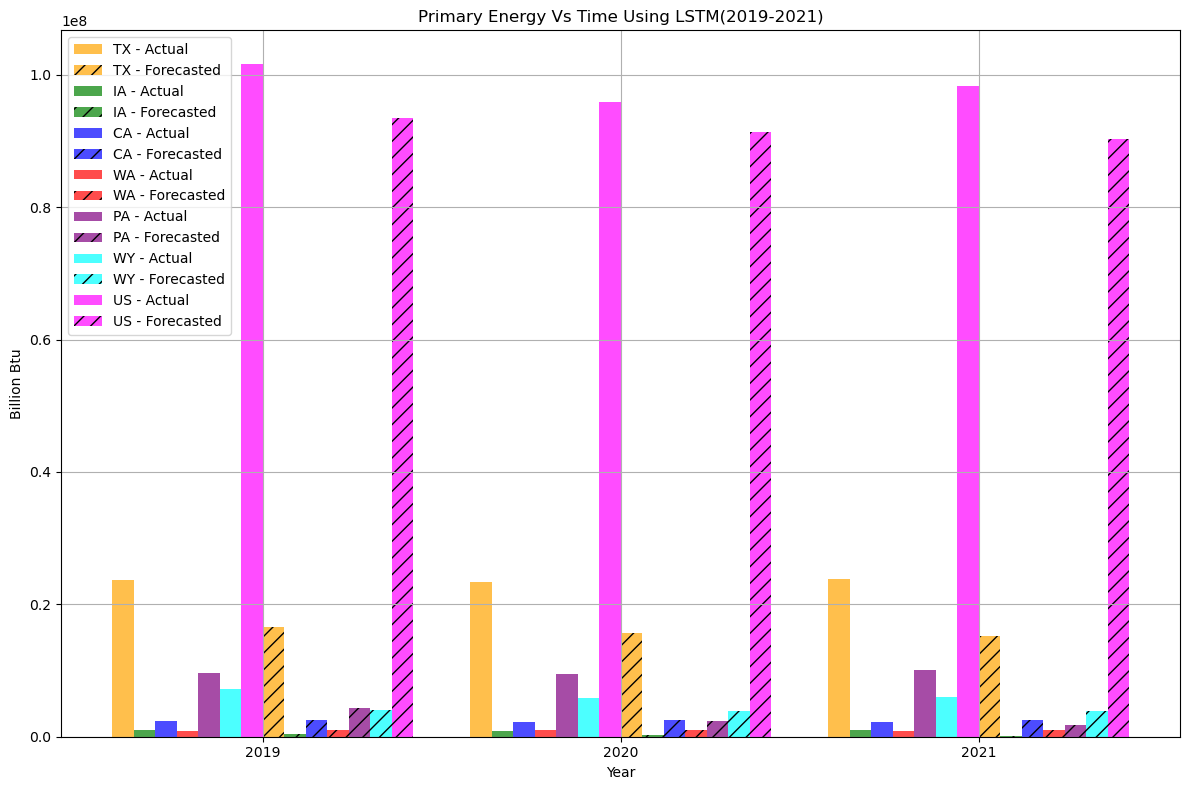

In [26]:
# list of state abbreviations to plot
state_abbreviations =  ['TX','IA','CA','WA','PA','WY','US']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = primary_USA_T.iloc[-3:]
years_forecast = selected_years

# Set the width of the bars
bar_width = 0.06

# Define colors for each state
state_colors = {'CA': 'blue', 'IA': 'green', 'TX': 'orange', 'WA': 'red', 'PA': 'purple', 'WY': 'cyan', 'US': 'magenta'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_lstm[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Primary Energy Vs Time Using LSTM(2019-2021)')

# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

### GRU

In [6]:
# Define the sequence length and other parameters
sequence_length_gru = 50
accuracy_threshold_gru = 0.01  

# Loop through each selected state
state_mse_gru = {}
state_rmse_gru = {}
state_forecasts_gru = {}
state_predictions_gru = {}  

for state in ['TX','IA','CA','WA','PA','WY','US']:
    # Extract the data for the selected state
    data = primary_USA.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for GRU
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_gru):
        seq = scaled_data[i:i + sequence_length_gru]
        target = scaled_data[i + sequence_length_gru]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train a GRU model
    model_gru = Sequential()
    model_gru.add(GRU(units=50, activation='relu', input_shape=(sequence_length_gru, 1)))
    model_gru.add(Dense(units=1))
    model_gru.compile(optimizer='adam', loss='mean_squared_error')
    # Lists to store forecast
    forecasts_gru = []
    # Lists to store actual values
    actual_values_gru = []
    # Lists to store predictions
    predictions_gru = []
    # Iterate through the forecast years
    current_sequence_gru = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
        actual_value_gru = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_gru.reshape(1, sequence_length_gru, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_gru)
        mse_gru = mean_squared_error([actual_value_gru], [forecast_gru[0]])
        model_gru.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_gru = np.append(current_sequence_gru[1:], forecast_gru[0])
        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_gru > accuracy_threshold_gru:
            continue
        else:
            forecasts_gru.append(forecast_gru[0])
            actual_values_gru.append(actual_value_gru)
            # Store the prediction for the current year
            prediction_gru = scaler.inverse_transform(forecast_gru.reshape(-1, 1))[0][0]
            predictions_gru.append(prediction_gru)
    # Inverse transform the forecasts and actual values to the original scale
    forecasts_gru = scaler.inverse_transform(np.array(forecasts_gru).reshape(-1, 1))
    actual_values_gru = scaler.inverse_transform(np.array(actual_values_gru).reshape(-1, 1))
    # Calculate the MSE
    mse_gru = mean_squared_error(actual_values_gru, forecasts_gru)
    # Calculate the RMSE
    rmse_gru = np.sqrt(mse_gru)
    state_mse_gru[state] = mse_gru
    state_rmse_gru[state] = rmse_gru

    # Forecast for 2022 and 2023
    forecast_2022_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2022_gru[0])
    forecast_2023_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_gru = scaler.inverse_transform(forecast_2022_gru.reshape(-1, 1))[0][0]
    forecast_2023_gru = scaler.inverse_transform(forecast_2023_gru.reshape(-1, 1))[0][0]
    # Store predictions for 2022 and 2023
    state_forecasts_gru[state] = {'2022': forecast_2022_gru, '2023': forecast_2023_gru}

    # Forecast and Store predictions for 2019
    forecast_2019_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2019_gru[0])
    # Forecast and Store predictions for 2020
    forecast_2020_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2020_gru[0])
    # Forecast and Store predictions for 2021
    forecast_2021_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2021_gru[0])

    # Inverse transform the predictions for 2019
    prediction_2019_gru = scaler.inverse_transform(forecast_2019_gru.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2020
    prediction_2020_gru = scaler.inverse_transform(forecast_2020_gru.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2021
    prediction_2021_gru = scaler.inverse_transform(forecast_2021_gru.reshape(-1, 1))[0][0]
    state_predictions_gru[state] = {'2019': prediction_2019_gru, '2020': prediction_2020_gru, '2021': prediction_2021_gru}

# Print MSE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_gru.items():
    print(f"MSE for {state} (GRU): {mse_value:.2f}")
    
# Print RMSE for selected states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_gru.items():
    print(f"RMSE for {state} (GRU): {rmse_value:.2f}")

# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_gru.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_gru.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for GRU
state_accuracies_gru = {}

for state in state_predictions_gru:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = primary_USA.loc[state].loc[int(year)]
        predicted_value = state_predictions_gru[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_gru[state] = accuracies_state

# Print accuracies for each state and year for GRU
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (GRU):")
for state, accuracies_state in state_accuracies_gru.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 1s 646ms/step
Epoch 1/20
13/13 [==============================] - 4s 21ms/step - loss: 0.4323
Epoch 2/20
13/13 [==============================] - 0s 23ms/step - loss: 0.3050
Epoch 3/20
13/13 [==============================] - 0s 22ms/step - loss: 0.1910
Epoch 4/20
13/13 [==============================] - 0s 22ms/step - loss: 0.0852
Epoch 5/20
13/13 [==============================] - 0s 22ms/step - loss: 0.0488
Epoch 6/20
13/13 [==============================] - 0s 22ms/step - loss: 0.0489
Epoch 7/20
13/13 [==============================] - 0s 22ms/step - loss: 0.0426
Epoch 8/20
13/13 [==============================] - 0s 23ms/step - loss: 0.0406
Epoch 9/20
13/13 [==============================] - 0s 23ms/step - loss: 0.0362
Epoch 10/20
13/13 [==============================] - 0s 23ms/step - loss: 0.0368
Epoch 11/20
13/13 [==============================] - 0s 23ms/step - loss: 0.0322
Epoch 12/20
13/13 [==============================] - 0s 23ms/step

22/22 [==============================] - 1s 24ms/step - loss: 0.0104
Epoch 18/20
22/22 [==============================] - 1s 24ms/step - loss: 0.0098
Epoch 19/20
22/22 [==============================] - 1s 24ms/step - loss: 0.0108
Epoch 20/20
1/1 [==============================] - 0s 82ms/step
Epoch 1/20
23/23 [==============================] - 1s 23ms/step - loss: 0.0113
Epoch 2/20
23/23 [==============================] - 1s 22ms/step - loss: 0.0139
Epoch 3/20
23/23 [==============================] - 1s 23ms/step - loss: 0.0127
Epoch 4/20
23/23 [==============================] - 1s 25ms/step - loss: 0.0138
Epoch 5/20
23/23 [==============================] - 1s 22ms/step - loss: 0.0107
Epoch 6/20
23/23 [==============================] - 1s 24ms/step - loss: 0.0107
Epoch 7/20
23/23 [==============================] - 1s 22ms/step - loss: 0.0098
Epoch 8/20
23/23 [==============================] - 1s 23ms/step - loss: 0.0100
Epoch 9/20
23/23 [==============================] - 1s 23ms/step 

32/32 [==============================] - 1s 23ms/step - loss: 0.0040
Epoch 14/20
32/32 [==============================] - 1s 23ms/step - loss: 0.0044
Epoch 15/20
32/32 [==============================] - 1s 24ms/step - loss: 0.0043
Epoch 16/20
32/32 [==============================] - 1s 23ms/step - loss: 0.0045
Epoch 17/20
32/32 [==============================] - 1s 23ms/step - loss: 0.0043
Epoch 18/20
32/32 [==============================] - 1s 23ms/step - loss: 0.0046
Epoch 19/20
32/32 [==============================] - 1s 23ms/step - loss: 0.0039
Epoch 20/20
1/1 [==============================] - 0s 79ms/step
Epoch 1/20
33/33 [==============================] - 1s 23ms/step - loss: 0.0048
Epoch 2/20
33/33 [==============================] - 1s 23ms/step - loss: 0.0046
Epoch 3/20
33/33 [==============================] - 1s 22ms/step - loss: 0.0050
Epoch 4/20
33/33 [==============================] - 1s 22ms/step - loss: 0.0043
Epoch 5/20
33/33 [==============================] - 1s 22ms/s

42/42 [==============================] - 1s 23ms/step - loss: 0.0034
Epoch 10/20
42/42 [==============================] - 1s 23ms/step - loss: 0.0036
Epoch 11/20
42/42 [==============================] - 1s 24ms/step - loss: 0.0036
Epoch 12/20
42/42 [==============================] - 1s 24ms/step - loss: 0.0029
Epoch 13/20
42/42 [==============================] - 1s 24ms/step - loss: 0.0033
Epoch 14/20
42/42 [==============================] - 1s 23ms/step - loss: 0.0038
Epoch 15/20
42/42 [==============================] - 1s 23ms/step - loss: 0.0033
Epoch 16/20
42/42 [==============================] - 1s 23ms/step - loss: 0.0037
Epoch 17/20
42/42 [==============================] - 1s 24ms/step - loss: 0.0036
Epoch 18/20
42/42 [==============================] - 1s 25ms/step - loss: 0.0035
Epoch 19/20
42/42 [==============================] - 1s 24ms/step - loss: 0.0035
Epoch 20/20
1/1 [==============================] - 0s 79ms/step
Epoch 1/20
43/43 [==============================] - 1s 24

52/52 [==============================] - 1s 22ms/step - loss: 0.0025
Epoch 6/20
52/52 [==============================] - 1s 23ms/step - loss: 0.0029
Epoch 7/20
52/52 [==============================] - 1s 23ms/step - loss: 0.0031
Epoch 8/20
52/52 [==============================] - 1s 24ms/step - loss: 0.0034
Epoch 9/20
52/52 [==============================] - 1s 23ms/step - loss: 0.0030
Epoch 10/20
52/52 [==============================] - 1s 23ms/step - loss: 0.0026
Epoch 11/20
52/52 [==============================] - 1s 23ms/step - loss: 0.0029
Epoch 12/20
52/52 [==============================] - 1s 23ms/step - loss: 0.0031
Epoch 13/20
52/52 [==============================] - 1s 23ms/step - loss: 0.0030
Epoch 14/20
52/52 [==============================] - 1s 23ms/step - loss: 0.0030
Epoch 15/20
52/52 [==============================] - 1s 23ms/step - loss: 0.0027
Epoch 16/20
52/52 [==============================] - 1s 23ms/step - loss: 0.0032
Epoch 17/20
52/52 [=========================

62/62 [==============================] - 2s 26ms/step - loss: 0.0040
Epoch 2/20
62/62 [==============================] - 2s 24ms/step - loss: 0.0037
Epoch 3/20
62/62 [==============================] - 1s 23ms/step - loss: 0.0033
Epoch 4/20
62/62 [==============================] - 1s 22ms/step - loss: 0.0032
Epoch 5/20
62/62 [==============================] - 2s 24ms/step - loss: 0.0033
Epoch 6/20
62/62 [==============================] - 1s 24ms/step - loss: 0.0031
Epoch 7/20
62/62 [==============================] - 2s 25ms/step - loss: 0.0024
Epoch 8/20
62/62 [==============================] - 1s 23ms/step - loss: 0.0026
Epoch 9/20
62/62 [==============================] - 1s 24ms/step - loss: 0.0028
Epoch 10/20
62/62 [==============================] - 1s 23ms/step - loss: 0.0028
Epoch 11/20
62/62 [==============================] - 1s 23ms/step - loss: 0.0025
Epoch 12/20
62/62 [==============================] - 1s 23ms/step - loss: 0.0027
Epoch 13/20
62/62 [=============================

16/16 [==============================] - 0s 24ms/step - loss: 0.0580
Epoch 18/20
16/16 [==============================] - 0s 25ms/step - loss: 0.0614
Epoch 19/20
16/16 [==============================] - 0s 24ms/step - loss: 0.0526
Epoch 20/20
1/1 [==============================] - 0s 75ms/step
Epoch 1/20
17/17 [==============================] - 0s 24ms/step - loss: 0.0510
Epoch 2/20
17/17 [==============================] - 0s 24ms/step - loss: 0.0536
Epoch 3/20
17/17 [==============================] - 0s 22ms/step - loss: 0.0525
Epoch 4/20
17/17 [==============================] - 0s 23ms/step - loss: 0.0502
Epoch 5/20
17/17 [==============================] - 0s 24ms/step - loss: 0.0513
Epoch 6/20
17/17 [==============================] - 0s 25ms/step - loss: 0.0502
Epoch 7/20
17/17 [==============================] - 0s 24ms/step - loss: 0.0536
Epoch 8/20
17/17 [==============================] - 0s 23ms/step - loss: 0.0540
Epoch 9/20
17/17 [==============================] - 0s 25ms/step 

26/26 [==============================] - 1s 24ms/step - loss: 0.0267
Epoch 14/20
26/26 [==============================] - 1s 23ms/step - loss: 0.0288
Epoch 15/20
26/26 [==============================] - 1s 23ms/step - loss: 0.0376
Epoch 16/20
26/26 [==============================] - 1s 24ms/step - loss: 0.0304
Epoch 17/20
26/26 [==============================] - 1s 22ms/step - loss: 0.0294
Epoch 18/20
26/26 [==============================] - 1s 23ms/step - loss: 0.0271
Epoch 19/20
26/26 [==============================] - 1s 23ms/step - loss: 0.0301
Epoch 20/20
1/1 [==============================] - 0s 82ms/step
Epoch 1/20
27/27 [==============================] - 1s 23ms/step - loss: 0.0293
Epoch 2/20
27/27 [==============================] - 1s 24ms/step - loss: 0.0265
Epoch 3/20
27/27 [==============================] - 1s 24ms/step - loss: 0.0265
Epoch 4/20
27/27 [==============================] - 1s 22ms/step - loss: 0.0280
Epoch 5/20
27/27 [==============================] - 1s 24ms/s

36/36 [==============================] - 1s 24ms/step - loss: 0.0199
Epoch 10/20
36/36 [==============================] - 1s 23ms/step - loss: 0.0196
Epoch 11/20
36/36 [==============================] - 1s 23ms/step - loss: 0.0200
Epoch 12/20
36/36 [==============================] - 1s 24ms/step - loss: 0.0195
Epoch 13/20
36/36 [==============================] - 1s 23ms/step - loss: 0.0201
Epoch 14/20
36/36 [==============================] - 1s 23ms/step - loss: 0.0203
Epoch 15/20
36/36 [==============================] - 1s 23ms/step - loss: 0.0180
Epoch 16/20
36/36 [==============================] - 1s 22ms/step - loss: 0.0190
Epoch 17/20
36/36 [==============================] - 1s 23ms/step - loss: 0.0194
Epoch 18/20
36/36 [==============================] - 1s 23ms/step - loss: 0.0202
Epoch 19/20
36/36 [==============================] - 1s 25ms/step - loss: 0.0215
Epoch 20/20
1/1 [==============================] - 0s 88ms/step
Epoch 1/20
37/37 [==============================] - 1s 24

46/46 [==============================] - 1s 22ms/step - loss: 0.0134
Epoch 6/20
46/46 [==============================] - 1s 22ms/step - loss: 0.0153
Epoch 7/20
46/46 [==============================] - 1s 22ms/step - loss: 0.0140
Epoch 8/20
46/46 [==============================] - 1s 23ms/step - loss: 0.0148
Epoch 9/20
46/46 [==============================] - 1s 21ms/step - loss: 0.0149
Epoch 10/20
46/46 [==============================] - 1s 21ms/step - loss: 0.0135
Epoch 11/20
46/46 [==============================] - 1s 22ms/step - loss: 0.0149
Epoch 12/20
46/46 [==============================] - 1s 22ms/step - loss: 0.0145
Epoch 13/20
46/46 [==============================] - 1s 21ms/step - loss: 0.0167
Epoch 14/20
46/46 [==============================] - 1s 22ms/step - loss: 0.0158
Epoch 15/20
46/46 [==============================] - 1s 24ms/step - loss: 0.0159
Epoch 16/20
46/46 [==============================] - 1s 24ms/step - loss: 0.0165
Epoch 17/20
46/46 [=========================

56/56 [==============================] - 1s 23ms/step - loss: 0.0125
Epoch 2/20
56/56 [==============================] - 1s 22ms/step - loss: 0.0113
Epoch 3/20
56/56 [==============================] - 1s 23ms/step - loss: 0.0129
Epoch 4/20
56/56 [==============================] - 1s 22ms/step - loss: 0.0122
Epoch 5/20
56/56 [==============================] - 1s 22ms/step - loss: 0.0128
Epoch 6/20
56/56 [==============================] - 1s 24ms/step - loss: 0.0124
Epoch 7/20
56/56 [==============================] - 1s 22ms/step - loss: 0.0119
Epoch 8/20
56/56 [==============================] - 2s 27ms/step - loss: 0.0129
Epoch 9/20
56/56 [==============================] - 1s 26ms/step - loss: 0.0115
Epoch 10/20
56/56 [==============================] - 1s 24ms/step - loss: 0.0115
Epoch 11/20
56/56 [==============================] - 1s 25ms/step - loss: 0.0123
Epoch 12/20
56/56 [==============================] - 1s 23ms/step - loss: 0.0121
Epoch 13/20
56/56 [=============================

15/15 [==============================] - 0s 24ms/step - loss: 0.0220
Epoch 16/20
15/15 [==============================] - 0s 23ms/step - loss: 0.0247
Epoch 17/20
15/15 [==============================] - 0s 22ms/step - loss: 0.0278
Epoch 18/20
15/15 [==============================] - 0s 22ms/step - loss: 0.0218
Epoch 19/20
15/15 [==============================] - 0s 23ms/step - loss: 0.0237
Epoch 20/20
1/1 [==============================] - 0s 64ms/step
Epoch 1/20
16/16 [==============================] - 0s 23ms/step - loss: 0.0271
Epoch 2/20
16/16 [==============================] - 0s 23ms/step - loss: 0.0236
Epoch 3/20
16/16 [==============================] - 0s 23ms/step - loss: 0.0226
Epoch 4/20
16/16 [==============================] - 0s 23ms/step - loss: 0.0228
Epoch 5/20
16/16 [==============================] - 0s 24ms/step - loss: 0.0225
Epoch 6/20
16/16 [==============================] - 0s 22ms/step - loss: 0.0260
Epoch 7/20
16/16 [==============================] - 0s 22ms/ste

25/25 [==============================] - 1s 22ms/step - loss: 0.0157
Epoch 12/20
25/25 [==============================] - 1s 23ms/step - loss: 0.0184
Epoch 13/20
25/25 [==============================] - 1s 23ms/step - loss: 0.0139
Epoch 14/20
25/25 [==============================] - 1s 23ms/step - loss: 0.0134
Epoch 15/20
25/25 [==============================] - 1s 22ms/step - loss: 0.0133
Epoch 16/20
25/25 [==============================] - 1s 22ms/step - loss: 0.0106
Epoch 17/20
25/25 [==============================] - 1s 23ms/step - loss: 0.0110
Epoch 18/20
25/25 [==============================] - 1s 22ms/step - loss: 0.0158
Epoch 19/20
25/25 [==============================] - 1s 23ms/step - loss: 0.0136
Epoch 20/20
1/1 [==============================] - 0s 62ms/step
Epoch 1/20
26/26 [==============================] - 1s 23ms/step - loss: 0.0101
Epoch 2/20
26/26 [==============================] - 1s 23ms/step - loss: 0.0122
Epoch 3/20
26/26 [==============================] - 1s 22ms

35/35 [==============================] - 1s 23ms/step - loss: 0.0082
Epoch 8/20
35/35 [==============================] - 1s 23ms/step - loss: 0.0075
Epoch 9/20
35/35 [==============================] - 1s 23ms/step - loss: 0.0077
Epoch 10/20
35/35 [==============================] - 1s 23ms/step - loss: 0.0083
Epoch 11/20
35/35 [==============================] - 1s 22ms/step - loss: 0.0075
Epoch 12/20
35/35 [==============================] - 1s 23ms/step - loss: 0.0087
Epoch 13/20
35/35 [==============================] - 1s 23ms/step - loss: 0.0097
Epoch 14/20
35/35 [==============================] - 1s 23ms/step - loss: 0.0074
Epoch 15/20
35/35 [==============================] - 1s 23ms/step - loss: 0.0076
Epoch 16/20
35/35 [==============================] - 1s 26ms/step - loss: 0.0077
Epoch 17/20
35/35 [==============================] - 1s 27ms/step - loss: 0.0081
Epoch 18/20
35/35 [==============================] - 1s 25ms/step - loss: 0.0084
Epoch 19/20
35/35 [=======================

45/45 [==============================] - 1s 22ms/step - loss: 0.0068
Epoch 4/20
45/45 [==============================] - 1s 25ms/step - loss: 0.0058
Epoch 5/20
45/45 [==============================] - 1s 22ms/step - loss: 0.0060
Epoch 6/20
45/45 [==============================] - 1s 21ms/step - loss: 0.0057
Epoch 7/20
45/45 [==============================] - 1s 23ms/step - loss: 0.0059
Epoch 8/20
45/45 [==============================] - 1s 23ms/step - loss: 0.0063
Epoch 9/20
45/45 [==============================] - 1s 24ms/step - loss: 0.0060
Epoch 10/20
45/45 [==============================] - 1s 23ms/step - loss: 0.0063
Epoch 11/20
45/45 [==============================] - 1s 22ms/step - loss: 0.0057
Epoch 12/20
45/45 [==============================] - 1s 24ms/step - loss: 0.0056
Epoch 13/20
45/45 [==============================] - 1s 23ms/step - loss: 0.0059
Epoch 14/20
45/45 [==============================] - 1s 22ms/step - loss: 0.0060
Epoch 15/20
45/45 [===========================

1/1 [==============================] - 0s 37ms/step
Epoch 1/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0043
Epoch 2/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0046
Epoch 3/20
55/55 [==============================] - 1s 12ms/step - loss: 0.0047
Epoch 4/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0048
Epoch 5/20
55/55 [==============================] - 1s 12ms/step - loss: 0.0044
Epoch 6/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0046
Epoch 7/20
55/55 [==============================] - 1s 12ms/step - loss: 0.0051
Epoch 8/20
55/55 [==============================] - 1s 12ms/step - loss: 0.0047
Epoch 9/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0049
Epoch 10/20
55/55 [==============================] - 1s 12ms/step - loss: 0.0049
Epoch 11/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0049
Epoch 12/20
55/55 [==============================] - 1s 12ms/step 

14/14 [==============================] - 0s 12ms/step - loss: 0.0071
Epoch 14/20
14/14 [==============================] - 0s 13ms/step - loss: 0.0071
Epoch 15/20
14/14 [==============================] - 0s 12ms/step - loss: 0.0068
Epoch 16/20
14/14 [==============================] - 0s 11ms/step - loss: 0.0070
Epoch 17/20
14/14 [==============================] - 0s 15ms/step - loss: 0.0069
Epoch 18/20
14/14 [==============================] - 0s 11ms/step - loss: 0.0076
Epoch 19/20
14/14 [==============================] - 0s 16ms/step - loss: 0.0069
Epoch 20/20
1/1 [==============================] - 0s 48ms/step
Epoch 1/20
15/15 [==============================] - 0s 13ms/step - loss: 0.0090
Epoch 2/20
15/15 [==============================] - 0s 14ms/step - loss: 0.0081
Epoch 3/20
15/15 [==============================] - 0s 13ms/step - loss: 0.0084
Epoch 4/20
15/15 [==============================] - 0s 12ms/step - loss: 0.0079
Epoch 5/20
15/15 [==============================] - 0s 13ms/s

24/24 [==============================] - 0s 11ms/step - loss: 0.0079
Epoch 10/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0084
Epoch 11/20
24/24 [==============================] - 0s 11ms/step - loss: 0.0091
Epoch 12/20
24/24 [==============================] - 0s 11ms/step - loss: 0.0075
Epoch 13/20
24/24 [==============================] - 0s 11ms/step - loss: 0.0086
Epoch 14/20
24/24 [==============================] - 0s 11ms/step - loss: 0.0085
Epoch 15/20
24/24 [==============================] - 0s 11ms/step - loss: 0.0081
Epoch 16/20
24/24 [==============================] - 0s 15ms/step - loss: 0.0082
Epoch 17/20
24/24 [==============================] - 0s 11ms/step - loss: 0.0082
Epoch 18/20
24/24 [==============================] - 0s 11ms/step - loss: 0.0080
Epoch 19/20
24/24 [==============================] - 0s 13ms/step - loss: 0.0080
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
25/25 [==============================] - 0s 12

34/34 [==============================] - 0s 13ms/step - loss: 0.0080
Epoch 6/20
34/34 [==============================] - 0s 12ms/step - loss: 0.0069
Epoch 7/20
34/34 [==============================] - 0s 13ms/step - loss: 0.0074
Epoch 8/20
34/34 [==============================] - 0s 12ms/step - loss: 0.0067
Epoch 9/20
34/34 [==============================] - 0s 12ms/step - loss: 0.0070
Epoch 10/20
34/34 [==============================] - 0s 12ms/step - loss: 0.0069
Epoch 11/20
34/34 [==============================] - 0s 12ms/step - loss: 0.0066
Epoch 12/20
34/34 [==============================] - 0s 12ms/step - loss: 0.0076
Epoch 13/20
34/34 [==============================] - 0s 12ms/step - loss: 0.0072
Epoch 14/20
34/34 [==============================] - 0s 12ms/step - loss: 0.0067
Epoch 15/20
34/34 [==============================] - 0s 11ms/step - loss: 0.0068
Epoch 16/20
34/34 [==============================] - 0s 11ms/step - loss: 0.0067
Epoch 17/20
34/34 [=========================

44/44 [==============================] - 0s 11ms/step - loss: 0.0049
Epoch 2/20
44/44 [==============================] - 1s 12ms/step - loss: 0.0049
Epoch 3/20
44/44 [==============================] - 1s 12ms/step - loss: 0.0045
Epoch 4/20
44/44 [==============================] - 0s 11ms/step - loss: 0.0044
Epoch 5/20
44/44 [==============================] - 1s 12ms/step - loss: 0.0046
Epoch 6/20
44/44 [==============================] - 0s 11ms/step - loss: 0.0043
Epoch 7/20
44/44 [==============================] - 0s 10ms/step - loss: 0.0039
Epoch 8/20
44/44 [==============================] - 0s 11ms/step - loss: 0.0039
Epoch 9/20
44/44 [==============================] - 0s 11ms/step - loss: 0.0042
Epoch 10/20
44/44 [==============================] - 0s 10ms/step - loss: 0.0041
Epoch 11/20
44/44 [==============================] - 0s 11ms/step - loss: 0.0044
Epoch 12/20
44/44 [==============================] - 0s 11ms/step - loss: 0.0040
Epoch 13/20
44/44 [=============================

53/53 [==============================] - 1s 11ms/step - loss: 7.0344e-04
Epoch 14/20
53/53 [==============================] - 1s 11ms/step - loss: 5.9697e-04
Epoch 15/20
53/53 [==============================] - 1s 11ms/step - loss: 6.9274e-04
Epoch 16/20
53/53 [==============================] - 1s 12ms/step - loss: 5.4434e-04
Epoch 17/20
53/53 [==============================] - 1s 10ms/step - loss: 4.6951e-04
Epoch 18/20
53/53 [==============================] - 1s 10ms/step - loss: 3.7513e-04
Epoch 19/20
53/53 [==============================] - 1s 11ms/step - loss: 4.0593e-04
Epoch 20/20
1/1 [==============================] - 0s 32ms/step
Epoch 1/20
54/54 [==============================] - 1s 12ms/step - loss: 3.9242e-04
Epoch 2/20
54/54 [==============================] - 1s 11ms/step - loss: 5.5964e-04
Epoch 3/20
54/54 [==============================] - 1s 11ms/step - loss: 5.9883e-04
Epoch 4/20
54/54 [==============================] - 1s 11ms/step - loss: 3.4818e-04
Epoch 5/20
54/54 

1/1 [==============================] - 0s 288ms/step
Epoch 1/20
13/13 [==============================] - 2s 11ms/step - loss: 0.3679
Epoch 2/20
13/13 [==============================] - 0s 11ms/step - loss: 0.2510
Epoch 3/20
13/13 [==============================] - 0s 11ms/step - loss: 0.1544
Epoch 4/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0962
Epoch 5/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0825
Epoch 6/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0768
Epoch 7/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0814
Epoch 8/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0760
Epoch 9/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0739
Epoch 10/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0726
Epoch 11/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0757
Epoch 12/20
13/13 [==============================] - 0s 13ms/step

22/22 [==============================] - 0s 12ms/step - loss: 0.0296
Epoch 17/20
22/22 [==============================] - 0s 10ms/step - loss: 0.0323
Epoch 18/20
22/22 [==============================] - 0s 11ms/step - loss: 0.0330
Epoch 19/20
22/22 [==============================] - 0s 11ms/step - loss: 0.0308
Epoch 20/20
1/1 [==============================] - 0s 26ms/step
Epoch 1/20
23/23 [==============================] - 0s 11ms/step - loss: 0.0285
Epoch 2/20
23/23 [==============================] - 0s 12ms/step - loss: 0.0293
Epoch 3/20
23/23 [==============================] - 0s 11ms/step - loss: 0.0297
Epoch 4/20
23/23 [==============================] - 0s 11ms/step - loss: 0.0286
Epoch 5/20
23/23 [==============================] - 0s 11ms/step - loss: 0.0281
Epoch 6/20
23/23 [==============================] - 0s 11ms/step - loss: 0.0313
Epoch 7/20
23/23 [==============================] - 0s 12ms/step - loss: 0.0302
Epoch 8/20
23/23 [==============================] - 0s 11ms/step

32/32 [==============================] - 0s 12ms/step - loss: 0.0194
Epoch 13/20
32/32 [==============================] - 0s 12ms/step - loss: 0.0202
Epoch 14/20
32/32 [==============================] - 0s 11ms/step - loss: 0.0203
Epoch 15/20
32/32 [==============================] - 0s 11ms/step - loss: 0.0205
Epoch 16/20
32/32 [==============================] - 0s 11ms/step - loss: 0.0211
Epoch 17/20
32/32 [==============================] - 0s 12ms/step - loss: 0.0230
Epoch 18/20
32/32 [==============================] - 0s 12ms/step - loss: 0.0227
Epoch 19/20
32/32 [==============================] - 0s 12ms/step - loss: 0.0213
Epoch 20/20
1/1 [==============================] - 0s 34ms/step
Epoch 1/20
33/33 [==============================] - 0s 11ms/step - loss: 0.0217
Epoch 2/20
33/33 [==============================] - 0s 12ms/step - loss: 0.0208
Epoch 3/20
33/33 [==============================] - 0s 11ms/step - loss: 0.0209
Epoch 4/20
33/33 [==============================] - 0s 11ms/

42/42 [==============================] - 0s 11ms/step - loss: 0.0153
Epoch 9/20
42/42 [==============================] - 1s 12ms/step - loss: 0.0170
Epoch 10/20
42/42 [==============================] - 0s 12ms/step - loss: 0.0185
Epoch 11/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0150
Epoch 12/20
42/42 [==============================] - 0s 12ms/step - loss: 0.0147
Epoch 13/20
42/42 [==============================] - 0s 12ms/step - loss: 0.0141
Epoch 14/20
42/42 [==============================] - 0s 12ms/step - loss: 0.0140
Epoch 15/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0158
Epoch 16/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0161
Epoch 17/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0162
Epoch 18/20
42/42 [==============================] - 1s 24ms/step - loss: 0.0145
Epoch 19/20
42/42 [==============================] - 0s 12ms/step - loss: 0.0153
Epoch 20/20
1/1 [========================

52/52 [==============================] - 1s 12ms/step - loss: 0.0136
Epoch 5/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0140
Epoch 6/20
52/52 [==============================] - 1s 12ms/step - loss: 0.0131
Epoch 7/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0133
Epoch 8/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0117
Epoch 9/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0135
Epoch 10/20
52/52 [==============================] - 1s 12ms/step - loss: 0.0153
Epoch 11/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0139
Epoch 12/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0125
Epoch 13/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0122
Epoch 14/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0127
Epoch 15/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0115
Epoch 16/20
52/52 [==========================

1/1 [==============================] - 0s 34ms/step
Epoch 1/20
62/62 [==============================] - 1s 12ms/step - loss: 0.0109
Epoch 2/20
62/62 [==============================] - 1s 12ms/step - loss: 0.0104
Epoch 3/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0103
Epoch 4/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0107
Epoch 5/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0105
Epoch 6/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0098
Epoch 7/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0102
Epoch 8/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0101
Epoch 9/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0093
Epoch 10/20
62/62 [==============================] - 1s 12ms/step - loss: 0.0095
Epoch 11/20
62/62 [==============================] - 1s 12ms/step - loss: 0.0097
Epoch 12/20
62/62 [==============================] - 1s 11ms/step 

21/21 [==============================] - 0s 12ms/step - loss: 0.0092
Epoch 15/20
21/21 [==============================] - 0s 11ms/step - loss: 0.0098
Epoch 16/20
21/21 [==============================] - 0s 11ms/step - loss: 0.0105
Epoch 17/20
21/21 [==============================] - 0s 13ms/step - loss: 0.0093
Epoch 18/20
21/21 [==============================] - 0s 11ms/step - loss: 0.0096
Epoch 19/20
21/21 [==============================] - 0s 12ms/step - loss: 0.0113
Epoch 20/20
1/1 [==============================] - 0s 30ms/step
Epoch 1/20
22/22 [==============================] - 0s 11ms/step - loss: 0.0078
Epoch 2/20
22/22 [==============================] - 0s 11ms/step - loss: 0.0083
Epoch 3/20
22/22 [==============================] - 0s 12ms/step - loss: 0.0085
Epoch 4/20
22/22 [==============================] - 0s 11ms/step - loss: 0.0088
Epoch 5/20
22/22 [==============================] - 0s 13ms/step - loss: 0.0083
Epoch 6/20
22/22 [==============================] - 0s 13ms/st

31/31 [==============================] - 0s 11ms/step - loss: 0.0059
Epoch 11/20
31/31 [==============================] - 0s 11ms/step - loss: 0.0053
Epoch 12/20
31/31 [==============================] - 0s 12ms/step - loss: 0.0060
Epoch 13/20
31/31 [==============================] - 0s 11ms/step - loss: 0.0065
Epoch 14/20
31/31 [==============================] - 0s 11ms/step - loss: 0.0061
Epoch 15/20
31/31 [==============================] - 0s 11ms/step - loss: 0.0059
Epoch 16/20
31/31 [==============================] - 0s 11ms/step - loss: 0.0056
Epoch 17/20
31/31 [==============================] - 0s 11ms/step - loss: 0.0063
Epoch 18/20
31/31 [==============================] - 0s 11ms/step - loss: 0.0062
Epoch 19/20
31/31 [==============================] - 0s 12ms/step - loss: 0.0061
Epoch 20/20
1/1 [==============================] - 0s 33ms/step
Epoch 1/20
32/32 [==============================] - 0s 10ms/step - loss: 0.0059
Epoch 2/20
32/32 [==============================] - 0s 11m

41/41 [==============================] - 1s 14ms/step - loss: 0.0039
Epoch 7/20
41/41 [==============================] - 0s 12ms/step - loss: 0.0042
Epoch 8/20
41/41 [==============================] - 0s 12ms/step - loss: 0.0046
Epoch 9/20
41/41 [==============================] - 0s 12ms/step - loss: 0.0043
Epoch 10/20
41/41 [==============================] - 1s 13ms/step - loss: 0.0039
Epoch 11/20
41/41 [==============================] - 1s 12ms/step - loss: 0.0041
Epoch 12/20
41/41 [==============================] - 0s 11ms/step - loss: 0.0042
Epoch 13/20
41/41 [==============================] - 1s 13ms/step - loss: 0.0055
Epoch 14/20
41/41 [==============================] - 1s 14ms/step - loss: 0.0050
Epoch 15/20
41/41 [==============================] - 0s 12ms/step - loss: 0.0041
Epoch 16/20
41/41 [==============================] - 0s 12ms/step - loss: 0.0040
Epoch 17/20
41/41 [==============================] - 1s 15ms/step - loss: 0.0043
Epoch 18/20
41/41 [========================

51/51 [==============================] - 1s 11ms/step - loss: 0.0051
Epoch 3/20
51/51 [==============================] - 1s 12ms/step - loss: 0.0044
Epoch 4/20
51/51 [==============================] - 1s 11ms/step - loss: 0.0042
Epoch 5/20
51/51 [==============================] - 1s 11ms/step - loss: 0.0041
Epoch 6/20
51/51 [==============================] - 1s 11ms/step - loss: 0.0043
Epoch 7/20
51/51 [==============================] - 1s 12ms/step - loss: 0.0042
Epoch 8/20
51/51 [==============================] - 1s 11ms/step - loss: 0.0042
Epoch 9/20
51/51 [==============================] - 1s 11ms/step - loss: 0.0044
Epoch 10/20
51/51 [==============================] - 1s 11ms/step - loss: 0.0043
Epoch 11/20
51/51 [==============================] - 1s 11ms/step - loss: 0.0039
Epoch 12/20
51/51 [==============================] - 1s 11ms/step - loss: 0.0041
Epoch 13/20
51/51 [==============================] - 1s 11ms/step - loss: 0.0044
Epoch 14/20
51/51 [============================

60/60 [==============================] - 1s 11ms/step - loss: 0.0029
Epoch 20/20
1/1 [==============================] - 0s 53ms/step
Epoch 1/20
61/61 [==============================] - 1s 11ms/step - loss: 0.0031
Epoch 2/20
61/61 [==============================] - 1s 11ms/step - loss: 0.0043
Epoch 3/20
61/61 [==============================] - 1s 11ms/step - loss: 0.0033
Epoch 4/20
61/61 [==============================] - 1s 11ms/step - loss: 0.0027
Epoch 5/20
61/61 [==============================] - 1s 12ms/step - loss: 0.0034
Epoch 6/20
61/61 [==============================] - 1s 11ms/step - loss: 0.0028
Epoch 7/20
61/61 [==============================] - 1s 11ms/step - loss: 0.0028
Epoch 8/20
61/61 [==============================] - 1s 11ms/step - loss: 0.0029
Epoch 9/20
61/61 [==============================] - 1s 12ms/step - loss: 0.0029
Epoch 10/20
61/61 [==============================] - 1s 12ms/step - loss: 0.0030
Epoch 11/20
61/61 [==============================] - 1s 12ms/step 

20/20 [==============================] - 0s 11ms/step - loss: 0.0156
Epoch 13/20
20/20 [==============================] - 0s 11ms/step - loss: 0.0146
Epoch 14/20
20/20 [==============================] - 0s 11ms/step - loss: 0.0148
Epoch 15/20
20/20 [==============================] - 0s 11ms/step - loss: 0.0151
Epoch 16/20
20/20 [==============================] - 0s 10ms/step - loss: 0.0149
Epoch 17/20
20/20 [==============================] - 0s 11ms/step - loss: 0.0150
Epoch 18/20
20/20 [==============================] - 0s 11ms/step - loss: 0.0156
Epoch 19/20
20/20 [==============================] - 0s 11ms/step - loss: 0.0142
Epoch 20/20
1/1 [==============================] - 0s 32ms/step
Epoch 1/20
21/21 [==============================] - 0s 11ms/step - loss: 0.0139
Epoch 2/20
21/21 [==============================] - 0s 11ms/step - loss: 0.0150
Epoch 3/20
21/21 [==============================] - 0s 12ms/step - loss: 0.0136
Epoch 4/20
21/21 [==============================] - 0s 11ms/

30/30 [==============================] - 0s 11ms/step - loss: 0.0081
Epoch 9/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0074
Epoch 10/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0075
Epoch 11/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0087
Epoch 12/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0077
Epoch 13/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0077
Epoch 14/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0069
Epoch 15/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0065
Epoch 16/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0067
Epoch 17/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0071
Epoch 18/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0071
Epoch 19/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0080
Epoch 20/20
1/1 [========================

40/40 [==============================] - 0s 11ms/step - loss: 0.0055
Epoch 5/20
40/40 [==============================] - 0s 12ms/step - loss: 0.0054
Epoch 6/20
40/40 [==============================] - 0s 11ms/step - loss: 0.0053
Epoch 7/20
40/40 [==============================] - 0s 12ms/step - loss: 0.0054
Epoch 8/20
40/40 [==============================] - 0s 11ms/step - loss: 0.0055
Epoch 9/20
40/40 [==============================] - 0s 12ms/step - loss: 0.0057
Epoch 10/20
40/40 [==============================] - 0s 12ms/step - loss: 0.0057
Epoch 11/20
40/40 [==============================] - 0s 11ms/step - loss: 0.0055
Epoch 12/20
40/40 [==============================] - 0s 11ms/step - loss: 0.0049
Epoch 13/20
40/40 [==============================] - 0s 11ms/step - loss: 0.0054
Epoch 14/20
40/40 [==============================] - 0s 12ms/step - loss: 0.0053
Epoch 15/20
40/40 [==============================] - 0s 11ms/step - loss: 0.0053
Epoch 16/20
40/40 [==========================

1/1 [==============================] - 0s 28ms/step
Epoch 1/20
50/50 [==============================] - 1s 11ms/step - loss: 0.0044
Epoch 2/20
50/50 [==============================] - 1s 11ms/step - loss: 0.0049
Epoch 3/20
50/50 [==============================] - 1s 11ms/step - loss: 0.0045
Epoch 4/20
50/50 [==============================] - 1s 11ms/step - loss: 0.0058
Epoch 5/20
50/50 [==============================] - 1s 11ms/step - loss: 0.0057
Epoch 6/20
50/50 [==============================] - 1s 11ms/step - loss: 0.0061
Epoch 7/20
50/50 [==============================] - 1s 11ms/step - loss: 0.0054
Epoch 8/20
50/50 [==============================] - 1s 11ms/step - loss: 0.0045
Epoch 9/20
50/50 [==============================] - 1s 12ms/step - loss: 0.0046
Epoch 10/20
50/50 [==============================] - 1s 11ms/step - loss: 0.0043
Epoch 11/20
50/50 [==============================] - 1s 11ms/step - loss: 0.0047
Epoch 12/20
50/50 [==============================] - 1s 12ms/step 

59/59 [==============================] - 1s 14ms/step - loss: 0.0050
Epoch 18/20
59/59 [==============================] - 1s 14ms/step - loss: 0.0050
Epoch 19/20
59/59 [==============================] - 1s 12ms/step - loss: 0.0048
Epoch 20/20
1/1 [==============================] - 0s 33ms/step
Epoch 1/20
60/60 [==============================] - 1s 12ms/step - loss: 0.0135
Epoch 2/20
60/60 [==============================] - 1s 12ms/step - loss: 0.0064
Epoch 3/20
60/60 [==============================] - 1s 12ms/step - loss: 0.0052
Epoch 4/20
60/60 [==============================] - 1s 12ms/step - loss: 0.0052
Epoch 5/20
60/60 [==============================] - 1s 14ms/step - loss: 0.0058
Epoch 6/20
60/60 [==============================] - 1s 12ms/step - loss: 0.0054
Epoch 7/20
60/60 [==============================] - 1s 12ms/step - loss: 0.0057
Epoch 8/20
60/60 [==============================] - 1s 13ms/step - loss: 0.0063
Epoch 9/20
60/60 [==============================] - 1s 11ms/step 

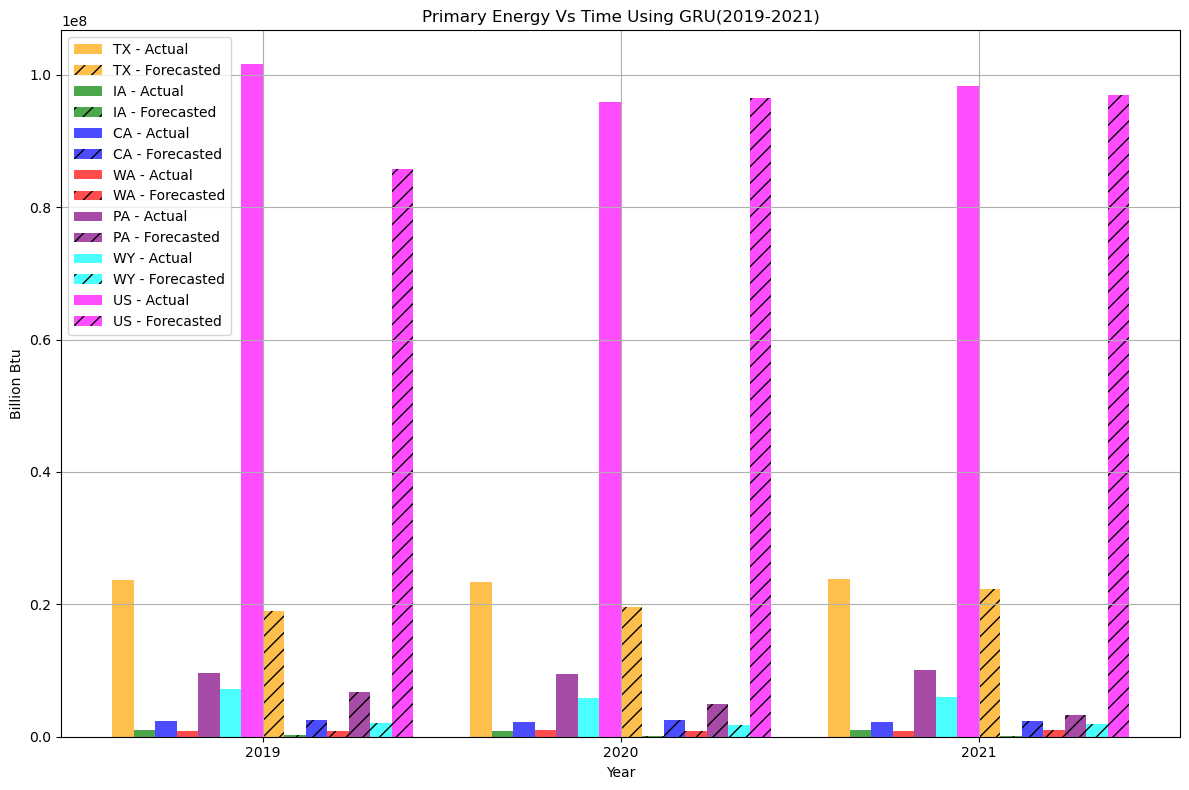

In [27]:
# list of state abbreviations to plot
state_abbreviations =  ['TX','IA','CA','WA','PA','WY','US']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = primary_USA_T.iloc[-3:]
years_forecast = selected_years

# Set the width of the bars
bar_width = 0.06

# Define colors for each state
state_colors = {'CA': 'blue', 'IA': 'green', 'TX': 'orange', 'WA': 'red', 'PA': 'purple', 'WY': 'cyan', 'US': 'magenta'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_gru[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Primary Energy Vs Time Using GRU(2019-2021)')

# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

In [7]:
# sequence length and accuracy threshold
sequence_length_gru = 40
accuracy_threshold_gru = 0.01  

# Loop through each selected state
state_mse_gru = {}
state_rmse_gru = {}
state_forecasts_gru = {}
state_predictions_gru = {} 

for state in  ['TX','IA','CA','WA','PA','WY','US']:
    # Extract the data for the selected state
    data = primary_USA.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences for GRU
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_gru):
        seq = scaled_data[i:i + sequence_length_gru]
        target = scaled_data[i + sequence_length_gru]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)

    # Include training data
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]

    # Create and train a GRU model
    model_gru = Sequential()
    model_gru.add(GRU(units=50, activation='relu', input_shape=(sequence_length_gru, 1)))
    model_gru.add(Dense(units=1))
    model_gru.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts, actual values, and predictions
    forecasts_gru = []
    actual_values_gru = []
    predictions_gru = []

    # Iterate through the forecast years
    current_sequence_gru = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
        actual_value_gru = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_gru.reshape(1, sequence_length_gru, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_gru)
        mse_gru = mean_squared_error([actual_value_gru], [forecast_gru[0]])
        model_gru.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_gru = np.append(current_sequence_gru[1:], forecast_gru[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_gru > accuracy_threshold_gru:
            continue
        else:
            forecasts_gru.append(forecast_gru[0])
            actual_values_gru.append(actual_value_gru)

            # Store the prediction for the current year
            prediction_gru = scaler.inverse_transform(forecast_gru.reshape(-1, 1))[0][0]
            predictions_gru.append(prediction_gru)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_gru = scaler.inverse_transform(np.array(forecasts_gru).reshape(-1, 1))
    actual_values_gru = scaler.inverse_transform(np.array(actual_values_gru).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    mse_gru = mean_squared_error(actual_values_gru, forecasts_gru)

    # Calculate the root mean squared error (RMSE)
    rmse_gru = np.sqrt(mse_gru)

    state_mse_gru[state] = mse_gru
    state_rmse_gru[state] = rmse_gru

    # Forecast for 2022 and 2023
    forecast_2022_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2022_gru[0])
    forecast_2023_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_gru = scaler.inverse_transform(forecast_2022_gru.reshape(-1, 1))[0][0]
    forecast_2023_gru = scaler.inverse_transform(forecast_2023_gru.reshape(-1, 1))[0][0]
    state_forecasts_gru[state] = {'2022': forecast_2022_gru, '2023': forecast_2023_gru}

    # Store predictions for 2019, 2020, and 2021
    forecast_2019_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2019_gru[0])
    forecast_2020_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2020_gru[0])
    forecast_2021_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2021_gru[0])

    # Inverse transform the predictions to the original scale
    prediction_2019_gru = scaler.inverse_transform(forecast_2019_gru.reshape(-1, 1))[0][0]
    prediction_2020_gru = scaler.inverse_transform(forecast_2020_gru.reshape(-1, 1))[0][0]
    prediction_2021_gru = scaler.inverse_transform(forecast_2021_gru.reshape(-1, 1))[0][0]
    state_predictions_gru[state] = {'2019': prediction_2019_gru, '2020': prediction_2020_gru, '2021': prediction_2021_gru}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_gru.items():
    print(f"MSE for {state} (GRU): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_gru.items():
    print(f"RMSE for {state} (GRU): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_gru.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_gru.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for GRU
state_accuracies_gru = {}

for state in state_predictions_gru:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = primary_USA.loc[state].loc[int(year)]
        predicted_value = state_predictions_gru[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_gru[state] = accuracies_state

# Print accuracies for each state and year for GRU
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (GRU):")
for state, accuracies_state in state_accuracies_gru.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 157ms/step
Epoch 1/20
23/23 [==============================] - 1s 5ms/step - loss: 0.1832
Epoch 2/20
23/23 [==============================] - 0s 5ms/step - loss: 0.1136
Epoch 3/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0707
Epoch 4/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0604
Epoch 5/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0530
Epoch 6/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0444
Epoch 7/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0379
Epoch 8/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0358
Epoch 9/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0359
Epoch 10/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0315
Epoch 11/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0316
Epoch 12/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0

32/32 [==============================] - 0s 6ms/step - loss: 0.0189
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
33/33 [==============================] - 0s 6ms/step - loss: 0.0181
Epoch 2/20
33/33 [==============================] - 0s 5ms/step - loss: 0.0176
Epoch 3/20
33/33 [==============================] - 0s 6ms/step - loss: 0.0174
Epoch 4/20
33/33 [==============================] - 0s 6ms/step - loss: 0.0168
Epoch 5/20
33/33 [==============================] - 0s 6ms/step - loss: 0.0176
Epoch 6/20
33/33 [==============================] - 0s 5ms/step - loss: 0.0168
Epoch 7/20
33/33 [==============================] - 0s 6ms/step - loss: 0.0163
Epoch 8/20
33/33 [==============================] - 0s 6ms/step - loss: 0.0168
Epoch 9/20
33/33 [==============================] - 0s 6ms/step - loss: 0.0172
Epoch 10/20
33/33 [==============================] - 0s 6ms/step - loss: 0.0184
Epoch 11/20
33/33 [==============================] - 0s 6ms/step - loss: 0.01

42/42 [==============================] - 0s 6ms/step - loss: 0.0106
Epoch 18/20
42/42 [==============================] - 0s 5ms/step - loss: 0.0107
Epoch 19/20
42/42 [==============================] - 0s 5ms/step - loss: 0.0107
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
43/43 [==============================] - 0s 6ms/step - loss: 0.0101
Epoch 2/20
43/43 [==============================] - 0s 5ms/step - loss: 0.0111
Epoch 3/20
43/43 [==============================] - 0s 6ms/step - loss: 0.0105
Epoch 4/20
43/43 [==============================] - 0s 6ms/step - loss: 0.0103
Epoch 5/20
43/43 [==============================] - 0s 6ms/step - loss: 0.0101
Epoch 6/20
43/43 [==============================] - 0s 5ms/step - loss: 0.0105
Epoch 7/20
43/43 [==============================] - 0s 5ms/step - loss: 0.0106
Epoch 8/20
43/43 [==============================] - 0s 6ms/step - loss: 0.0116
Epoch 9/20
43/43 [==============================] - 0s 6ms/step - loss: 0.01

52/52 [==============================] - 0s 6ms/step - loss: 0.0082
Epoch 16/20
52/52 [==============================] - 0s 6ms/step - loss: 0.0080
Epoch 17/20
52/52 [==============================] - 0s 7ms/step - loss: 0.0074
Epoch 18/20
52/52 [==============================] - 0s 6ms/step - loss: 0.0079
Epoch 19/20
52/52 [==============================] - 0s 6ms/step - loss: 0.0077
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
53/53 [==============================] - 0s 6ms/step - loss: 0.0083
Epoch 2/20
53/53 [==============================] - 0s 6ms/step - loss: 0.0081
Epoch 3/20
53/53 [==============================] - 0s 6ms/step - loss: 0.0086
Epoch 4/20
53/53 [==============================] - 0s 6ms/step - loss: 0.0085
Epoch 5/20
53/53 [==============================] - 0s 6ms/step - loss: 0.0081
Epoch 6/20
53/53 [==============================] - 0s 6ms/step - loss: 0.0090
Epoch 7/20
53/53 [==============================] - 0s 6ms/step - loss: 0.

62/62 [==============================] - 0s 6ms/step - loss: 0.0060
Epoch 14/20
62/62 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 15/20
62/62 [==============================] - 0s 6ms/step - loss: 0.0057
Epoch 16/20
62/62 [==============================] - 0s 6ms/step - loss: 0.0089
Epoch 17/20
62/62 [==============================] - 0s 6ms/step - loss: 0.0098
Epoch 18/20
62/62 [==============================] - 0s 6ms/step - loss: 0.0060
Epoch 19/20
62/62 [==============================] - 0s 6ms/step - loss: 0.0064
Epoch 20/20
1/1 [==============================] - 0s 157ms/step
Epoch 1/20
23/23 [==============================] - 1s 7ms/step - loss: 0.1855
Epoch 2/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0773
Epoch 3/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0463
Epoch 4/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0433
Epoch 5/20
23/23 [==============================] - 0s 6ms/step - loss:

32/32 [==============================] - 0s 6ms/step - loss: 0.0224
Epoch 9/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0202
Epoch 10/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0226
Epoch 11/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0239
Epoch 12/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0218
Epoch 13/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0226
Epoch 14/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0234
Epoch 15/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0235
Epoch 16/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0254
Epoch 17/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0207
Epoch 18/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0209
Epoch 19/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0203
Epoch 20/20
1/1 [==============================] - 0s

42/42 [==============================] - 0s 6ms/step - loss: 0.0159
Epoch 7/20
42/42 [==============================] - 0s 6ms/step - loss: 0.0161
Epoch 8/20
42/42 [==============================] - 0s 6ms/step - loss: 0.0167
Epoch 9/20
42/42 [==============================] - 0s 6ms/step - loss: 0.0181
Epoch 10/20
42/42 [==============================] - 0s 6ms/step - loss: 0.0154
Epoch 11/20
42/42 [==============================] - 0s 6ms/step - loss: 0.0156
Epoch 12/20
42/42 [==============================] - 0s 6ms/step - loss: 0.0163
Epoch 13/20
42/42 [==============================] - 0s 6ms/step - loss: 0.0146
Epoch 14/20
42/42 [==============================] - 0s 6ms/step - loss: 0.0162
Epoch 15/20
42/42 [==============================] - 0s 6ms/step - loss: 0.0158
Epoch 16/20
42/42 [==============================] - 0s 6ms/step - loss: 0.0144
Epoch 17/20
42/42 [==============================] - 0s 6ms/step - loss: 0.0144
Epoch 18/20
42/42 [==============================] - 0s

52/52 [==============================] - 0s 6ms/step - loss: 0.0129
Epoch 5/20
52/52 [==============================] - 0s 6ms/step - loss: 0.0138
Epoch 6/20
52/52 [==============================] - 0s 6ms/step - loss: 0.0159
Epoch 7/20
52/52 [==============================] - 0s 6ms/step - loss: 0.0125
Epoch 8/20
52/52 [==============================] - 0s 6ms/step - loss: 0.0113
Epoch 9/20
52/52 [==============================] - 0s 6ms/step - loss: 0.0111
Epoch 10/20
52/52 [==============================] - 0s 6ms/step - loss: 0.0120
Epoch 11/20
52/52 [==============================] - 0s 6ms/step - loss: 0.0126
Epoch 12/20
52/52 [==============================] - 0s 7ms/step - loss: 0.0114
Epoch 13/20
52/52 [==============================] - 0s 7ms/step - loss: 0.0106
Epoch 14/20
52/52 [==============================] - 0s 6ms/step - loss: 0.0123
Epoch 15/20
52/52 [==============================] - 0s 6ms/step - loss: 0.0115
Epoch 16/20
52/52 [==============================] - 0s 6

62/62 [==============================] - 0s 6ms/step - loss: 0.0093
Epoch 3/20
62/62 [==============================] - 0s 6ms/step - loss: 0.0087
Epoch 4/20
62/62 [==============================] - 0s 6ms/step - loss: 0.0101
Epoch 5/20
62/62 [==============================] - 0s 6ms/step - loss: 0.0082
Epoch 6/20
62/62 [==============================] - 0s 6ms/step - loss: 0.0088
Epoch 7/20
62/62 [==============================] - 0s 6ms/step - loss: 0.0094
Epoch 8/20
62/62 [==============================] - 0s 6ms/step - loss: 0.0086
Epoch 9/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0095
Epoch 10/20
62/62 [==============================] - 0s 6ms/step - loss: 0.0083
Epoch 11/20
62/62 [==============================] - 0s 6ms/step - loss: 0.0087
Epoch 12/20
62/62 [==============================] - 0s 6ms/step - loss: 0.0091
Epoch 13/20
62/62 [==============================] - 0s 6ms/step - loss: 0.0094
Epoch 14/20
62/62 [==============================] - 0s 6ms

31/31 [==============================] - 0s 6ms/step - loss: 0.0193
Epoch 19/20
31/31 [==============================] - 0s 6ms/step - loss: 0.0182
Epoch 20/20
1/1 [==============================] - 0s 15ms/step
Epoch 1/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0199
Epoch 2/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0230
Epoch 3/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0171
Epoch 4/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0154
Epoch 5/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0158
Epoch 6/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0168
Epoch 7/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0162
Epoch 8/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0181
Epoch 9/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0170
Epoch 10/20
32/32 [==============================] - 0s 6ms/step - loss: 0.01

41/41 [==============================] - 0s 6ms/step - loss: 0.0125
Epoch 17/20
41/41 [==============================] - 0s 6ms/step - loss: 0.0131
Epoch 18/20
41/41 [==============================] - 0s 6ms/step - loss: 0.0134
Epoch 19/20
41/41 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 20/20
1/1 [==============================] - 0s 38ms/step
Epoch 1/20
42/42 [==============================] - 0s 6ms/step - loss: 0.0115
Epoch 2/20
42/42 [==============================] - 0s 6ms/step - loss: 0.0118
Epoch 3/20
42/42 [==============================] - 0s 6ms/step - loss: 0.0112
Epoch 4/20
42/42 [==============================] - 0s 7ms/step - loss: 0.0120
Epoch 5/20
42/42 [==============================] - 0s 6ms/step - loss: 0.0124
Epoch 6/20
42/42 [==============================] - 0s 6ms/step - loss: 0.0118
Epoch 7/20
42/42 [==============================] - 0s 6ms/step - loss: 0.0116
Epoch 8/20
42/42 [==============================] - 0s 6ms/step - loss: 0.0

51/51 [==============================] - 0s 6ms/step - loss: 0.0085
Epoch 15/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0088
Epoch 16/20
51/51 [==============================] - 0s 6ms/step - loss: 0.0085
Epoch 17/20
51/51 [==============================] - 0s 6ms/step - loss: 0.0083
Epoch 18/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 19/20
51/51 [==============================] - 0s 6ms/step - loss: 0.0089
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
52/52 [==============================] - 0s 6ms/step - loss: 0.0087
Epoch 2/20
52/52 [==============================] - 0s 6ms/step - loss: 0.0083
Epoch 3/20
52/52 [==============================] - 0s 6ms/step - loss: 0.0091
Epoch 4/20
52/52 [==============================] - 0s 6ms/step - loss: 0.0090
Epoch 5/20
52/52 [==============================] - 0s 6ms/step - loss: 0.0088
Epoch 6/20
52/52 [==============================] - 0s 6ms/step - loss: 0

61/61 [==============================] - 0s 7ms/step - loss: 0.0069
Epoch 13/20
61/61 [==============================] - 0s 6ms/step - loss: 0.0074
Epoch 14/20
61/61 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 15/20
61/61 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 16/20
61/61 [==============================] - 0s 5ms/step - loss: 0.0079
Epoch 17/20
61/61 [==============================] - 0s 6ms/step - loss: 0.0320
Epoch 18/20
61/61 [==============================] - 0s 6ms/step - loss: 0.0170
Epoch 19/20
61/61 [==============================] - 0s 5ms/step - loss: 0.0090
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
62/62 [==============================] - 0s 6ms/step - loss: 0.0087
Epoch 2/20
62/62 [==============================] - 0s 5ms/step - loss: 0.0087
Epoch 3/20
62/62 [==============================] - 0s 5ms/step - loss: 0.0085
Epoch 4/20
62/62 [==============================] - 0s 5ms/step - loss:

31/31 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 8/20
31/31 [==============================] - 0s 6ms/step - loss: 0.0068
Epoch 9/20
31/31 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 10/20
31/31 [==============================] - 0s 5ms/step - loss: 0.0069
Epoch 11/20
31/31 [==============================] - 0s 6ms/step - loss: 0.0070
Epoch 12/20
31/31 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 13/20
31/31 [==============================] - 0s 5ms/step - loss: 0.0084
Epoch 14/20
31/31 [==============================] - 0s 6ms/step - loss: 0.0065
Epoch 15/20
31/31 [==============================] - 0s 6ms/step - loss: 0.0068
Epoch 16/20
31/31 [==============================] - 0s 6ms/step - loss: 0.0068
Epoch 17/20
31/31 [==============================] - 0s 6ms/step - loss: 0.0067
Epoch 18/20
31/31 [==============================] - 0s 6ms/step - loss: 0.0077
Epoch 19/20
31/31 [==============================] - 0

41/41 [==============================] - 0s 5ms/step - loss: 0.0059
Epoch 6/20
41/41 [==============================] - 0s 5ms/step - loss: 0.0057
Epoch 7/20
41/41 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 8/20
41/41 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 9/20
41/41 [==============================] - 0s 5ms/step - loss: 0.0057
Epoch 10/20
41/41 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 11/20
41/41 [==============================] - 0s 5ms/step - loss: 0.0056
Epoch 12/20
41/41 [==============================] - 0s 5ms/step - loss: 0.0057
Epoch 13/20
41/41 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 14/20
41/41 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 15/20
41/41 [==============================] - 0s 5ms/step - loss: 0.0058
Epoch 16/20
41/41 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 17/20
41/41 [==============================] - 0s 

51/51 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 4/20
51/51 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 5/20
51/51 [==============================] - 0s 6ms/step - loss: 0.0025
Epoch 6/20
51/51 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 7/20
51/51 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 8/20
51/51 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 9/20
51/51 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 10/20
51/51 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 11/20
51/51 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 12/20
51/51 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 13/20
51/51 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 14/20
51/51 [==============================] - 0s 6ms/step - loss: 0.0025
Epoch 15/20
51/51 [==============================] - 0s 6m

61/61 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 2/20
61/61 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 3/20
61/61 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 4/20
61/61 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 5/20
61/61 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 6/20
61/61 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 7/20
61/61 [==============================] - 0s 6ms/step - loss: 9.5846e-04
Epoch 8/20
61/61 [==============================] - 0s 6ms/step - loss: 9.9271e-04
Epoch 9/20
61/61 [==============================] - 0s 6ms/step - loss: 9.2925e-04
Epoch 10/20
61/61 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 11/20
61/61 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 12/20
61/61 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 13/20
61/61 [=============================

30/30 [==============================] - 0s 6ms/step - loss: 0.0275
Epoch 17/20
30/30 [==============================] - 0s 5ms/step - loss: 0.0226
Epoch 18/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0250
Epoch 19/20
30/30 [==============================] - 0s 7ms/step - loss: 0.0240
Epoch 20/20
1/1 [==============================] - 0s 47ms/step
Epoch 1/20
31/31 [==============================] - 0s 7ms/step - loss: 0.0241
Epoch 2/20
31/31 [==============================] - 0s 7ms/step - loss: 0.0229
Epoch 3/20
31/31 [==============================] - 0s 7ms/step - loss: 0.0225
Epoch 4/20
31/31 [==============================] - 0s 6ms/step - loss: 0.0221
Epoch 5/20
31/31 [==============================] - 0s 6ms/step - loss: 0.0260
Epoch 6/20
31/31 [==============================] - 0s 6ms/step - loss: 0.0246
Epoch 7/20
31/31 [==============================] - 0s 7ms/step - loss: 0.0228
Epoch 8/20
31/31 [==============================] - 0s 6ms/step - loss: 0.0

40/40 [==============================] - 0s 6ms/step - loss: 0.0171
Epoch 15/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0177
Epoch 16/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0170
Epoch 17/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0168
Epoch 18/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0179
Epoch 19/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0167
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
41/41 [==============================] - 0s 6ms/step - loss: 0.0168
Epoch 2/20
41/41 [==============================] - 0s 6ms/step - loss: 0.0157
Epoch 3/20
41/41 [==============================] - 0s 7ms/step - loss: 0.0156
Epoch 4/20
41/41 [==============================] - 0s 6ms/step - loss: 0.0163
Epoch 5/20
41/41 [==============================] - 0s 6ms/step - loss: 0.0188
Epoch 6/20
41/41 [==============================] - 0s 6ms/step - loss: 0

50/50 [==============================] - 0s 6ms/step - loss: 0.0117
Epoch 13/20
50/50 [==============================] - 0s 6ms/step - loss: 0.0131
Epoch 14/20
50/50 [==============================] - 0s 6ms/step - loss: 0.0126
Epoch 15/20
50/50 [==============================] - 0s 6ms/step - loss: 0.0122
Epoch 16/20
50/50 [==============================] - 0s 6ms/step - loss: 0.0133
Epoch 17/20
50/50 [==============================] - 0s 6ms/step - loss: 0.0121
Epoch 18/20
50/50 [==============================] - 0s 6ms/step - loss: 0.0124
Epoch 19/20
50/50 [==============================] - 0s 6ms/step - loss: 0.0123
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
51/51 [==============================] - 0s 6ms/step - loss: 0.0125
Epoch 2/20
51/51 [==============================] - 0s 6ms/step - loss: 0.0115
Epoch 3/20
51/51 [==============================] - 0s 6ms/step - loss: 0.0118
Epoch 4/20
51/51 [==============================] - 0s 6ms/step - loss:

60/60 [==============================] - 0s 6ms/step - loss: 0.0099
Epoch 11/20
60/60 [==============================] - 0s 6ms/step - loss: 0.0088
Epoch 12/20
60/60 [==============================] - 0s 6ms/step - loss: 0.0084
Epoch 13/20
60/60 [==============================] - 0s 6ms/step - loss: 0.0092
Epoch 14/20
60/60 [==============================] - 0s 6ms/step - loss: 0.0198
Epoch 15/20
60/60 [==============================] - 0s 6ms/step - loss: 0.0124
Epoch 16/20
60/60 [==============================] - 0s 6ms/step - loss: 0.0128
Epoch 17/20
60/60 [==============================] - 0s 6ms/step - loss: 0.0117
Epoch 18/20
60/60 [==============================] - 0s 6ms/step - loss: 0.0105
Epoch 19/20
60/60 [==============================] - 0s 6ms/step - loss: 0.0106
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
61/61 [==============================] - 0s 6ms/step - loss: 0.0091
Epoch 2/20
61/61 [==============================] - 0s 6ms/step - los

30/30 [==============================] - 0s 6ms/step - loss: 0.0042
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0042
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0049
Epoch 8/20
30/30 [==============================] - 0s 5ms/step - loss: 0.0045
Epoch 9/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0046
Epoch 10/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0045
Epoch 11/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0046
Epoch 12/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0046
Epoch 13/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0046
Epoch 14/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0042
Epoch 15/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0043
Epoch 16/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0047
Epoch 17/20
30/30 [==============================] - 0s 

40/40 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 4/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 5/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 6/20
40/40 [==============================] - 0s 7ms/step - loss: 0.0031
Epoch 7/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0030
Epoch 8/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 9/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0030
Epoch 10/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 11/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 12/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0030
Epoch 13/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 14/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 15/20
40/40 [==============================] - 0s 6m

50/50 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 2/20
50/50 [==============================] - 0s 7ms/step - loss: 0.0024
Epoch 3/20
50/50 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 4/20
50/50 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 5/20
50/50 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 6/20
50/50 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 7/20
50/50 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 8/20
50/50 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 9/20
50/50 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 10/20
50/50 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 11/20
50/50 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 12/20
50/50 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 13/20
50/50 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 16ms/step
Epoch 1/20
60/60 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 2/20
60/60 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 3/20
60/60 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 4/20
60/60 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 5/20
60/60 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 6/20
60/60 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 7/20
60/60 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 8/20
60/60 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 9/20
60/60 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 10/20
60/60 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 11/20
60/60 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 12/20
60/60 [==============================] - 0s 6ms/step - loss: 0.00

29/29 [==============================] - 0s 6ms/step - loss: 0.0106
Epoch 16/20
29/29 [==============================] - 0s 6ms/step - loss: 0.0096
Epoch 17/20
29/29 [==============================] - 0s 6ms/step - loss: 0.0102
Epoch 18/20
29/29 [==============================] - 0s 6ms/step - loss: 0.0106
Epoch 19/20
29/29 [==============================] - 0s 6ms/step - loss: 0.0096
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0094
Epoch 2/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0097
Epoch 3/20
30/30 [==============================] - 0s 5ms/step - loss: 0.0096
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0101
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0091
Epoch 6/20
30/30 [==============================] - 0s 5ms/step - loss: 0.0101
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.

39/39 [==============================] - 0s 6ms/step - loss: 0.0046
Epoch 14/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0050
Epoch 15/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0050
Epoch 16/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0055
Epoch 17/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0058
Epoch 18/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0053
Epoch 19/20
39/39 [==============================] - 0s 6ms/step - loss: 0.0055
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0051
Epoch 2/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0052
Epoch 3/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0072
Epoch 4/20
40/40 [==============================] - 0s 6ms/step - loss: 0.0055
Epoch 5/20
40/40 [==============================] - 0s 6ms/step - loss: 

49/49 [==============================] - 0s 6ms/step - loss: 0.0075
Epoch 12/20
49/49 [==============================] - 0s 6ms/step - loss: 0.0088
Epoch 13/20
49/49 [==============================] - 0s 6ms/step - loss: 0.0082
Epoch 14/20
49/49 [==============================] - 0s 6ms/step - loss: 0.0081
Epoch 15/20
49/49 [==============================] - 0s 6ms/step - loss: 0.0074
Epoch 16/20
49/49 [==============================] - 0s 6ms/step - loss: 0.0081
Epoch 17/20
49/49 [==============================] - 0s 6ms/step - loss: 0.0070
Epoch 18/20
49/49 [==============================] - 0s 6ms/step - loss: 0.0075
Epoch 19/20
49/49 [==============================] - 0s 6ms/step - loss: 0.0074
Epoch 20/20
1/1 [==============================] - 0s 21ms/step
Epoch 1/20
50/50 [==============================] - 0s 6ms/step - loss: 0.0074
Epoch 2/20
50/50 [==============================] - 0s 6ms/step - loss: 0.0073
Epoch 3/20
50/50 [==============================] - 0s 6ms/step - loss

59/59 [==============================] - 0s 6ms/step - loss: 0.0095
Epoch 10/20
59/59 [==============================] - 0s 6ms/step - loss: 0.0088
Epoch 11/20
59/59 [==============================] - 0s 6ms/step - loss: 0.0090
Epoch 12/20
59/59 [==============================] - 0s 6ms/step - loss: 0.0093
Epoch 13/20
59/59 [==============================] - 0s 6ms/step - loss: 0.0083
Epoch 14/20
59/59 [==============================] - 0s 6ms/step - loss: 0.0083
Epoch 15/20
59/59 [==============================] - 0s 6ms/step - loss: 0.0081
Epoch 16/20
59/59 [==============================] - 0s 6ms/step - loss: 0.0158
Epoch 17/20
59/59 [==============================] - 0s 6ms/step - loss: 0.0089
Epoch 18/20
59/59 [==============================] - 0s 6ms/step - loss: 0.0122
Epoch 19/20
59/59 [==============================] - 0s 6ms/step - loss: 0.0081
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
60/60 [==============================] - 0s 6ms/step - lo

### CNN

In [13]:
# sequence length and accuracy threshold
sequence_length_cnn = 40
accuracy_threshold_cnn = 0.01  

# Loop through each selected state
state_mse_cnn = {}
state_rmse_cnn = {}
state_forecasts_cnn = {}
state_predictions_cnn = {}  

for state in ['TX','IA','CA','WA','PA','WY','US']:
    # Extract the data for the selected state
    data = primary_USA.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences for CNN
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_cnn):
        seq = scaled_data[i:i + sequence_length_cnn]
        target = scaled_data[i + sequence_length_cnn]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)

    # Include data beyond 1969 for training
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]

    # Create and train a CNN model
    model_cnn = Sequential()
    model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length_cnn, 1)))
    model_cnn.add(MaxPooling1D(pool_size=2))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(units=50, activation='relu'))
    model_cnn.add(Dense(units=1))
    model_cnn.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts, actual values, and predictions
    forecasts_cnn = []
    actual_values_cnn = []
    predictions_cnn = []

    # Iterate through the forecast years
    current_sequence_cnn = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
        actual_value_cnn = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_cnn.reshape(1, sequence_length_cnn, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_cnn)
        mse_cnn = mean_squared_error([actual_value_cnn], [forecast_cnn[0]])
        model_cnn.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_cnn[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_cnn > accuracy_threshold_cnn:
            continue
        else:
            forecasts_cnn.append(forecast_cnn[0])
            actual_values_cnn.append(actual_value_cnn)

            # Store the prediction for the current year
            prediction_cnn = scaler.inverse_transform(forecast_cnn.reshape(-1, 1))[0][0]
            predictions_cnn.append(prediction_cnn)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_cnn = scaler.inverse_transform(np.array(forecasts_cnn).reshape(-1, 1))
    actual_values_cnn = scaler.inverse_transform(np.array(actual_values_cnn).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    mse_cnn = mean_squared_error(actual_values_cnn, forecasts_cnn)

    # Calculate the root mean squared error (RMSE)
    rmse_cnn = np.sqrt(mse_cnn)
    state_mse_cnn[state] = mse_cnn
    state_rmse_cnn[state] = rmse_cnn

    # Forecast for 2022 and 2023
    forecast_2022_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2022_cnn[0])
    forecast_2023_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_cnn = scaler.inverse_transform(forecast_2022_cnn.reshape(-1, 1))[0][0]
    forecast_2023_cnn = scaler.inverse_transform(forecast_2023_cnn.reshape(-1, 1))[0][0]
    state_forecasts_cnn[state] = {'2022': forecast_2022_cnn, '2023': forecast_2023_cnn}

    # Store predictions for 2019, 2020, and 2021
    forecast_2019_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2019_cnn[0])
    forecast_2020_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2020_cnn[0])
    forecast_2021_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2021_cnn[0])

    # Inverse transform the predictions to the original scale
    prediction_2019_cnn = scaler.inverse_transform(forecast_2019_cnn.reshape(-1, 1))[0][0]
    prediction_2020_cnn = scaler.inverse_transform(forecast_2020_cnn.reshape(-1, 1))[0][0]
    prediction_2021_cnn = scaler.inverse_transform(forecast_2021_cnn.reshape(-1, 1))[0][0]
    state_predictions_cnn[state] = {'2019': prediction_2019_cnn, '2020': prediction_2020_cnn, '2021': prediction_2021_cnn}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_cnn.items():
    print(f"MSE for {state} (CNN): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_cnn.items():
    print(f"RMSE for {state} (CNN): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_cnn.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_cnn.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for CNN
state_accuracies_cnn = {}

for state in state_predictions_cnn:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = primary_USA.loc[state].loc[int(year)]
        predicted_value = state_predictions_cnn[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_cnn[state] = accuracies_state

# Print accuracies for each state and year for CNN
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (CNN):")
for state, accuracies_state in state_accuracies_cnn.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 284ms/step
Epoch 1/20
23/23 [==============================] - 1s 4ms/step - loss: 0.1424
Epoch 2/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0616
Epoch 3/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0386
Epoch 4/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0339
Epoch 5/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0325
Epoch 6/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0312
Epoch 7/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0317
Epoch 8/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0297
Epoch 9/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0271
Epoch 10/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0272
Epoch 11/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0298
Epoch 12/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0

32/32 [==============================] - 0s 3ms/step - loss: 0.0134
Epoch 20/20
1/1 [==============================] - 0s 25ms/step
Epoch 1/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 2/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 3/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 4/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 5/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0158
Epoch 6/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 7/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 8/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 9/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 10/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 11/20
33/33 [==============================] - 0s 3ms/step - loss: 0.01

42/42 [==============================] - 0s 4ms/step - loss: 0.0087
Epoch 18/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 19/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 20/20
1/1 [==============================] - 0s 23ms/step
Epoch 1/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 2/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 3/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 4/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 5/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 6/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 7/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 8/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 9/20
43/43 [==============================] - 0s 3ms/step - loss: 0.00

52/52 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 16/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 17/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 18/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 19/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 20/20
1/1 [==============================] - 0s 24ms/step
Epoch 1/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 2/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 3/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 4/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 5/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 6/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 7/20
53/53 [==============================] - 0s 3ms/step - loss: 0.

62/62 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 14/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 15/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 16/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 17/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 18/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 19/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 20/20
1/1 [==============================] - 0s 81ms/step
Epoch 1/20
23/23 [==============================] - 1s 3ms/step - loss: 0.0968
Epoch 2/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0932
Epoch 3/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0684
Epoch 4/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0566
Epoch 5/20
23/23 [==============================] - 0s 3ms/step - loss: 

32/32 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0202
Epoch 10/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0174
Epoch 11/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0182
Epoch 12/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0217
Epoch 13/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 14/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 15/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 16/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 17/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 18/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 19/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 20/20
1/1 [==============================] - 0s

42/42 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 7/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 8/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 9/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 10/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 11/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 12/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 13/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 14/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 15/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 16/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 17/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 18/20
42/42 [==============================] - 0s

52/52 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 5/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 6/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 7/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 8/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 9/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 10/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 11/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 12/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 13/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 14/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 15/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 16/20
52/52 [==============================] - 0s 3

62/62 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 3/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 4/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 5/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 6/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 7/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 8/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 9/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 10/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 11/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 12/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 13/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 14/20
62/62 [==============================] - 0s 3ms

31/31 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 19/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 20/20
1/1 [==============================] - 0s 27ms/step
Epoch 1/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0151
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0139
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0129
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0135
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 10/20
32/32 [==============================] - 0s 3ms/step - loss: 0.01

41/41 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 17/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 18/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 19/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 20/20
1/1 [==============================] - 0s 23ms/step
Epoch 1/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 2/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 3/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 4/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 5/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 6/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 7/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 8/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0

51/51 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 15/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 16/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 17/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 18/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 19/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 20/20
1/1 [==============================] - 0s 33ms/step
Epoch 1/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 2/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 3/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 4/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 5/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 6/20
52/52 [==============================] - 0s 3ms/step - loss: 0

61/61 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 13/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 14/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 15/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 16/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 17/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 18/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 19/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 20/20
1/1 [==============================] - 0s 29ms/step
Epoch 1/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 2/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 3/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 4/20
62/62 [==============================] - 0s 3ms/step - loss:

31/31 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 8/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 9/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 10/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 11/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 12/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 13/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 14/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 15/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 16/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 17/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 18/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 19/20
31/31 [==============================] - 0

41/41 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 5/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 6/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 7/20
41/41 [==============================] - 0s 3ms/step - loss: 9.3943e-04
Epoch 8/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 9/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 10/20
41/41 [==============================] - 0s 3ms/step - loss: 9.7405e-04
Epoch 11/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 12/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 13/20
41/41 [==============================] - 0s 3ms/step - loss: 9.5799e-04
Epoch 14/20
41/41 [==============================] - 0s 3ms/step - loss: 8.4781e-04
Epoch 15/20
41/41 [==============================] - 0s 3ms/step - loss: 8.2393e-04
Epoch 16/20
41/41 [==================

50/50 [==============================] - 0s 3ms/step - loss: 9.1578e-04
Epoch 19/20
50/50 [==============================] - 0s 3ms/step - loss: 9.1264e-04
Epoch 20/20
1/1 [==============================] - 0s 24ms/step
Epoch 1/20
51/51 [==============================] - 0s 2ms/step - loss: 7.8067e-04
Epoch 2/20
51/51 [==============================] - 0s 3ms/step - loss: 6.5744e-04
Epoch 3/20
51/51 [==============================] - 0s 3ms/step - loss: 7.9034e-04
Epoch 4/20
51/51 [==============================] - 0s 3ms/step - loss: 8.5220e-04
Epoch 5/20
51/51 [==============================] - 0s 3ms/step - loss: 9.2218e-04
Epoch 6/20
51/51 [==============================] - 0s 3ms/step - loss: 9.8274e-04
Epoch 7/20
51/51 [==============================] - 0s 3ms/step - loss: 9.1267e-04
Epoch 8/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 9/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 10/20
51/51 [======================

Epoch 14/20
55/55 [==============================] - 0s 3ms/step - loss: 6.9568e-04
Epoch 15/20
55/55 [==============================] - 0s 3ms/step - loss: 7.3420e-04
Epoch 16/20
55/55 [==============================] - 0s 3ms/step - loss: 7.7007e-04
Epoch 17/20
55/55 [==============================] - 0s 3ms/step - loss: 8.8476e-04
Epoch 18/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 19/20
55/55 [==============================] - 0s 3ms/step - loss: 7.8091e-04
Epoch 20/20
1/1 [==============================] - 0s 30ms/step
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 2/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 3/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 4/20
56/56 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 5/20
56/56 [==============================] - 0s 3ms/step - loss: 7.9656e-04
Epoch 6/20
56/56 [===================

25/25 [==============================] - 0s 3ms/step - loss: 0.0284
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0242
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0224
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0268
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0347
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0273
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0265
Epoch 11/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0261
Epoch 12/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0266
Epoch 13/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 14/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0220
Epoch 15/20
25/25 [==============================] - 0s 3m

35/35 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 2/20
35/35 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 3/20
35/35 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 4/20
35/35 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 5/20
35/35 [==============================] - 0s 3ms/step - loss: 0.0160
Epoch 6/20
35/35 [==============================] - 0s 3ms/step - loss: 0.0172
Epoch 7/20
35/35 [==============================] - 0s 3ms/step - loss: 0.0145
Epoch 8/20
35/35 [==============================] - 0s 3ms/step - loss: 0.0155
Epoch 9/20
35/35 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 10/20
35/35 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 11/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 12/20
35/35 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 13/20
35/35 [==============================] - 0s 3ms/

1/1 [==============================] - 0s 29ms/step
Epoch 1/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 2/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 3/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0134
Epoch 4/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 5/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 6/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 7/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 8/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 9/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 10/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 11/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 12/20
45/45 [==============================] - 0s 3ms/step - loss: 0.01

54/54 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 19/20
54/54 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 20/20
1/1 [==============================] - 0s 27ms/step
Epoch 1/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 2/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 3/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 4/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 5/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 6/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 7/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 8/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 9/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 10/20
55/55 [==============================] - 0s 3ms/step - loss: 0.01

24/24 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 14/20
24/24 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 15/20
24/24 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 16/20
24/24 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 17/20
24/24 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 18/20
24/24 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 19/20
24/24 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 20/20
1/1 [==============================] - 0s 21ms/step
Epoch 1/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 

34/34 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 12/20
34/34 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 13/20
34/34 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 14/20
34/34 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 15/20
34/34 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 16/20
34/34 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 17/20
34/34 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 18/20
34/34 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 19/20
34/34 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 20/20
1/1 [==============================] - 0s 30ms/step
Epoch 1/20
35/35 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 2/20
35/35 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 3/20
35/35 [==============================] - 0s 3ms/step - loss

44/44 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 10/20
44/44 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 11/20
44/44 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 12/20
44/44 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 13/20
44/44 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 14/20
44/44 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 15/20
44/44 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 16/20
44/44 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 17/20
44/44 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 18/20
44/44 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 19/20
44/44 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 20/20
1/1 [==============================] - 0s 21ms/step
Epoch 1/20
45/45 [==============================] - 0s 3ms/step - lo

54/54 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 8/20
54/54 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 9/20
54/54 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 10/20
54/54 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 11/20
54/54 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 12/20
54/54 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 13/20
54/54 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 14/20
54/54 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 15/20
54/54 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 16/20
54/54 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 17/20
54/54 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 18/20
54/54 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 19/20
54/54 [==============================] - 0

24/24 [==============================] - 0s 3ms/step - loss: 0.0260
Epoch 3/20
24/24 [==============================] - 0s 3ms/step - loss: 0.0211
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 0.0205
Epoch 5/20
24/24 [==============================] - 0s 3ms/step - loss: 0.0337
Epoch 6/20
24/24 [==============================] - 0s 3ms/step - loss: 0.0205
Epoch 7/20
24/24 [==============================] - 0s 3ms/step - loss: 0.0205
Epoch 8/20
24/24 [==============================] - 0s 3ms/step - loss: 0.0252
Epoch 9/20
24/24 [==============================] - 0s 3ms/step - loss: 0.0203
Epoch 10/20
24/24 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 11/20
24/24 [==============================] - 0s 3ms/step - loss: 0.0227
Epoch 12/20
24/24 [==============================] - 0s 3ms/step - loss: 0.0161
Epoch 13/20
24/24 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 14/20
24/24 [==============================] - 0s 4ms

1/1 [==============================] - 0s 38ms/step
Epoch 1/20
34/34 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 2/20
34/34 [==============================] - 0s 3ms/step - loss: 0.0077
Epoch 3/20
34/34 [==============================] - 0s 4ms/step - loss: 0.0078
Epoch 4/20
34/34 [==============================] - 0s 4ms/step - loss: 0.0066
Epoch 5/20
34/34 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 6/20
34/34 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 7/20
34/34 [==============================] - 0s 4ms/step - loss: 0.0071
Epoch 8/20
34/34 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 9/20
34/34 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 10/20
34/34 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 11/20
34/34 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 12/20
34/34 [==============================] - 0s 3ms/step - loss: 0.00

43/43 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 20/20
1/1 [==============================] - 0s 30ms/step
Epoch 1/20
44/44 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 2/20
44/44 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 3/20
44/44 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 4/20
44/44 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 5/20
44/44 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 6/20
44/44 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 7/20
44/44 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 8/20
44/44 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 9/20
44/44 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 10/20
44/44 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 11/20
44/44 [==============================] - 0s 3ms/step - loss: 0.00

53/53 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 18/20
53/53 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 19/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 20/20
1/1 [==============================] - 0s 30ms/step
Epoch 1/20
54/54 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 2/20
54/54 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 3/20
54/54 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 4/20
54/54 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 5/20
54/54 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 6/20
54/54 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 7/20
54/54 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 8/20
54/54 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 9/20
54/54 [==============================] - 0s 3ms/step - loss: 0.00

In [16]:
# sequence length and accuracy threshold
sequence_length_cnn = 40
accuracy_threshold_cnn = 0.01  

# Loop through each selected state
state_mse_cnn = {}
state_rmse_cnn = {}
state_forecasts_cnn = {}
state_predictions_cnn = {} 

for state in ['TX','IA','CA','WA','PA','WY','US']:
    # Extract the data for the selected state
    data = primary_USA.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for CNN
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_cnn):
        seq = scaled_data[i:i + sequence_length_cnn]
        target = scaled_data[i + sequence_length_cnn]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train a CNN model
    model_cnn = Sequential()
    model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length_cnn, 1)))
    model_cnn.add(MaxPooling1D(pool_size=2))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(units=50, activation='relu'))
    model_cnn.add(Dense(units=1))
    model_cnn.compile(optimizer='adam', loss='mean_squared_error')
    # Lists to store forecasts, actual values, and predictions
    forecasts_cnn = []
    actual_values_cnn = []
    predictions_cnn = []
    # Iterate through the forecast years
    current_sequence_cnn = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
        actual_value_cnn = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_cnn.reshape(1, sequence_length_cnn, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_cnn)
        mse_cnn = mean_squared_error([actual_value_cnn], [forecast_cnn[0]])
        model_cnn.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_cnn[0])
        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_cnn > accuracy_threshold_cnn:
            continue
        else:
            forecasts_cnn.append(forecast_cnn[0])
            actual_values_cnn.append(actual_value_cnn)
            # Store the prediction for the current year
            prediction_cnn = scaler.inverse_transform(forecast_cnn.reshape(-1, 1))[0][0]
            predictions_cnn.append(prediction_cnn)
    # Inverse transform the forecasts and actual values to the original scale
    forecasts_cnn = scaler.inverse_transform(np.array(forecasts_cnn).reshape(-1, 1))
    actual_values_cnn = scaler.inverse_transform(np.array(actual_values_cnn).reshape(-1, 1))
    # Calculate the MSE
    mse_cnn = mean_squared_error(actual_values_cnn, forecasts_cnn)
    # Calculate the RMSE
    rmse_cnn = np.sqrt(mse_cnn)
    state_mse_cnn[state] = mse_cnn
    state_rmse_cnn[state] = rmse_cnn
    # Forecast for 2022
    forecast_2022_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2022_cnn[0])
    # Forecast for 2023
    forecast_2023_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    # Inverse transform the forecasts to the original scale for 2022
    forecast_2022_cnn = scaler.inverse_transform(forecast_2022_cnn.reshape(-1, 1))[0][0]
    # Inverse transform the forecasts to the original scale for 2023
    forecast_2023_cnn = scaler.inverse_transform(forecast_2023_cnn.reshape(-1, 1))[0][0]
    state_forecasts_cnn[state] = {'2022': forecast_2022_cnn, '2023': forecast_2023_cnn}
    # Store predictions for 2019
    forecast_2019_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2019_cnn[0])
    # Store predictions for 2020
    forecast_2020_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2020_cnn[0])
    # Store predictions for 2021
    forecast_2021_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2021_cnn[0])
    # Inverse transform the predictions to the original scale for 2019
    prediction_2019_cnn = scaler.inverse_transform(forecast_2019_cnn.reshape(-1, 1))[0][0]
    # Inverse transform the predictions to the original scale for 2020
    prediction_2020_cnn = scaler.inverse_transform(forecast_2020_cnn.reshape(-1, 1))[0][0]
    # Inverse transform the predictions to the original scale for 2021
    prediction_2021_cnn = scaler.inverse_transform(forecast_2021_cnn.reshape(-1, 1))[0][0]
    # store the values for 2019,2020 and 2021
    state_predictions_cnn[state] = {'2019': prediction_2019_cnn, '2020': prediction_2020_cnn, '2021': prediction_2021_cnn}
# Print MSE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_cnn.items():
    print(f"MSE for {state} (CNN): {mse_value:.2f}") 
# Print RMSE for selected states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_cnn.items():
    print(f"RMSE for {state} (CNN): {rmse_value:.2f}")
# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_cnn.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")
# Print predictions for 2019, 2020, and 2021 for selected states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_cnn.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")
# Calculate and store accuracy for each state and year for CNN
state_accuracies_cnn = {}
for state in state_predictions_cnn:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = primary_USA.loc[state].loc[int(year)]
        predicted_value = state_predictions_cnn[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_cnn[state] = accuracies_state
# Print accuracies for each state and year for CNN
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (CNN):")
for state, accuracies_state in state_accuracies_cnn.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 143ms/step
Epoch 1/20
23/23 [==============================] - 1s 3ms/step - loss: 0.1325
Epoch 2/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0554
Epoch 3/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0310
Epoch 4/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0362
Epoch 5/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0324
Epoch 6/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0312
Epoch 7/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0320
Epoch 8/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0311
Epoch 9/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0401
Epoch 10/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0355
Epoch 11/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0313
Epoch 12/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0

32/32 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 20/20
1/1 [==============================] - 0s 32ms/step
Epoch 1/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 2/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0128
Epoch 3/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 4/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 5/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 6/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 7/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 8/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 9/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 10/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 11/20
33/33 [==============================] - 0s 3ms/step - loss: 0.01

42/42 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 18/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 19/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 20/20
1/1 [==============================] - 0s 33ms/step
Epoch 1/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 2/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0090
Epoch 3/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 4/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 5/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 6/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 7/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 8/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 9/20
43/43 [==============================] - 0s 3ms/step - loss: 0.00

52/52 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 16/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 17/20
52/52 [==============================] - 0s 4ms/step - loss: 0.0075
Epoch 18/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 19/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 20/20
1/1 [==============================] - 0s 28ms/step
Epoch 1/20
53/53 [==============================] - 0s 4ms/step - loss: 0.0075
Epoch 2/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 3/20
53/53 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 4/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 5/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 6/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 7/20
53/53 [==============================] - 0s 3ms/step - loss: 0.

62/62 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 14/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 15/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 16/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 17/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 18/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 19/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 20/20
1/1 [==============================] - 0s 92ms/step
Epoch 1/20
23/23 [==============================] - 1s 3ms/step - loss: 0.2060
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 0.0771
Epoch 3/20
23/23 [==============================] - 0s 2ms/step - loss: 0.0653
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 0.0558
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 

32/32 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 11/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0174
Epoch 12/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0186
Epoch 13/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 14/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 15/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 16/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 17/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 18/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0180
Epoch 19/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 20/20
1/1 [==============================] - 0s

42/42 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 7/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 8/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 9/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0129
Epoch 10/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 11/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 12/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 13/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 14/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 15/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 16/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 17/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 18/20
42/42 [==============================] - 0s

52/52 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 5/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 6/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 7/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 8/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 9/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 10/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 11/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 12/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 13/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 14/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 15/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 16/20
52/52 [==============================] - 0s 3

62/62 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 3/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 4/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 5/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 6/20
62/62 [==============================] - 0s 4ms/step - loss: 0.0075
Epoch 7/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 8/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 9/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 10/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 11/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 12/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 13/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 14/20
62/62 [==============================] - 0s 3ms

31/31 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 19/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0129
Epoch 20/20
1/1 [==============================] - 0s 29ms/step
Epoch 1/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0135
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0147
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.01

41/41 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 17/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 18/20
41/41 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 19/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 20/20
1/1 [==============================] - 0s 48ms/step
Epoch 1/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 2/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 3/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 4/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 5/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 6/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 7/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 8/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0

51/51 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 15/20
51/51 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 16/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 17/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 18/20
51/51 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 19/20
51/51 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 20/20
1/1 [==============================] - 0s 22ms/step
Epoch 1/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 2/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 3/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 4/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 5/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 6/20
52/52 [==============================] - 0s 2ms/step - loss: 0

61/61 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 13/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 14/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 15/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 16/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 17/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 18/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 19/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 20/20
1/1 [==============================] - 0s 25ms/step
Epoch 1/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 2/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 3/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 4/20
62/62 [==============================] - 0s 2ms/step - loss:

31/31 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 8/20
31/31 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 9/20
31/31 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 10/20
31/31 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 11/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 12/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 13/20
31/31 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 14/20
31/31 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 15/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 16/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 17/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 18/20
31/31 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 19/20
31/31 [==============================] - 0

41/41 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 6/20
41/41 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 7/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 8/20
41/41 [==============================] - 0s 2ms/step - loss: 9.6576e-04
Epoch 9/20
41/41 [==============================] - 0s 2ms/step - loss: 8.8146e-04
Epoch 10/20
41/41 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 11/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 12/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 13/20
41/41 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 14/20
41/41 [==============================] - 0s 2ms/step - loss: 9.5828e-04
Epoch 15/20
41/41 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 16/20
41/41 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 17/20
41/41 [=========================

50/50 [==============================] - 0s 3ms/step - loss: 7.7088e-04
Epoch 19/20
50/50 [==============================] - 0s 3ms/step - loss: 7.3495e-04
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 2/20
51/51 [==============================] - 0s 4ms/step - loss: 8.2781e-04
Epoch 3/20
51/51 [==============================] - 0s 3ms/step - loss: 7.5359e-04
Epoch 4/20
51/51 [==============================] - 0s 3ms/step - loss: 6.7303e-04
Epoch 5/20
51/51 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 6/20
51/51 [==============================] - 0s 3ms/step - loss: 8.5884e-04
Epoch 7/20
51/51 [==============================] - 0s 4ms/step - loss: 7.8521e-04
Epoch 8/20
51/51 [==============================] - 0s 3ms/step - loss: 8.1581e-04
Epoch 9/20
51/51 [==============================] - 0s 3ms/step - loss: 9.5244e-04
Epoch 10/20
51/51 [======================

60/60 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 9/20
60/60 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 10/20
60/60 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 11/20
60/60 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 12/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 13/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 14/20
60/60 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 15/20
60/60 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 16/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 17/20
60/60 [==============================] - 0s 4ms/step - loss: 9.6736e-04
Epoch 18/20
60/60 [==============================] - 0s 4ms/step - loss: 8.6071e-04
Epoch 19/20
60/60 [==============================] - 0s 3ms/step - loss: 8.4741e-04
Epoch 20/20
1/1 [========================

30/30 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 2/20
30/30 [==============================] - 0s 3ms/step - loss: 0.0195
Epoch 3/20
30/30 [==============================] - 0s 4ms/step - loss: 0.0168
Epoch 4/20
30/30 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 5/20
30/30 [==============================] - 0s 3ms/step - loss: 0.0173
Epoch 6/20
30/30 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 7/20
30/30 [==============================] - 0s 3ms/step - loss: 0.0209
Epoch 8/20
30/30 [==============================] - 0s 4ms/step - loss: 0.0178
Epoch 9/20
30/30 [==============================] - 0s 3ms/step - loss: 0.0191
Epoch 10/20
30/30 [==============================] - 0s 3ms/step - loss: 0.0201
Epoch 11/20
30/30 [==============================] - 0s 3ms/step - loss: 0.0214
Epoch 12/20
30/30 [==============================] - 0s 3ms/step - loss: 0.0191
Epoch 13/20
30/30 [==============================] - 0s 3ms/

1/1 [==============================] - 0s 29ms/step
Epoch 1/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0148
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0135
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0157
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0149
Epoch 8/20
40/40 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 9/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0154
Epoch 10/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0141
Epoch 11/20
40/40 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 12/20
40/40 [==============================] - 0s 3ms/step - loss: 0.01

49/49 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 19/20
49/49 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 20/20
1/1 [==============================] - 0s 27ms/step
Epoch 1/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 2/20
50/50 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 3/20
50/50 [==============================] - 0s 3ms/step - loss: 0.0155
Epoch 4/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 5/20
50/50 [==============================] - 0s 3ms/step - loss: 0.0113
Epoch 6/20
50/50 [==============================] - 0s 3ms/step - loss: 0.0149
Epoch 7/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 8/20
50/50 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 9/20
50/50 [==============================] - 0s 4ms/step - loss: 0.0119
Epoch 10/20
50/50 [==============================] - 0s 3ms/step - loss: 0.01

59/59 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 17/20
59/59 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 18/20
59/59 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 19/20
59/59 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 20/20
1/1 [==============================] - 0s 30ms/step
Epoch 1/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 2/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 3/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 4/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 5/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 6/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 7/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 8/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0

29/29 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 12/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 13/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 14/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 15/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 16/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 17/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 18/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 19/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 20/20
1/1 [==============================] - 0s 23ms/step
Epoch 1/20
30/30 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 2/20
30/30 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 3/20
30/30 [==============================] - 0s 2ms/step - loss

39/39 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 10/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 11/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 12/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 13/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 14/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 15/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 16/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 17/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 18/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 19/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 20/20
1/1 [==============================] - 0s 28ms/step
Epoch 1/20
40/40 [==============================] - 0s 2ms/step - lo

49/49 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 8/20
49/49 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 9/20
49/49 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 10/20
49/49 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 11/20
49/49 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 12/20
49/49 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 13/20
49/49 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 14/20
49/49 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 15/20
49/49 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 16/20
49/49 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 17/20
49/49 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 18/20
49/49 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 19/20
49/49 [==============================] - 0

59/59 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 6/20
59/59 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 7/20
59/59 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 8/20
59/59 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 9/20
59/59 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 10/20
59/59 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 11/20
59/59 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 12/20
59/59 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 13/20
59/59 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 14/20
59/59 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 15/20
59/59 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 16/20
59/59 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 17/20
59/59 [==============================] - 0s 

1/1 [==============================] - 0s 19ms/step
Epoch 1/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 2/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 3/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 4/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 5/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 6/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 7/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 8/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 9/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 10/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 11/20
29/29 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 12/20
29/29 [==============================] - 0s 2ms/step - loss: 0.00

38/38 [==============================] - 0s 4ms/step - loss: 0.0058
Epoch 20/20
1/1 [==============================] - 0s 45ms/step
Epoch 1/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 8/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 9/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 10/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 11/20
39/39 [==============================] - 0s 3ms/step - loss: 0.00

48/48 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 18/20
48/48 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 19/20
48/48 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 20/20
1/1 [==============================] - 0s 41ms/step
Epoch 1/20
49/49 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 2/20
49/49 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 3/20
49/49 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 4/20
49/49 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 5/20
49/49 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 6/20
49/49 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 7/20
49/49 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 8/20
49/49 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 9/20
49/49 [==============================] - 0s 2ms/step - loss: 0.00

58/58 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 16/20
58/58 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 17/20
58/58 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 18/20
58/58 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 19/20
58/58 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 20/20
1/1 [==============================] - 0s 24ms/step
Epoch 1/20
59/59 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 2/20
59/59 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 3/20
59/59 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 4/20
59/59 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 5/20
59/59 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 6/20
59/59 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 7/20
59/59 [==============================] - 0s 2ms/step - loss: 0.

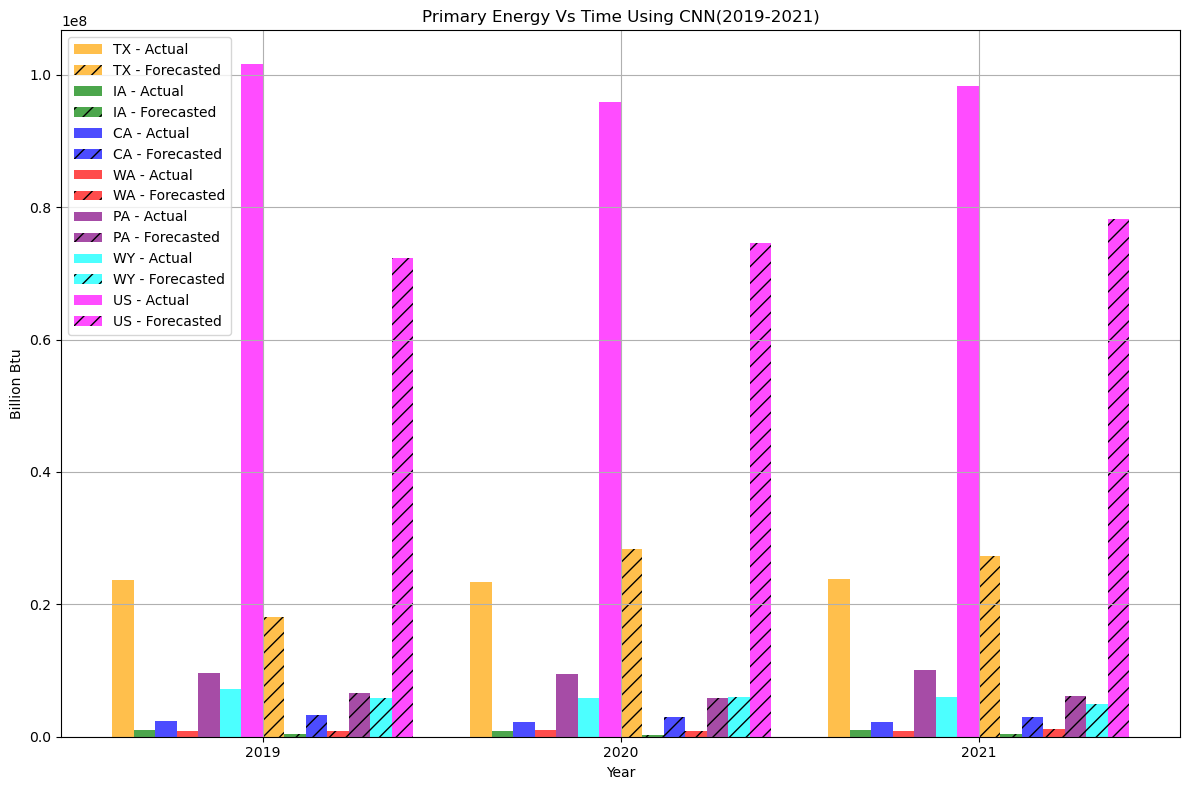

In [28]:
# state abbreviations to plot
state_abbreviations =  ['TX','IA','CA','WA','PA','WY','US']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = primary_USA_T.iloc[-3:]
years_forecast = selected_years

# width of the bars
bar_width = 0.06

# colors for each state
state_colors = {'CA': 'blue', 'IA': 'green', 'TX': 'orange', 'WA': 'red', 'PA': 'purple', 'WY': 'cyan', 'US': 'magenta'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_cnn[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Primary Energy Vs Time Using CNN(2019-2021)')

# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

### ARIMA

In [6]:
# Function to perform ARIMA forecast
def arima_forecast(state_data, state_name, order=(5, 1, 0), forecast_steps=2):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(state_data.reshape(-1, 1))
    
    train_size = int(len(scaled_data) * 0.8)
    train, test = scaled_data[:train_size], scaled_data[train_size:]
    
    model = ARIMA(train, order=order)
    fit_model = model.fit()
    
    forecast_values_arima = fit_model.forecast(steps=len(scaled_data) - train_size + forecast_steps)
    forecast_values_arima = scaler.inverse_transform(forecast_values_arima.reshape(-1, 1))
    
    mse_arima = mean_squared_error(state_data[train_size:], forecast_values_arima[:len(state_data) - train_size])
    rmse_arima = np.sqrt(mse_arima)
    
    forecast_years_arima = forecast_values_arima[:len(state_data)]
    
    return mse_arima, rmse_arima, forecast_years_arima

# Selected states
selected_states = ['TX','IA','CA','WA','PA','WY','US']

# Dictionaries to store results
mse_arima_dict = {}
rmse_arima_dict = {}
forecast_years_arima_dict = {}
accuracy_arima_dict = {}

# Loop through each selected state for ARIMA
for state in selected_states:
    state_data = primary_USA.loc[state].values
    mse_arima, rmse_arima, forecast_years_arima = arima_forecast(state_data, state, order=(5, 1, 0), forecast_steps=2)
    
    mse_arima_dict[state] = mse_arima
    rmse_arima_dict[state] = rmse_arima
    forecast_years_arima_dict[state] = forecast_years_arima
    
    # Calculate accuracy for each year
    actual_data = state_data[-3:]
    forecasted_data = forecast_years_arima[:3]
    
    accuracies = 100 - np.abs((forecasted_data - actual_data) / actual_data) * 100
    
    accuracy_arima_dict[state] = {
        '2019': accuracies[0][0],
        '2020': accuracies[1][0],
        '2021': accuracies[2][0]
    }
    
    # Print the values for each year
    print(f"\n{state} - Actual Values:")
    print(f"2019: {actual_data[0]:.2f}, 2020: {actual_data[1]:.2f}, 2021: {actual_data[2]:.2f}")

    print(f"{state} - Forecasted Values:")
    print(f"2019: {forecasted_data[0][0]:.2f}, 2020: {forecasted_data[1][0]:.2f}, 2021: {forecasted_data[2][0]:.2f}")

    # Print forecast values for 2022 and 2023
    print(f"{state} - Forecasted Values for 2022 and 2023:")
    for year, forecast_value in zip(range(2022, 2024), forecast_years_arima[3:]):
        print(f"{year}: {forecast_value[0]:.2f}")

    # Print the accuracy for each year
    print(f"Accuracy for {state} (ARIMA) - 2019: {accuracy_arima_dict[state]['2019']:.2f}%")
    print(f"Accuracy for {state} (ARIMA) - 2020: {accuracy_arima_dict[state]['2020']:.2f}%")
    print(f"Accuracy for {state} (ARIMA) - 2021: {accuracy_arima_dict[state]['2021']:.2f}")
    print(f"Mean Squared Error (MSE) for {state} (ARIMA): {mse_arima:.2f}")
    print(f"Root Mean Squared Error (RMSE) for {state} (ARIMA): {rmse_arima:.2f}\n")
# Print the forecasted values for 2022 and 2023 for all states
print("\nForecasted Values for 2022 and 2023 (ARIMA):")
for year in range(2022, 2024):
    print(f"Forecasts for {year}:")
    for state in selected_states:
        forecast_value = forecast_years_arima_dict[state][year - 2019][0]
        print(f"{state}: {forecast_value:.2f}")

# Print MSE for all states
print("\nMean Squared Error (MSE) for All states:")
for state, mse_value in mse_arima_dict.items():
    print(f"MSE for {state} (ARIMA): {mse_value:.2f}")

# Print RMSE for all states
print("\nRoot Mean Squared Error (RMSE) for All states:")
for state, rmse_value in rmse_arima_dict.items():
    print(f"RMSE for {state} (ARIMA): {rmse_value:.2f}")



TX - Actual Values:
2019: 23648565.00, 2020: 23308893.00, 2021: 23843751.00
TX - Forecasted Values:
2019: 11937649.26, 2020: 12551649.15, 2021: 13071914.70
TX - Forecasted Values for 2022 and 2023:
2022: 13459626.74
2023: 13719624.68
Accuracy for TX (ARIMA) - 2019: 50.48%
Accuracy for TX (ARIMA) - 2020: 53.08%
Accuracy for TX (ARIMA) - 2021: 55.28
Mean Squared Error (MSE) for TX (ARIMA): 27968110730888.64
Root Mean Squared Error (RMSE) for TX (ARIMA): 5288488.51


IA - Actual Values:
2019: 956469.00, 2020: 930141.00, 2021: 958793.00
IA - Forecasted Values:
2019: 532693.02, 2020: 596806.91, 2021: 656446.90
IA - Forecasted Values for 2022 and 2023:
2022: 715909.88
2023: 771688.70
Accuracy for IA (ARIMA) - 2019: 55.69%
Accuracy for IA (ARIMA) - 2020: 62.40%
Accuracy for IA (ARIMA) - 2021: 68.63
Mean Squared Error (MSE) for IA (ARIMA): 9249688452.85
Root Mean Squared Error (RMSE) for IA (ARIMA): 96175.30


CA - Actual Values:
2019: 2434522.00, 2020: 2198992.00, 2021: 2152487.00
CA - Forec

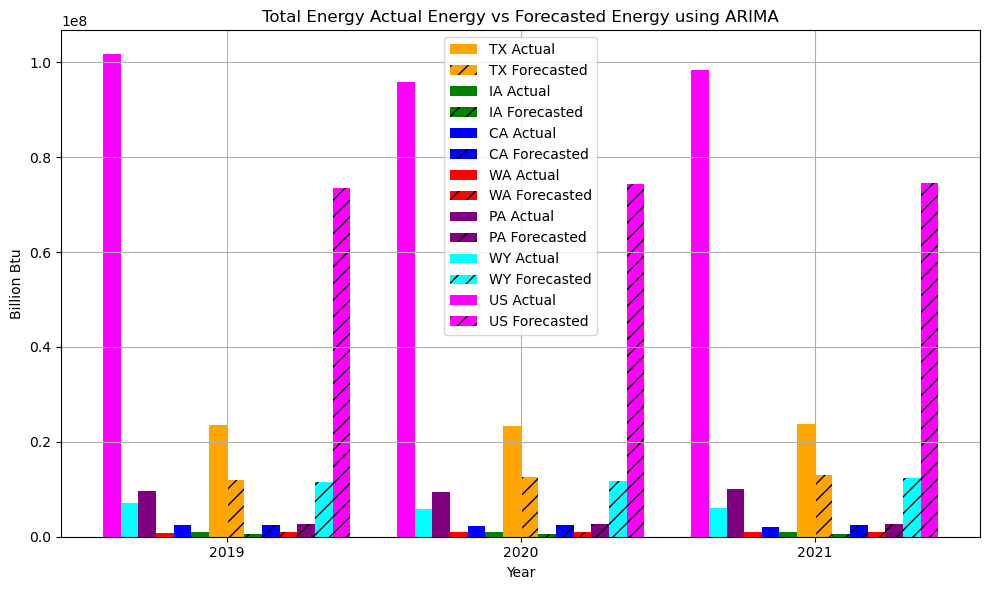

In [10]:
# colors for each state
state_colors = {'CA': 'blue', 'IA': 'green', 'TX': 'orange', 'WA': 'red', 'PA': 'purple', 'WY': 'cyan', 'US': 'magenta'}

# Create a new figure
plt.figure(figsize=(10, 6))

# width of the bars and the space between bar groups
bar_width = 0.06
space = np.arange(len(range(2019, 2022)))

# Loop through each selected state
for i, state in enumerate(selected_states):
    # Extract actual and forecasted data
    actual_data = primary_USA.loc[state].values[-3:]
    forecasted_data = np.array(forecast_years_arima_dict[state][:3]).flatten() 

    # Generate x values (years)
    years = range(2019, 2022)

    # Plot actual data with custom color on the left side
    plt.bar(space - bar_width/2 - i*bar_width, actual_data, bar_width, label=f'{state} Actual', color=state_colors[state])

    # Plot forecasted data with hatch pattern and custom color on the right side
    plt.bar(space + bar_width/2 + i*bar_width, forecasted_data, bar_width, label=f'{state} Forecasted', color=state_colors[state], hatch='//')

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Total Energy Actual Energy vs Forecasted Energy using ARIMA')

# Add xticks
plt.xticks(space, years)

# Add a legend
plt.legend()

# Add grid
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Create the initial DataFrame
df_combined_results = pd.DataFrame({
    'State': list(mse_arima_dict.keys()),
    'MSE_lstm': list(state_mse_lstm.values()),
    'RMSE_lstm': list(state_rmse_lstm.values()),
    'Forecast_2022_lstm': [state_forecasts_lstm[state]['2022'] for state in state_forecasts_lstm],
    'Forecast_2023_lstm': [state_forecasts_lstm[state]['2023'] for state in state_forecasts_lstm],
    'MSE_cnn': list(state_mse_cnn.values()),
    'RMSE_cnn': list(state_rmse_cnn.values()),
    'Forecast_2022_cnn': [state_forecasts_cnn[state]['2022'] for state in state_forecasts_cnn],
    'Forecast_2023_cnn': [state_forecasts_cnn[state]['2023'] for state in state_forecasts_cnn],
    'MSE_gru': list(state_mse_gru.values()),
    'RMSE_gru': list(state_rmse_gru.values()),
    'Forecast_2022_gru': [state_forecasts_gru[state]['2022'] for state in state_forecasts_gru],
    'Forecast_2023_gru': [state_forecasts_gru[state]['2023'] for state in state_forecasts_gru],
    'MSE_arima': [mse_arima_dict[state] for state in selected_states],
    'RMSE_arima': [rmse_arima_dict[state] for state in selected_states],
    'Forecast_2022_arima': [forecast_years_arima_dict[state][2][0] for state in selected_states],
    'Forecast_2023_arima': [forecast_years_arima_dict[state][3][0] for state in selected_states],
})
# Save the combined DataFrame to a CSV file
df_combined_results.to_csv('combined_results_primary.csv', index=False)